<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/ML_AI24_HT7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 7: Fraud Detection Competition**

Добро пожаловать на финальное домашнее задание курса! Домашнее задание направлено на систематизацию всех знаний, полученных в процессе учебы.

В нём Вы потренируетесь применять навыки построения пайплайнов машинного обучения, приобретенные в курсе от точки разведочного анализа данных до построения и валидации моделей машинного обучения.

## **Задача**
**Вы будете решать задачу определения фрода:**

https://www.kaggle.com/competitions/fraud-detection-24

**Вам нужно будет:**
- в jupyter notebook провести исследование данных;
- в нём же построить модели и оценить их качество;
- отправить посылку на Kaggle.

Более подробное описание шагов - в ноутбуке ниже.

## **Оценивание и баллы**
- В EDA и во всей работе будут оцениваться полнота и **выводы**;
- При обучении моделей старайтесь обоснованно подходить к их выбору, избегая простого перебора;

**Максимальный балл** - 10 (+ бонусы за Kaggle, см. ниже).


Мягкий дедлайн (окончание соревнования на Kaggle): **15 марта 23:59**


# **Базовое решение и пример формирования файла под submission**


In [ ]:
!wget --no-check-certificate 'https://www.dropbox.com/s/5iuef7c9ljj84t6/train_transaction.csv?dl=0' -O train_transaction.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/cmy01z5fw7ohlmd/train_identity.csv?dl=0' -O train_identity.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/7thqkuxnwsa7njj/test_transaction.csv?dl=0' -O test_transaction.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/b40nvbb9e2usd5w/test_identity.csv?dl=0' -O test_identity.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/arkyoz0bel8z4d2/sample_submission.csv?dl=0' -O sample_submission.csv

In [ ]:
!pip install catboost -q

In [ ]:
from catboost import CatBoostClassifier
import pandas as pd
import os
from tqdm import tqdm

INPUT_DIR = '.'

train_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'train_transaction.csv'))
train_identity = pd.read_csv(os.path.join(INPUT_DIR, 'train_identity.csv'))
test_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'test_transaction.csv'))
test_identity = pd.read_csv(os.path.join(INPUT_DIR, 'test_identity.csv'))
sample_submission = pd.read_csv(os.path.join(INPUT_DIR, 'sample_submission.csv'))

df_train = train_transaction.merge(train_identity, how='left', on='TransactionID')

df_test = test_transaction.merge(test_identity, how='left', on='TransactionID')

In [ ]:
df_train.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
df_test.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
df_train.shape, df_test.shape

((417559, 432), (172981, 431))

In [ ]:
object_cols = []
for idx, col in tqdm(enumerate(df_train.columns.drop('isFraud'))):
    if df_train[col].dtype == 'O':
      object_cols.append(idx)

431it [00:00, 29656.56it/s]


In [ ]:
X_train = df_train.drop('isFraud', axis=1)
X_train = X_train.fillna('')
y_train = df_train['isFraud'].values

cb = CatBoostClassifier(iterations=3)
cb.fit(X_train, y_train, object_cols, )

Learning rate set to 0.5
0:	learn: 0.2082395	total: 1.44s	remaining: 2.87s
1:	learn: 0.1360790	total: 2.54s	remaining: 1.27s
2:	learn: 0.1180984	total: 4.17s	remaining: 0us


In [ ]:
predictions = cb.predict_proba(df_test.fillna(''))

In [ ]:
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions[:, 1]})
sub.head()

TransactionID   isFraud
0        3404559  0.978714
1        3404560  0.935724
2        3404561  0.946864
3        3404562  0.978714
4        3404563  0.970637

In [ ]:
# Сохранение submission
sub.to_csv('submission_baseline.csv', index=False)

### **Примечания:**

**1. Оценка качества и Submission File**
- Ответом является число от 0 до 1, метрикой качества - AUC-ROC.
- Структура Submission File:
 - для каждого значения *TransactionID* в тестовых данных вы должны предсказать **вероятность** для столбца *isFraud*.
 - в файле у вас должно быть две колонки: `TransactionID` и`isFraud`  **для каждой транзакции в датасете**.

**2. Объем данных**

Поскольку набор данных объемный, могут быть проблемы с переполнением памяти в Collab. Для решения проблемы можете использовать функцию из [этого ноутбука](https://colab.research.google.com/drive/18u75eyFGEoyeWJ_MbsLkcPa6gv2tNI8G#scrollTo=V2L1Nl5CTMMl), разобравшись, что она делает с данными.

# **Библиотеки и данные**

In [1]:
from catboost import CatBoostClassifier
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

from hw_7_functions import reduce_mem_usage, resumetable, CalcOutliers, plot_cf, plot_cfmv, plot_card_1235, fill_mc_values, fill_mn_values

filterwarnings('ignore')

In [2]:
train_transaction = pd.read_csv('train_transaction.csv')
train_identity = pd.read_csv('train_identity.csv')
test_transaction = pd.read_csv('test_transaction.csv')
test_identity = pd.read_csv('test_identity.csv')
sample_submission = pd.read_csv('sample_submission.csv')

df_train = train_transaction.merge(train_identity, how='left', on='TransactionID')

df_test = test_transaction.merge(test_identity, how='left', on='TransactionID')

In [4]:
print(df_train.shape)
print(df_test.shape)

(417559, 434)
(172981, 433)


In [7]:
resumetable(df_train)[:55]

Dataset Shape: (417559, 434)


Name   dtypes  Missing  Uniques First Value Second Value  \
0    TransactionID    int64        0   417559     2987000      2987001   
1          isFraud    int64        0        2           0            0   
2    TransactionDT    int64        0   404377       86400        86401   
3   TransactionAmt  float64        0    16024        68.5         29.0   
4        ProductCD   object        0        5           W            W   
5            card1    int64        0    12275       13926         2755   
6            card2  float64     6563      500         NaN        404.0   
7            card3  float64      821      105       150.0        150.0   
8            card4   object      829        4    discover   mastercard   
9            card5  float64     2981      110       142.0        102.0   
10           card6   object      826        4      credit       credit   
11           addr1  float64    47973      318       315.0        325.0   
12           addr2  float64    47973       67        87.0         87.0   
13           dist1  float64   258091     2561        19.0          NaN   
14           dist2  float64   388273     1605         NaN          NaN   
15   P_emaildomain   object    64910       59         NaN    gmail.com   
16   R_emaildomain   object   313739       60         NaN          NaN   
17              C1  float64        0     1554         1.0          1.0   
18              C2  float64        0     1041         1.0          1.0   
19              C3  float64        0       23         0.0          0.0   
20              C4  float64        0     1206         0.0          0.0   
21              C5  float64        0      306         0.0          0.0   
22              C6  float64        0     1283         1.0          1.0   
23              C7  float64        0     1098         0.0          0.0   
24              C8  float64        0     1211         0.0          0.0   
25              C9  float64        0      203         1.0          0.0   
26             C10  float64        0     1128         0.0          0.0   
27             C11  float64        0     1402         2.0          1.0   
28             C12  float64        0     1183         0.0          0.0   
29             C13  float64        0     1582         1.0          1.0   
30             C14  float64        0     1081         1.0          1.0   
31              D1  float64      274      640        14.0          0.0   
32              D2  float64   208189      640         NaN          NaN   
33              D3  float64   196454      596        13.0          NaN   
34              D4  float64   123056      738         NaN          0.0   
35              D5  float64   225835      624         NaN          NaN   
36              D6  float64   364499      761         NaN          NaN   
37              D7  float64   390613      551         NaN          NaN   
38              D8  float64   361005    10918         NaN          NaN   
39              D9  float64   361005       24         NaN          NaN   
40             D10  float64    61488      754        13.0          0.0   
41             D11  float64   226801      613        13.0          NaN   
42             D12  float64   369802      584         NaN          NaN   
43             D13  float64   373093      512         NaN          NaN   
44             D14  float64   372219      741         NaN          NaN   
45             D15  float64    68636      790         0.0          0.0   
46              M1   object   223443        2           T          NaN   
47              M2   object   223443        2           T          NaN   
48              M3   object   223443        2           T          NaN   
49              M4   object   201913        3          M2           M0   
50              M5   object   251995        2           F            T   
51              M6   object   129558        2           T            T   
52              M7   object   278068        2         NaN          NaN   
53              M8

In [ ]:
df_train.sort_values(by=['Entropy'], ascending = False)

In [35]:
resumetable(df_train)[55:394].sort_values(by=['Entropy'], ascending = False).iloc[:50]

Dataset Shape: (417559, 434)


Name   dtypes  Missing  Uniques First Value Second Value Third Value  \
361  V307  float64       12    28055       117.0          0.0         0.0   
364  V310  float64       12    15176         0.0          0.0         0.0   
181  V127  float64        0    18277       117.0          0.0         0.0   
184  V130  float64        0     9973         0.0          0.0         0.0   
318  V264  float64   316056     9434         NaN          NaN         NaN   
257  V203  float64   310261     9723         NaN          NaN         NaN   
362  V308  float64       12    16595         0.0          0.0         0.0   
319  V265  float64   316056     8194         NaN          NaN         NaN   
214  V160  float64   352063     8852         NaN          NaN         NaN   
258  V204  float64   310261     8300         NaN          NaN         NaN   
317  V263  float64   316056     7221         NaN          NaN         NaN   
256  V202  float64   310261     6948         NaN          NaN         NaN   
182  V128  float64        0    10337         0.0          0.0         0.0   
219  V165  float64   352063     1161         NaN          NaN         NaN   
213  V159  float64   352063     6361         NaN          NaN         NaN   
220  V166  float64   352063      882         NaN          NaN         NaN   
368  V314  float64      274     8937         0.0          0.0         0.0   
366  V312  float64       12     6316         0.0          0.0         0.0   
218  V164  float64   352063      703         NaN          NaN         NaN   
204  V150  float64   352063     1985         NaN          NaN         NaN   
199  V145  float64   352063      255         NaN          NaN         NaN   
360  V306  float64       12    11347         0.0          0.0         0.0   
369  V315  float64      274     5392         0.0          0.0         0.0   
386  V332  float64   351771      878         NaN          NaN         NaN   
328  V274  float64   316056     5671         NaN          NaN         NaN   
367  V313  float64      274     4224         0.0          0.0         0.0   
266  V212  float64   310261     5400         NaN          NaN         NaN   
329  V275  float64   316056     5263         NaN          NaN         NaN   
150   V96  float64        0      127         1.0          0.0         0.0   
198  V144  float64   352063       63         NaN          NaN         NaN   
339  V285  float64       12       96         0.0          0.0         0.0   
276  V222  float64   308686       72         NaN          NaN         NaN   
387  V333  float64   351771      572         NaN          NaN         NaN   
267  V213  float64   310261     5020         NaN          NaN         NaN   
321  V267  float64   316056     2712         NaN          NaN         NaN   
185  V131  float64        0     3678         0.0          0.0         0.0   
197  V143  float64   352063       55         NaN          NaN         NaN   
327  V273  float64   316056     4859         NaN          NaN         NaN   
371  V317  float64       12    10777       117.0          0.0         0.0   
275  V221  float64   308686       72         NaN          NaN         NaN   
337  V283  float64      274       52         1.0          1.0         1.0   
194  V140  float64   352063       34         NaN          NaN         NaN   
265  V211  float64   310261     4534         NaN          NaN         NaN   
180  V126  float64        0     6930         0.0          0.0         0.0   
193  V139  float64   352063       34         NaN          NaN         NaN   
272  V218  float64   316056      100         NaN          NaN         NaN   
225  V171  float64   310250       49         NaN          NaN         NaN   
153   V99  float64        0       89         0.0          0.0         0.0   
385  V331  float64   351771      359         NaN          NaN         NaN   
263  V209  float64   310250     2447         NaN          NaN         NaN   

     Entropy  
361     6.08  
364     5.04  
181     4.79  
184     3.85  
31

In [ ]:
resumetable(df_train)[:-40]

# **Задание 1 (2 балла)**

Проведите EDA (разведочный анализ данных):
* проанализируйте признаки, их особенности и связь с целевой переменной
* проанализируйте целевую переменную
* оцените степень попарной взаимосвязи признаков, а также связи признаков и целевой переменной
* по результатам исследований сделайте необходимую обработку данных (удаление дублей, работа с пропусками, с категориальными столбцами (если они есть), работа с аномалиями, другие преобразования признаков)

Важно, что EDA всегда сопровождается выводами - не забудьте об этом.

**`transaction`**

- `TransactionAMT`: сумма транзакции в USD
- `ProductCD`: код продукта, по которому совершена транзакция
- `card1`-`card6`: информация о платежной карте, такая как тип карты, категория карты, банк выпуска, страна и т.д.
- `addr1`, `addr2`: адрес
- `dist1`, `dist2`: расстояние
- `P_emaildomain`, `R_emaildomain`: email-домены покупателя и получателя
- `C1`-`C14`: количественные признаки - например, сколько адресов привязано к платежной карте, и т.п.
- `D1`-`D15`: временные признаки, отвечающие за то, сколько времени прошло с какого-то момента до транзакции - например, сколько дней прошло с - предыдущей транзакции, и т.п.
- `M1`-`M9`: индикаторы неких совпадений. Например, совпадают ли код телефона и почтовый индекс для составления счета; совпадают ли имя на карте и имя, привязанное к адресу, и т.д.
- `V1`-`V339`: сгенерированные вручную признаки на основе ранжирования, подсчета и других методов.

**`identity`**
- `id_01`-`id_38`: анонимизированные признаки
- `DeviceType`: тип устройства
- `DeviceInfo`: информация об устройстве

## Анализ целевой переменной

### Target (isFraud)

Для начала рассмотрим целевую переменную `isFraud`

In [14]:
df_train['isFraud'].value_counts(normalize=True).to_frame()

proportion
isFraud            
0          0.964745
1          0.035255

In [17]:
((df_train.groupby('isFraud')['TransactionAmt'].sum())/sum(df_train['TransactionAmt'].values)).to_frame()

TransactionAmt
isFraud                
0              0.961652
1              0.038348

Как можно заметить, примерно 3.5% транзакций являются мошенническими. При этом, если суммировать транзакции, то примерно 3.8% суммы всех транзаций являются мошеннической.

## Анализ признаков

Теперь можно перейти к анализу признаков в наборе данных, их связи с целевой переменной и их связи друг с другом

### TransactionAmt

In [23]:
df_train[['TransactionAmt']].describe([0.01, 0.025, 0.1, 0.25, 0.5, 0.75, 0.9, 0.975, 0.99])

TransactionAmt
count   417559.000000
mean       134.666566
std        238.166118
min          0.251000
1%           9.667000
2.5%        14.828000
10%         25.950000
25%         42.950000
50%         68.950000
75%        125.000000
90%        280.000000
97.5%      644.950000
99%       1104.000000
max      31937.391000

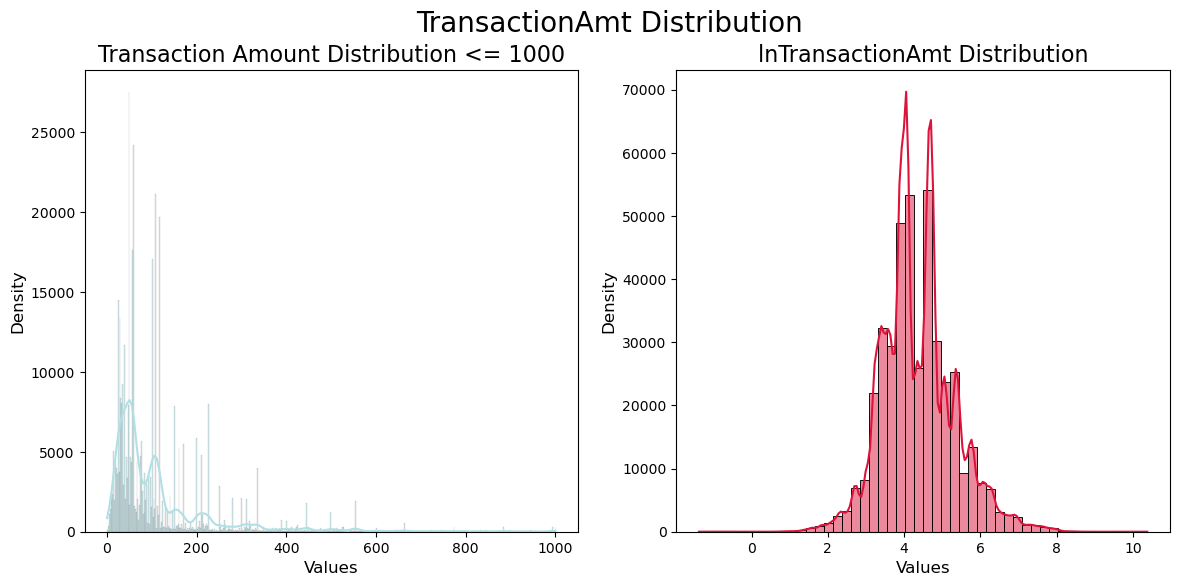

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('TransactionAmt Distribution', fontsize=20)

sns.histplot(df_train[df_train['TransactionAmt'] <= 1000]['TransactionAmt'], kde=True, ax=axes[0], color = 'powderblue')
axes[0].set_title('Transaction Amount Distribution <= 1000', fontsize=16)
axes[0].set_xlabel('Values', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)

sns.histplot(np.log(df_train['TransactionAmt']), kde=True, ax=axes[1], color = 'crimson', bins = 50)
axes[1].set_title('lnTransactionAmt Distribution', fontsize=16)
axes[1].set_xlabel('Values', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)

plt.show()

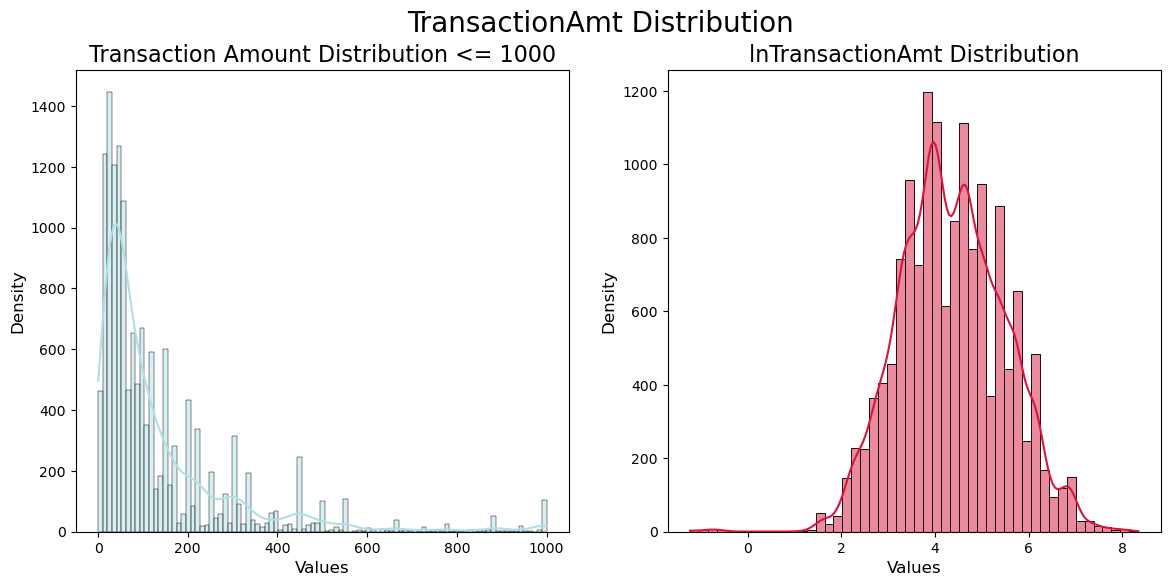

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('TransactionAmt Distribution', fontsize=20)

sns.histplot(df_train[df_train.isFraud == 1][df_train['TransactionAmt'] <= 1000]['TransactionAmt'], kde=True, ax=axes[0], color = 'powderblue')
axes[0].set_title('Transaction Amount Distribution <= 1000', fontsize=16)
axes[0].set_xlabel('Values', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)

sns.histplot(np.log(df_train[df_train.isFraud == 1]['TransactionAmt']), kde=True, ax=axes[1], color = 'crimson', bins = 50)
axes[1].set_title('lnTransactionAmt Distribution', fontsize=16)
axes[1].set_xlabel('Values', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)

plt.show()

In [29]:
df_train.groupby('isFraud')['TransactionAmt'].apply(lambda x: x.quantile([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])).unstack().T

isFraud         0         1
0.01        9.911    7.4202
0.10       25.950   19.3340
0.25       43.950   35.0000
0.50       68.950   76.0230
0.75      125.000  171.0000
0.90      270.000  335.0000
0.99     1104.000  994.0000

In [31]:
CalcOutliers(df_train['TransactionAmt'])

Идентифицировано нижних выбросов: 0
Идентифицировано верхних выбросов: 47737
Общее количество выбросов: 47737
Количество наблюдений без выбросов: 369822
Процент выбросов: 11.4324%


In [33]:
df_train['lnTransactionAmt'] = df_train['TransactionAmt'].apply(np.log)

In [35]:
CalcOutliers(df_train['lnTransactionAmt'])

Идентифицировано нижних выбросов: 3372
Идентифицировано верхних выбросов: 10821
Общее количество выбросов: 14193
Количество наблюдений без выбросов: 403366
Процент выбросов: 3.399%


Как можно заметить по графикам и таблицам, в данных преимущественно присутствуют наблюдения с небольшими суммами транзацкций. Причем распределения между обычными и фрод транзакциями не сильно разнятся. Также в данных присутствуют наблюдения с довольно высокими суммами транзакций, которые можно считать выбросами. Данные выбросы не стоит удалять, так как суммы довольно-таки реалистичные. Можно использовать логарифм суммы, чтобы сократить их количество и не потерять данные.

## ProductCD

In [38]:
resumetable(df_train[['ProductCD']])

Dataset Shape: (417559, 1)


Name  dtypes  Missing  ...  Second Value Third Value Entropy
0  ProductCD  object        0  ...             W           W    1.35

[1 rows x 8 columns]

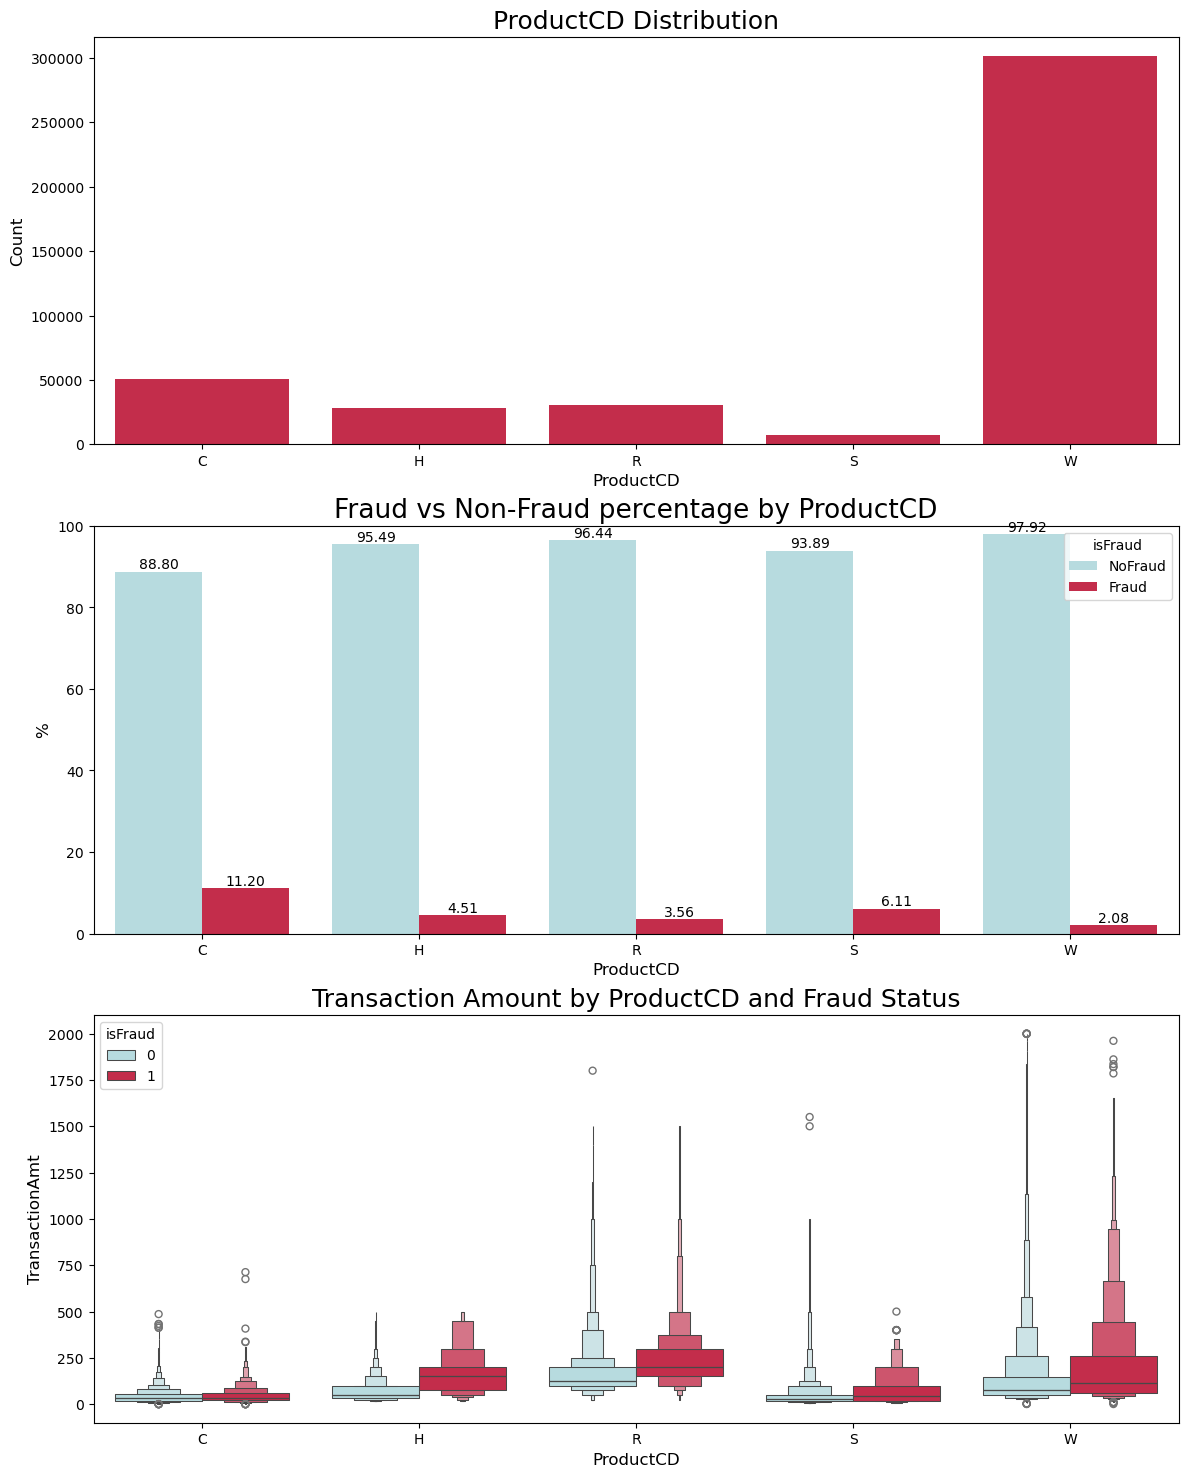

In [40]:
plot_cf(df_train, 'ProductCD')

Рассматривая тип продукта, видно, что наиболее частым продуктом в наборе данных являются продкуты *W*, *С* и *R*.  Причем, из эти трех продуктов наиболее сильно выделяется продукт *С*, у которого в общей доле наибольший процент фрод тразакций.

## Card1 - Card6

In [42]:
resumetable(df_train[['card1', 'card2', 'card3','card4', 'card5', 'card6']])

Dataset Shape: (417559, 6)


Name   dtypes  Missing  ...  Second Value Third Value Entropy
0  card1    int64        0  ...          2755        4663    9.97
1  card2  float64     6563  ...         404.0       490.0    6.32
2  card3  float64      821  ...         150.0       150.0    0.70
3  card4   object      829  ...    mastercard        visa    1.10
4  card5  float64     2981  ...         102.0       166.0    2.68
5  card6   object      826  ...        credit       debit    0.83

[6 rows x 8 columns]

In [44]:
df_train[['card1', 'card2', 'card3', 'card5']].quantile([0.01, .025, .1, .25, .5, .75, .975, .99, .999])

card1  card2  card3  card5
0.010   1333.0  100.0  143.0  102.0
0.025   1675.0  111.0  150.0  102.0
0.100   2803.0  111.0  150.0  126.0
0.250   6019.0  215.0  150.0  166.0
0.500   9633.0  361.0  150.0  226.0
0.750  14128.0  512.0  150.0  226.0
0.975  18018.0  583.0  185.0  226.0
0.990  18238.0  583.0  185.0  226.0
0.999  18370.0  598.0  213.0  236.0

In [46]:
df_train.loc[df_train.card3.isin(df_train.card3.value_counts()[df_train.card3.value_counts() < 200].index), 'card3'] = "Others"
df_train.loc[df_train.card5.isin(df_train.card5.value_counts()[df_train.card5.value_counts() < 300].index), 'card5'] = "Others"

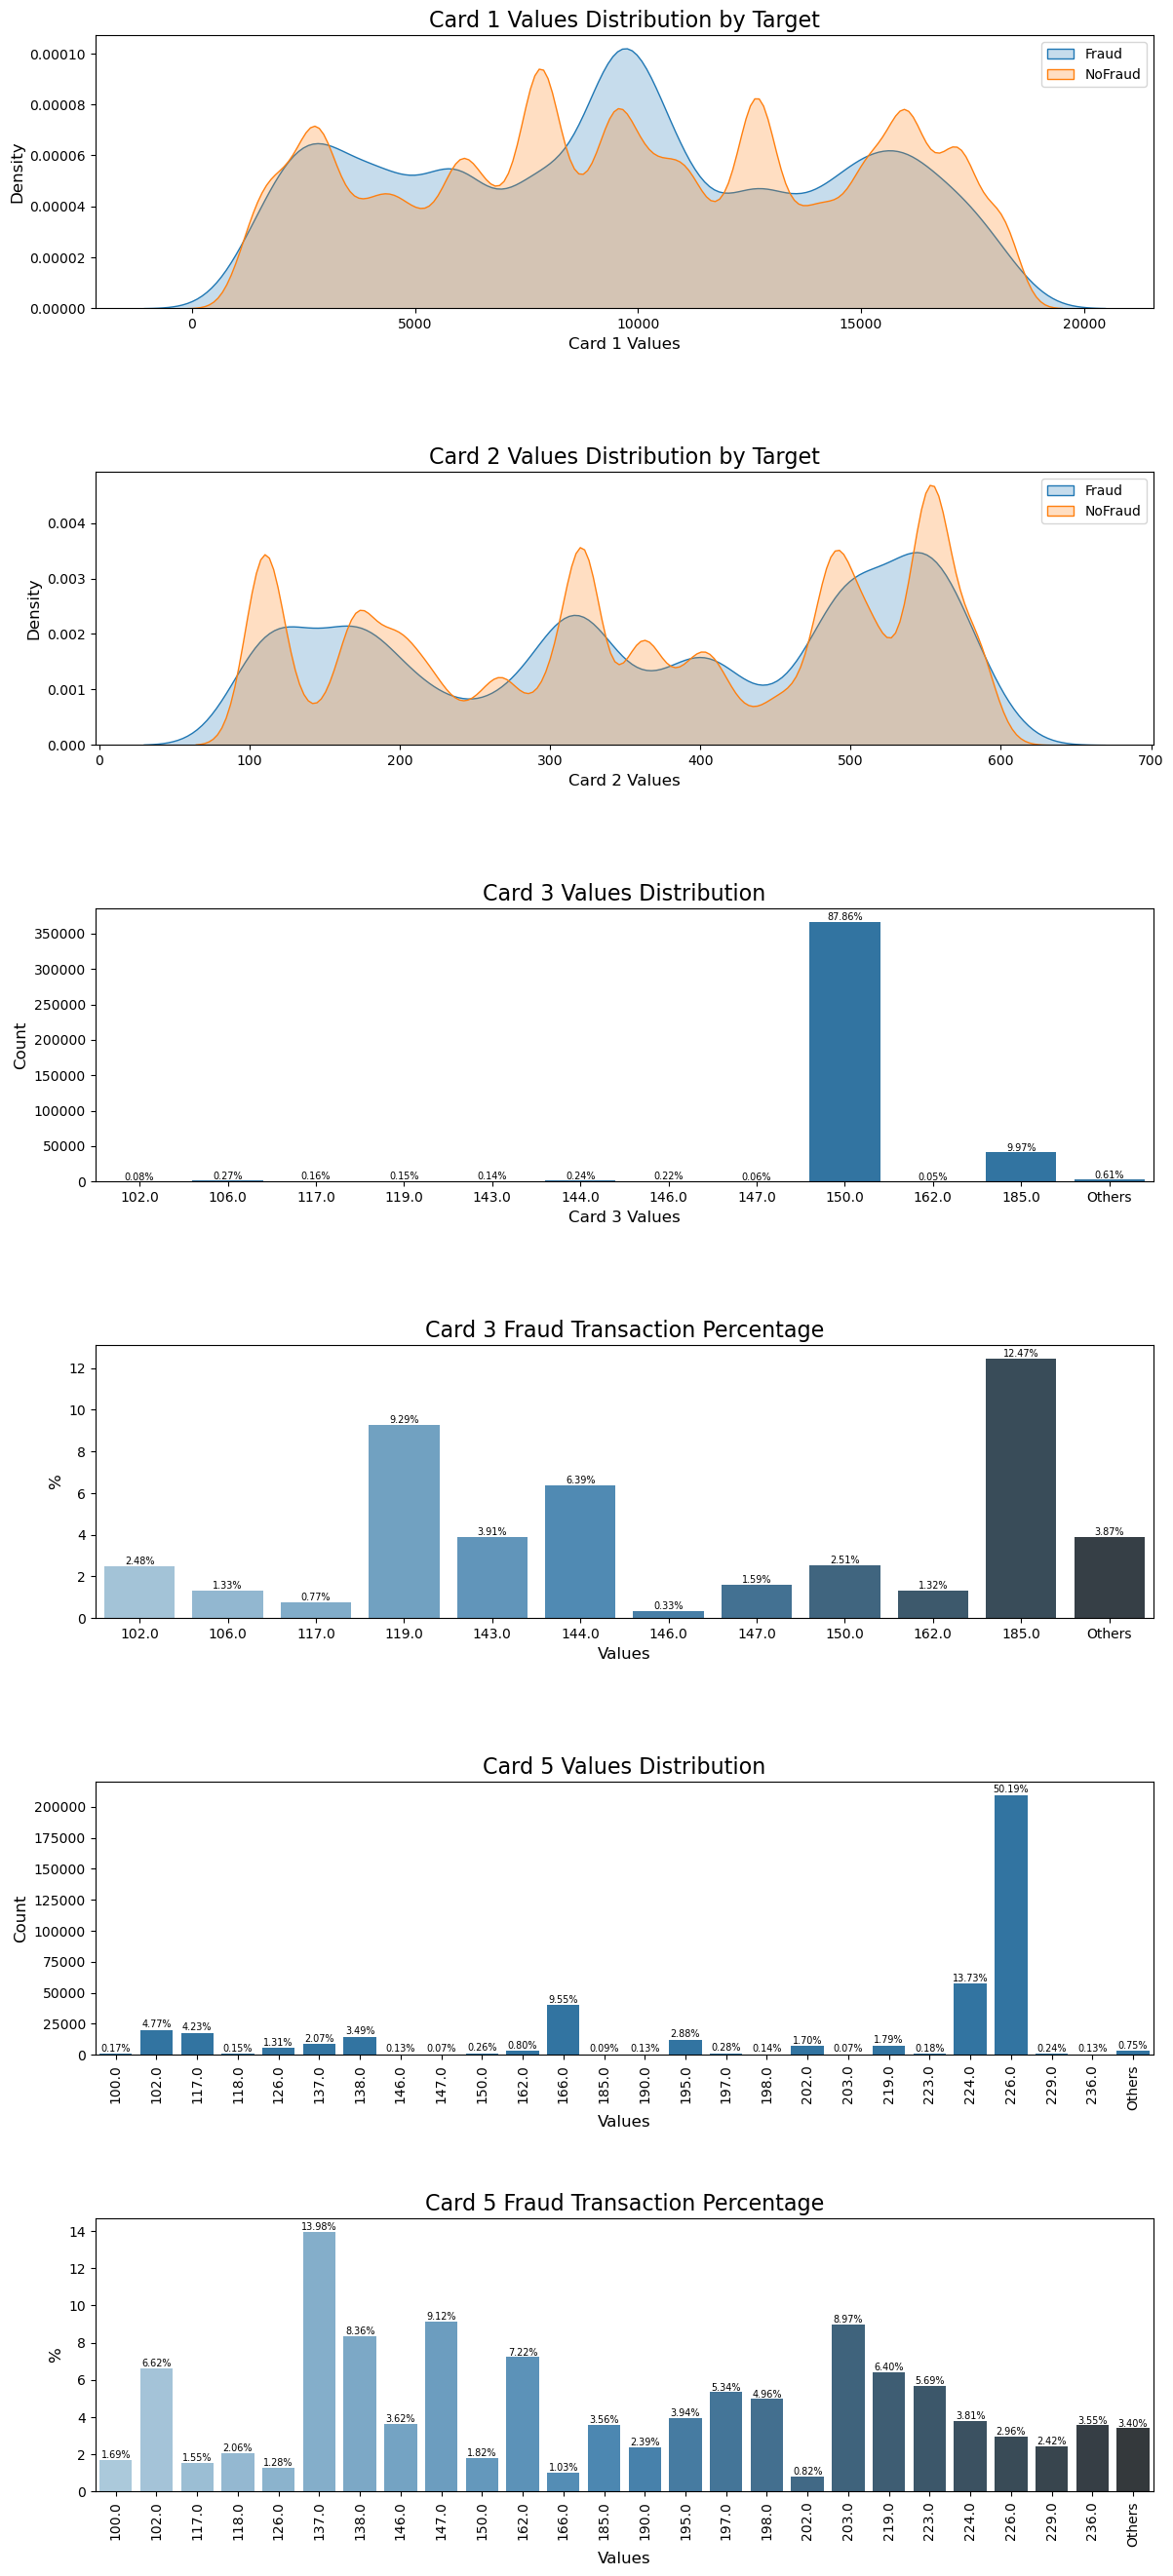

In [48]:
plot_card_1235(df_train)

- В переменной `card3` наиболее частыми значениями являются значения *150* и *185*. Эти значения наблюдаются примерно у 97% всех наблюдений в наборе данных. Причем для значения *150* доля фрод транзакций составляет 2.51%, а для значения *185* доля составляет 12.5%, что является довольно высоким показателем.
- В переменной `card5` наиболее частыми значениями являются значения *226*, *224*, *166* и *102*. Наибольшую долю фрод транзакций из этих значений имеет *102* с долей в 6.62%. Однако наибольшую  долю фрод транзакций из всех значений имеет значение *137* с долей в 13.98%. Причем доля этих значений в наборе данных не самая маленькая. Она составляет 2%.

In [54]:
fill_mc_values(df_train, ['card4'])

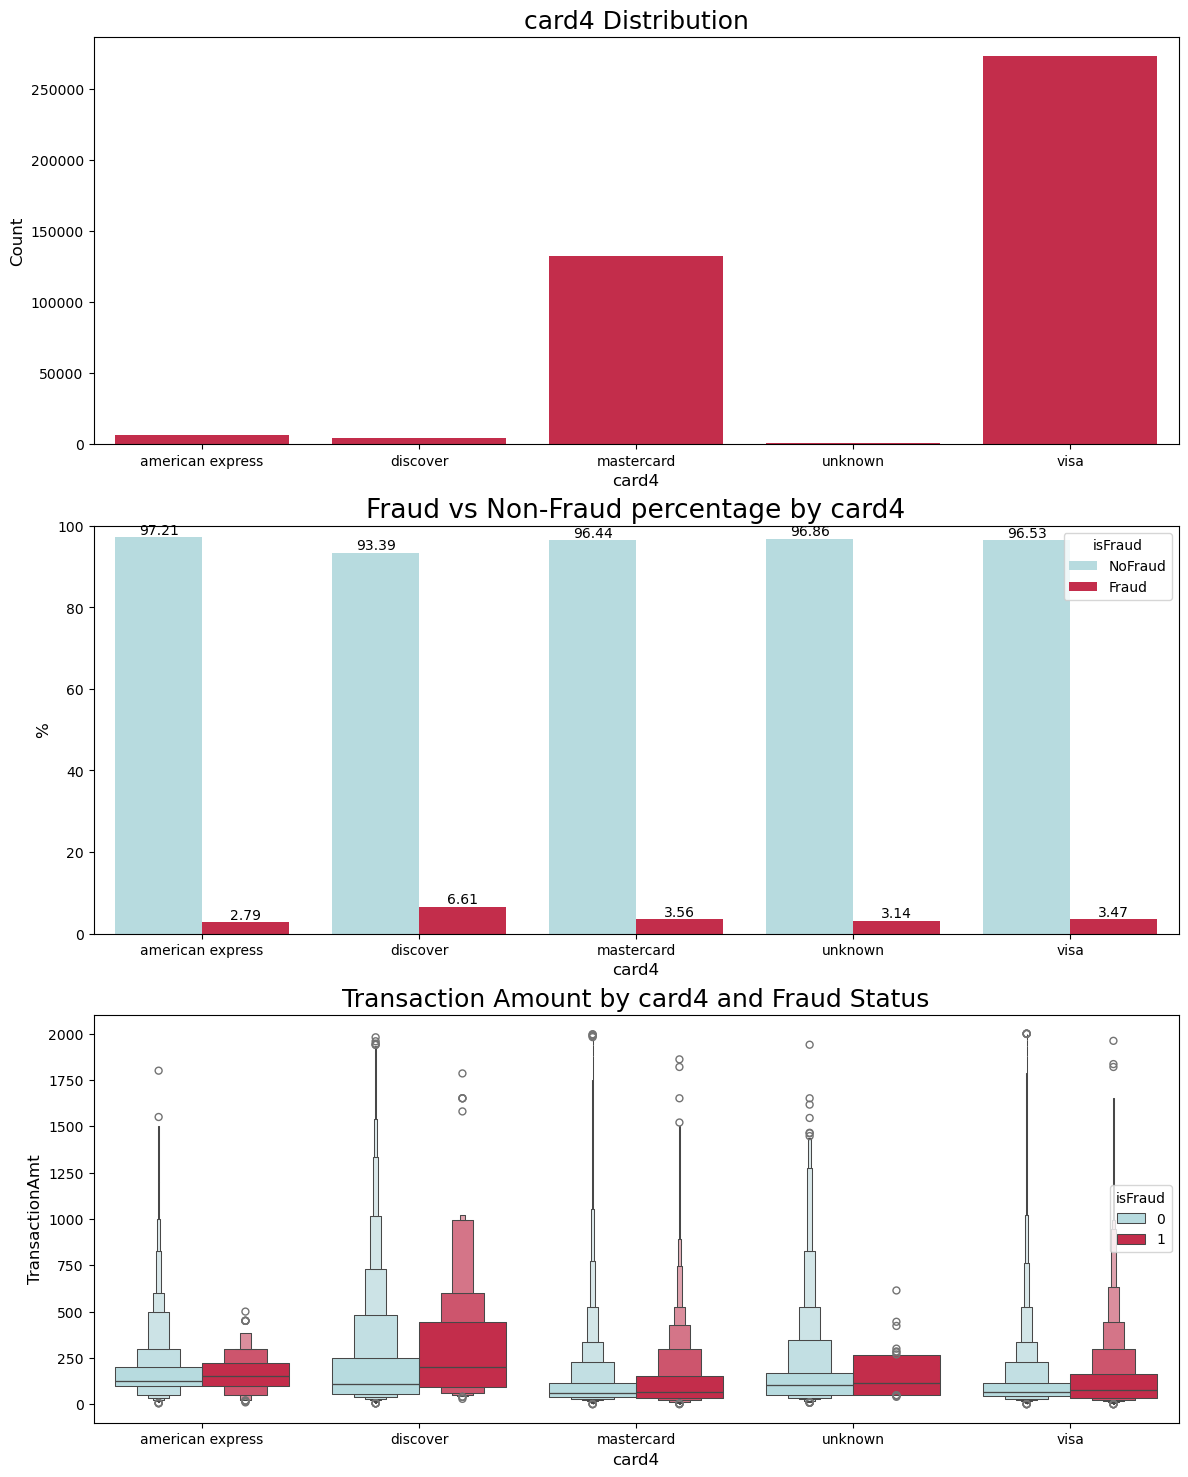

In [56]:
plot_cf(df_train, 'card4')

- Для переменной `card4` можно заметить, что в данных преимущественно находяся наблюдения по картам Visa или MasterCard, что неудивительно, учитывая популярность этих платежных систем. Из интересного, что было, в целом, видно на предыдущих графика, заметно, что медианная сумма транзакции для каждой категории выше у фрод транзакций, чем у обычных.

In [58]:
fill_mc_values(df_train, ['card6'])

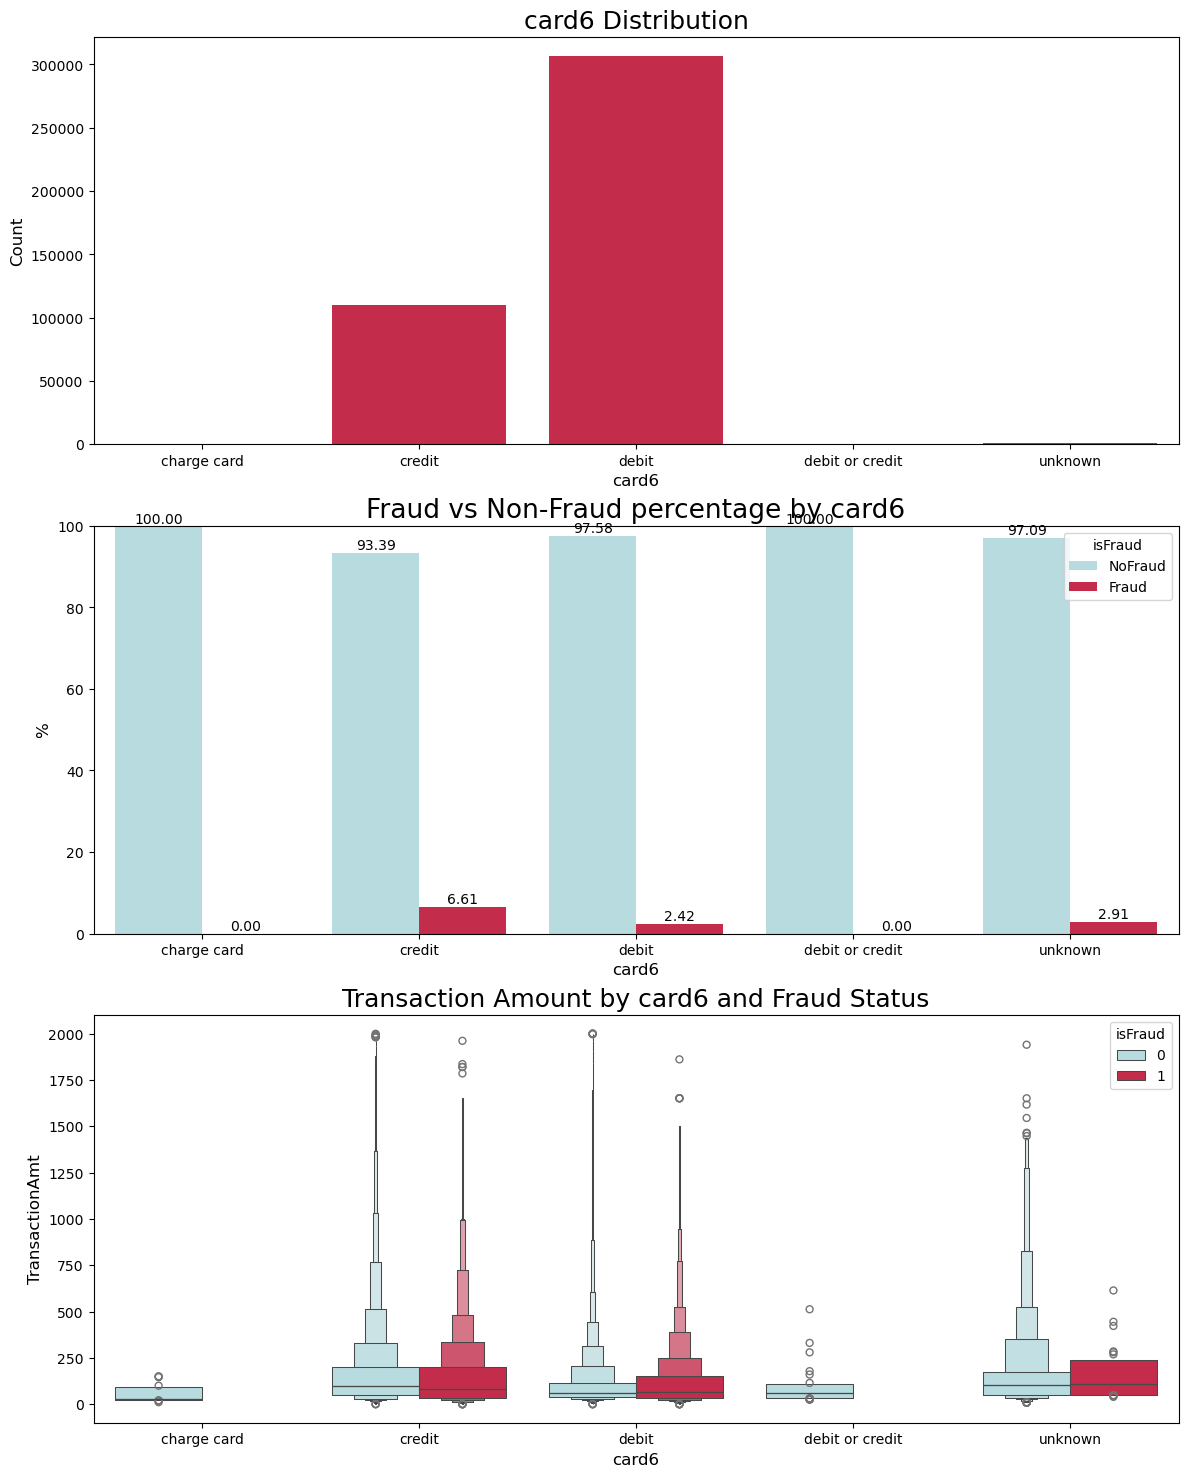

In [60]:
plot_cf(df_train, 'card6')

- По переменной `card6` видно, транзакции по кредитным картам имеют большую долю фрод транзакций, чем транзакции по дебитовым картам. Причем интересно, что медианная сумма транзакций по кредитным картам для фрод транзакций ниже, чем у обычных.

## M1 - M9

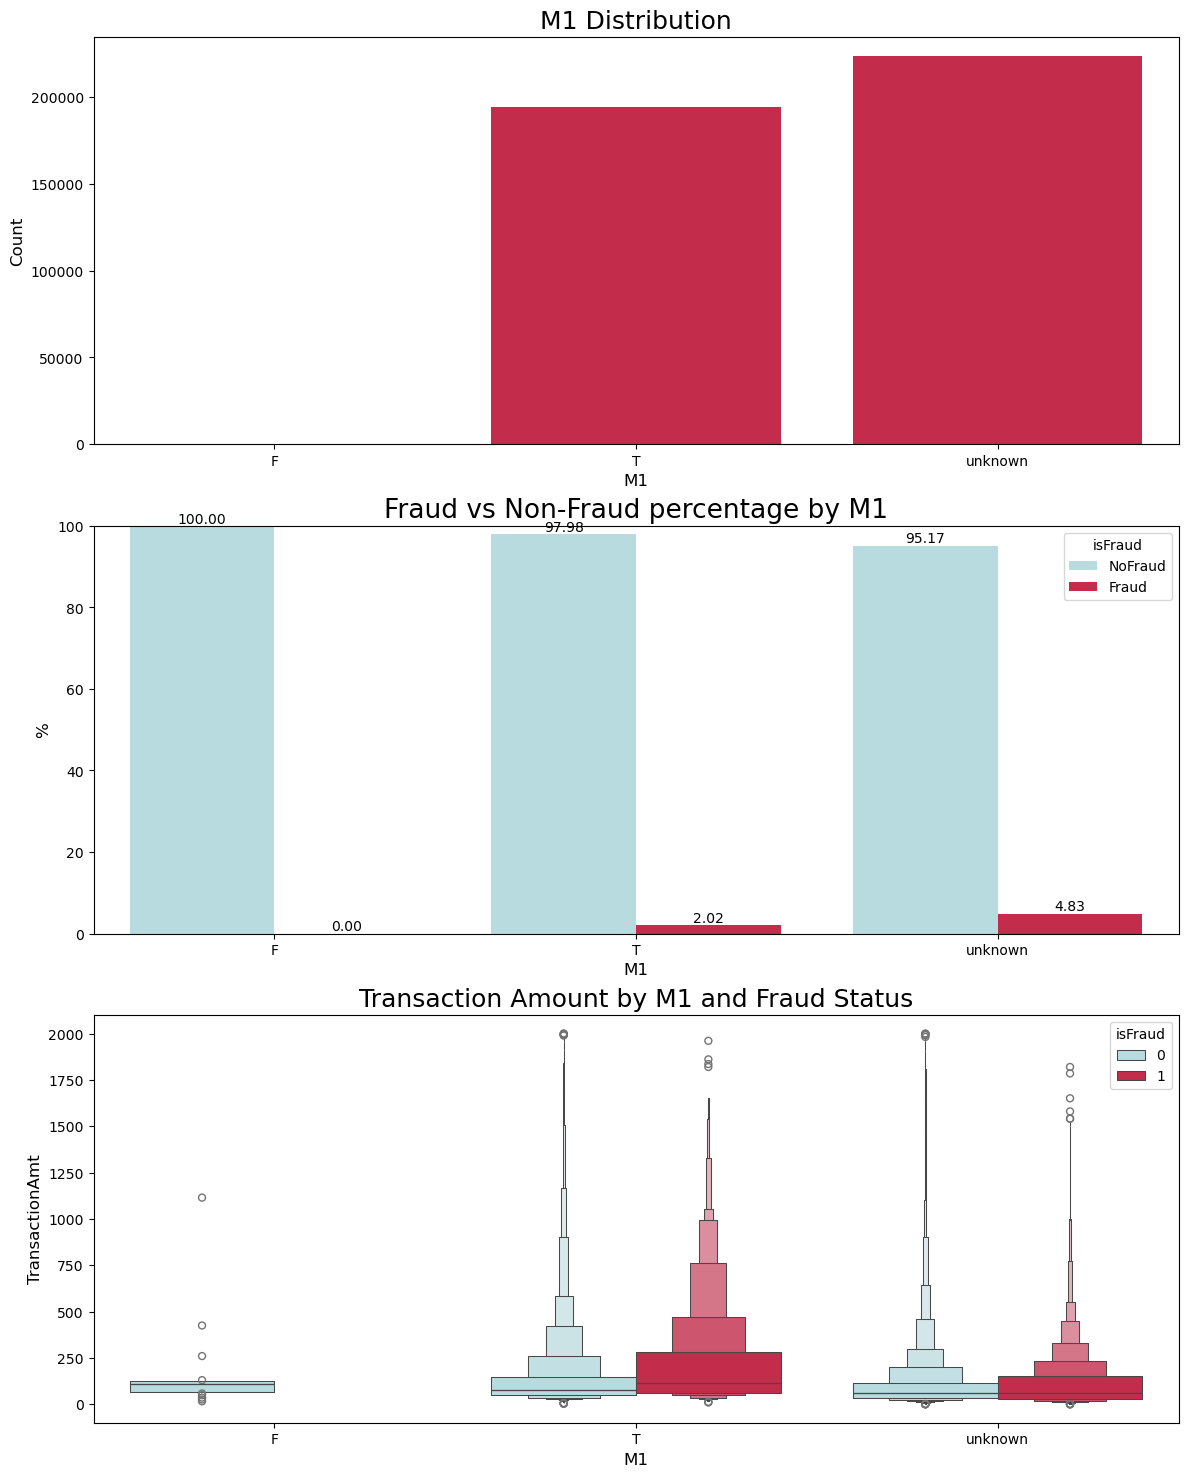

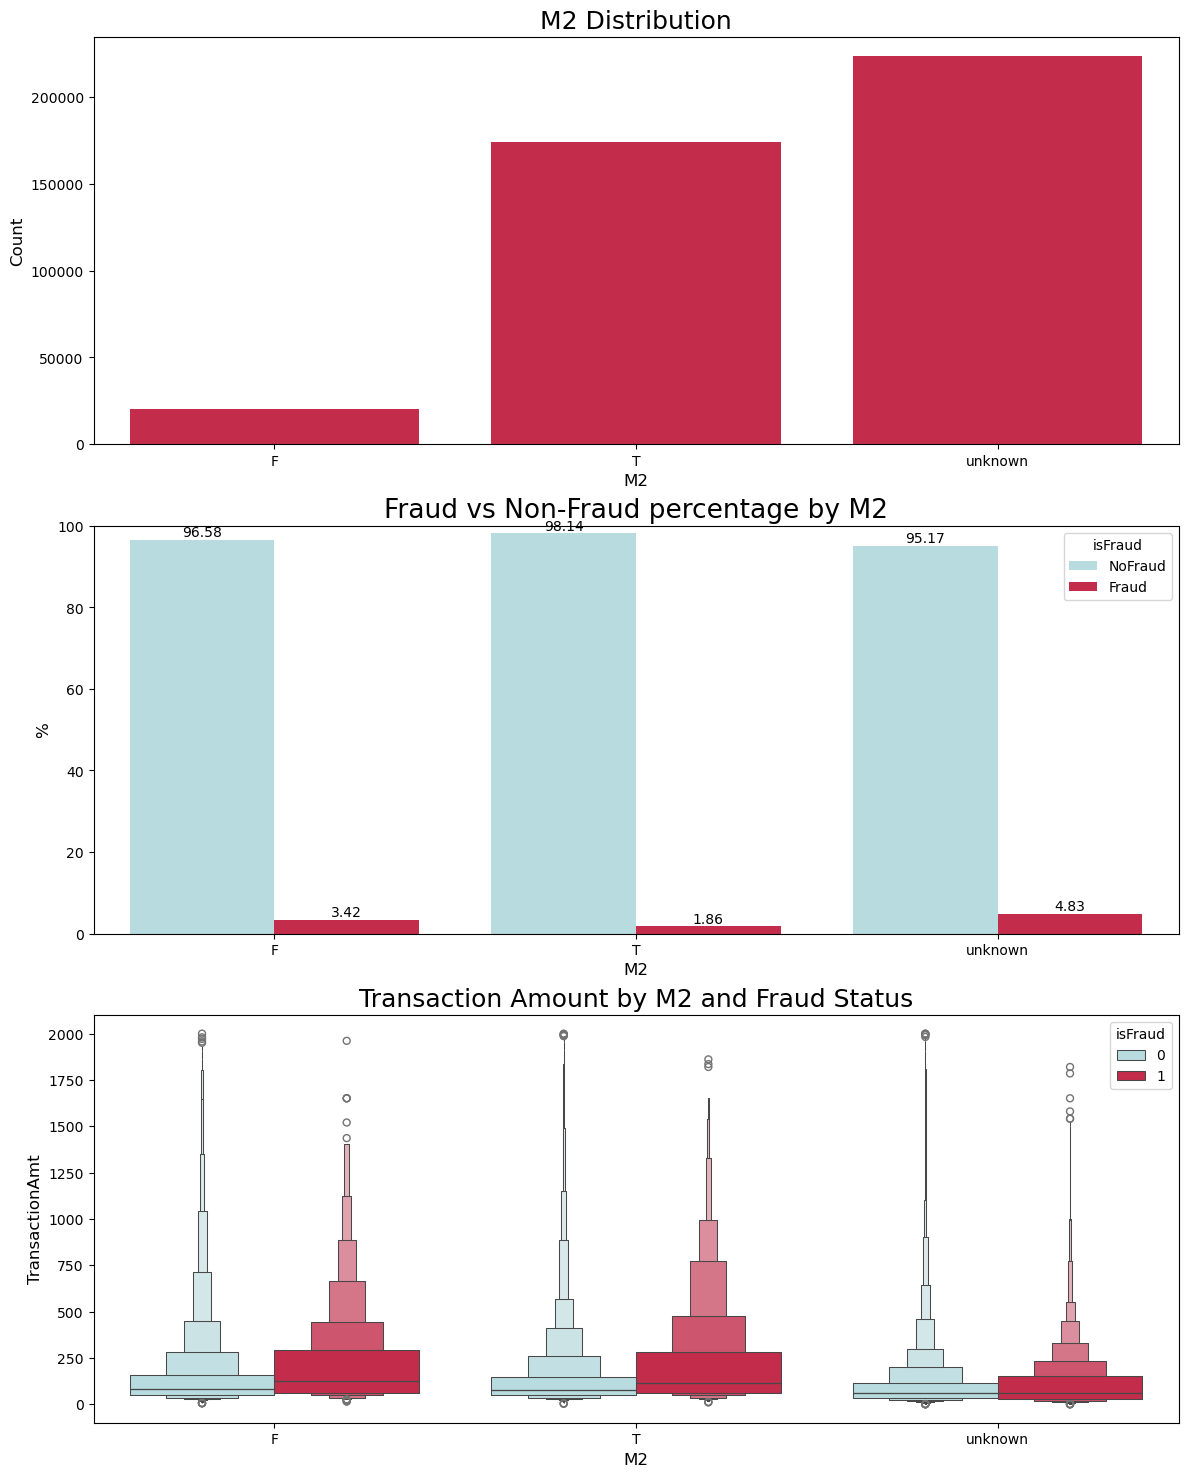

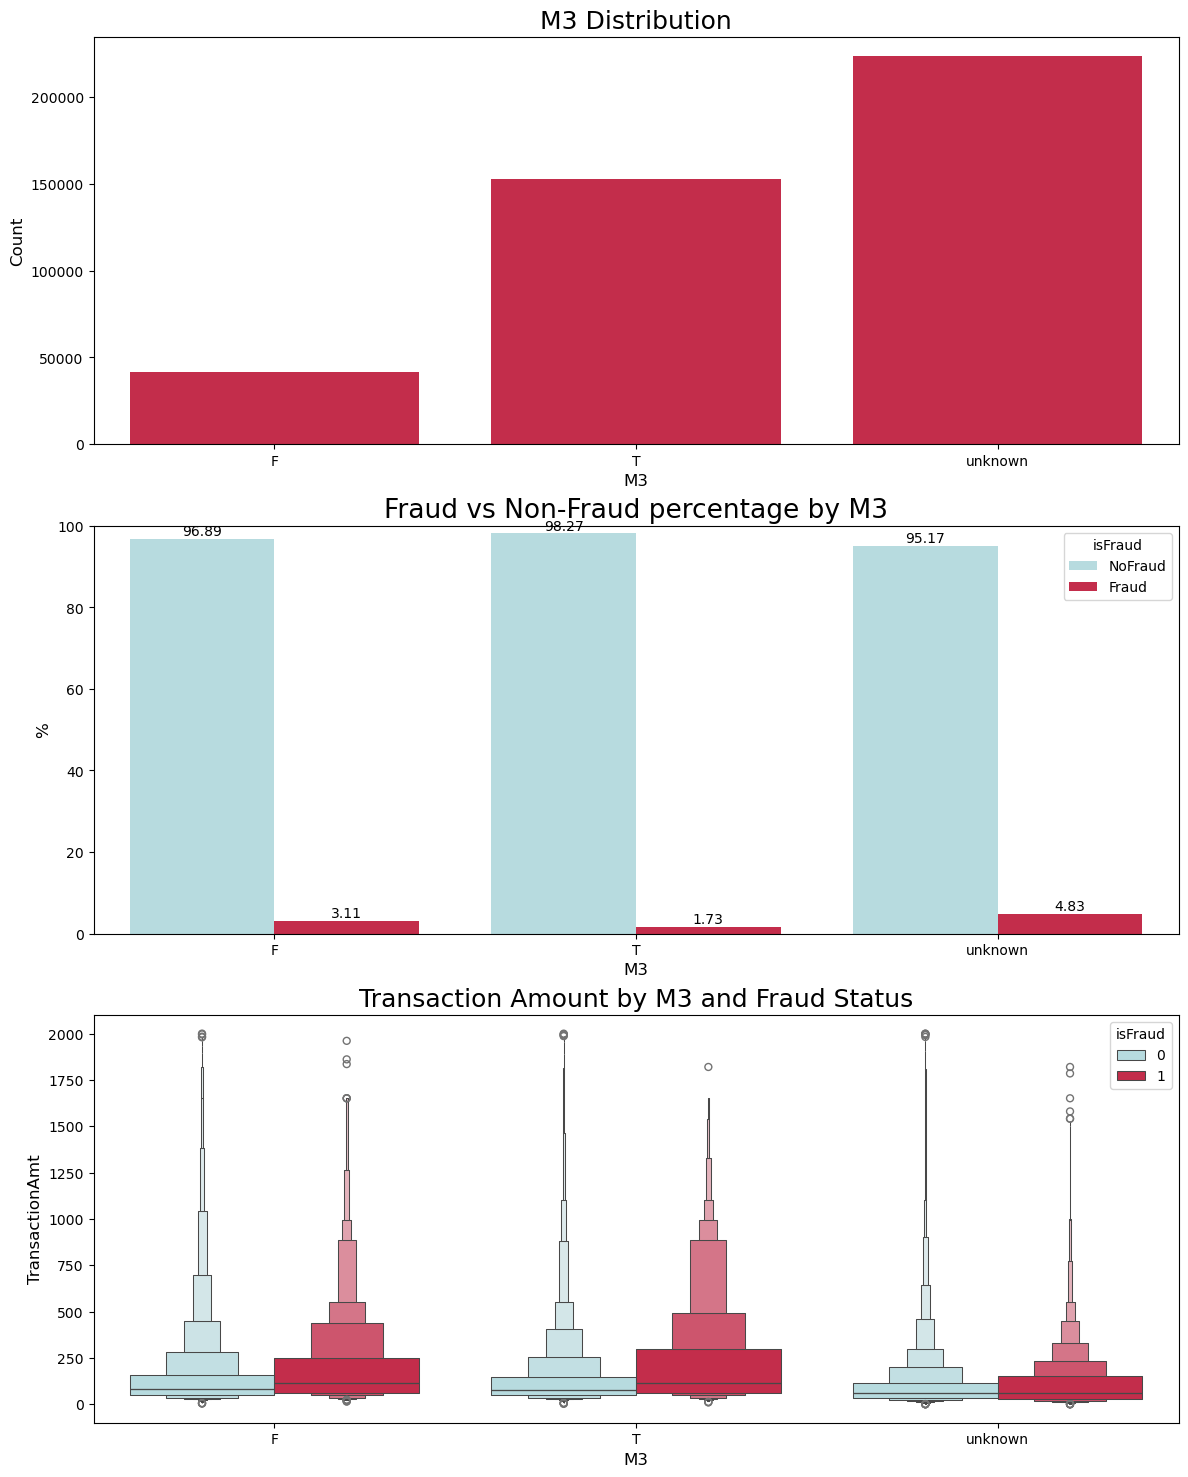

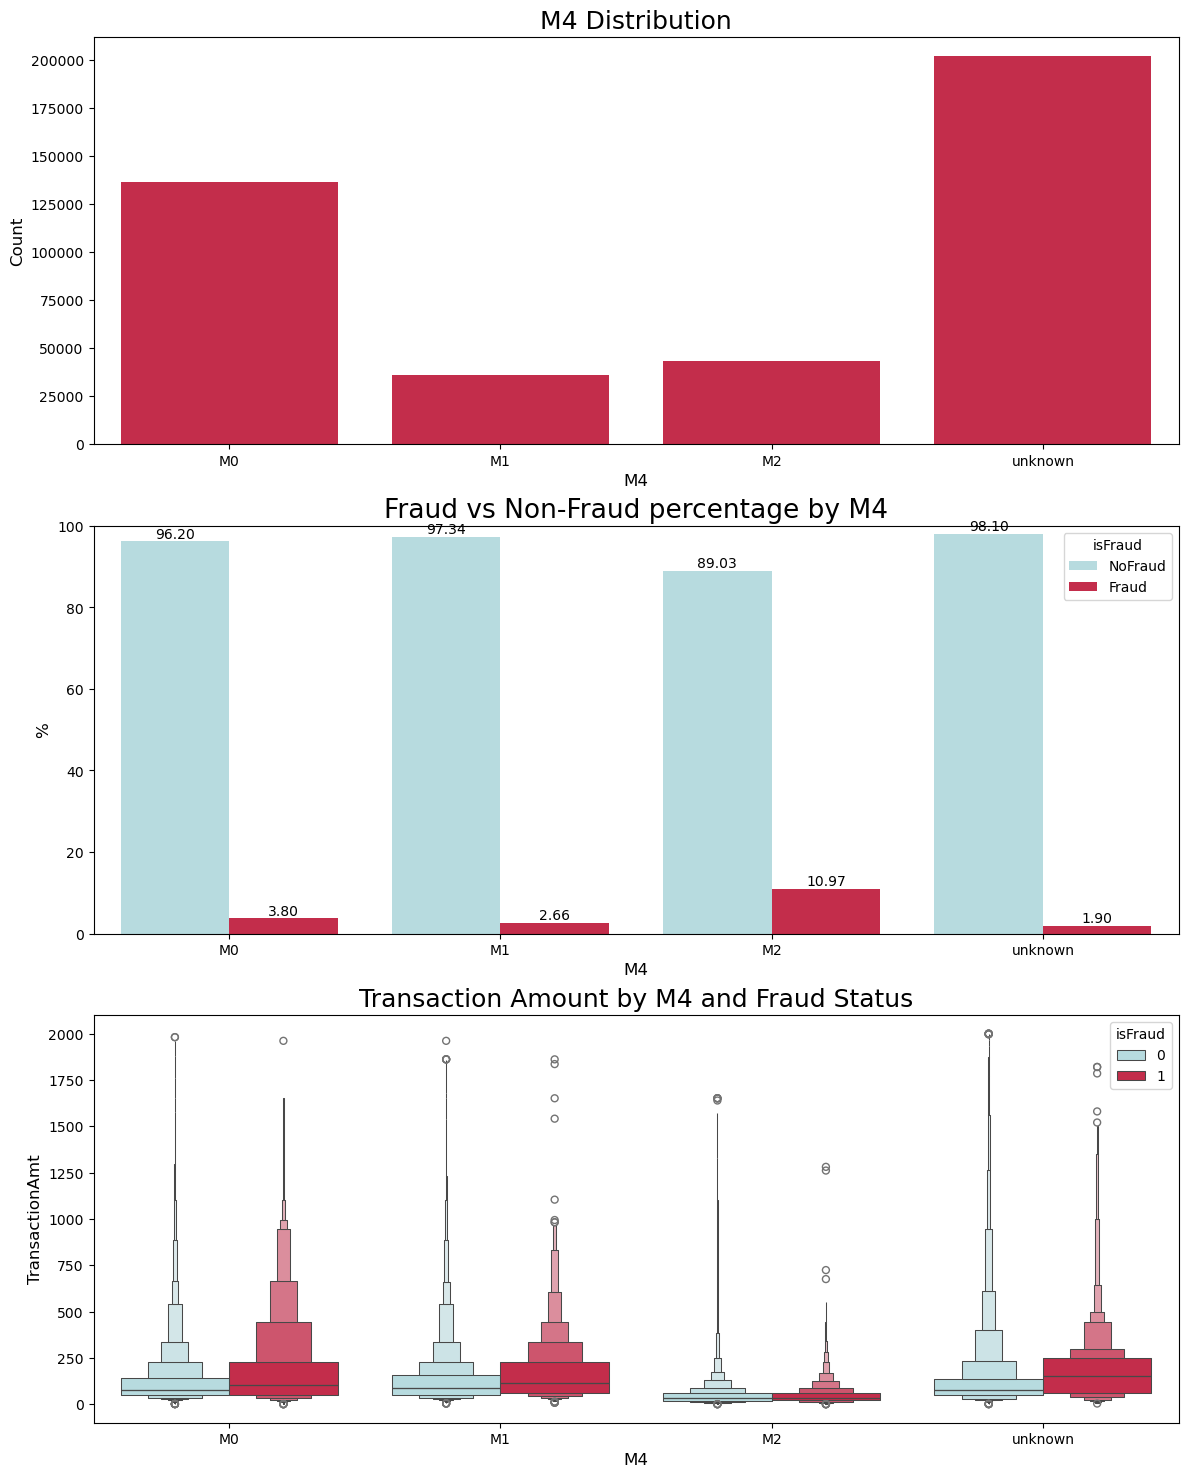

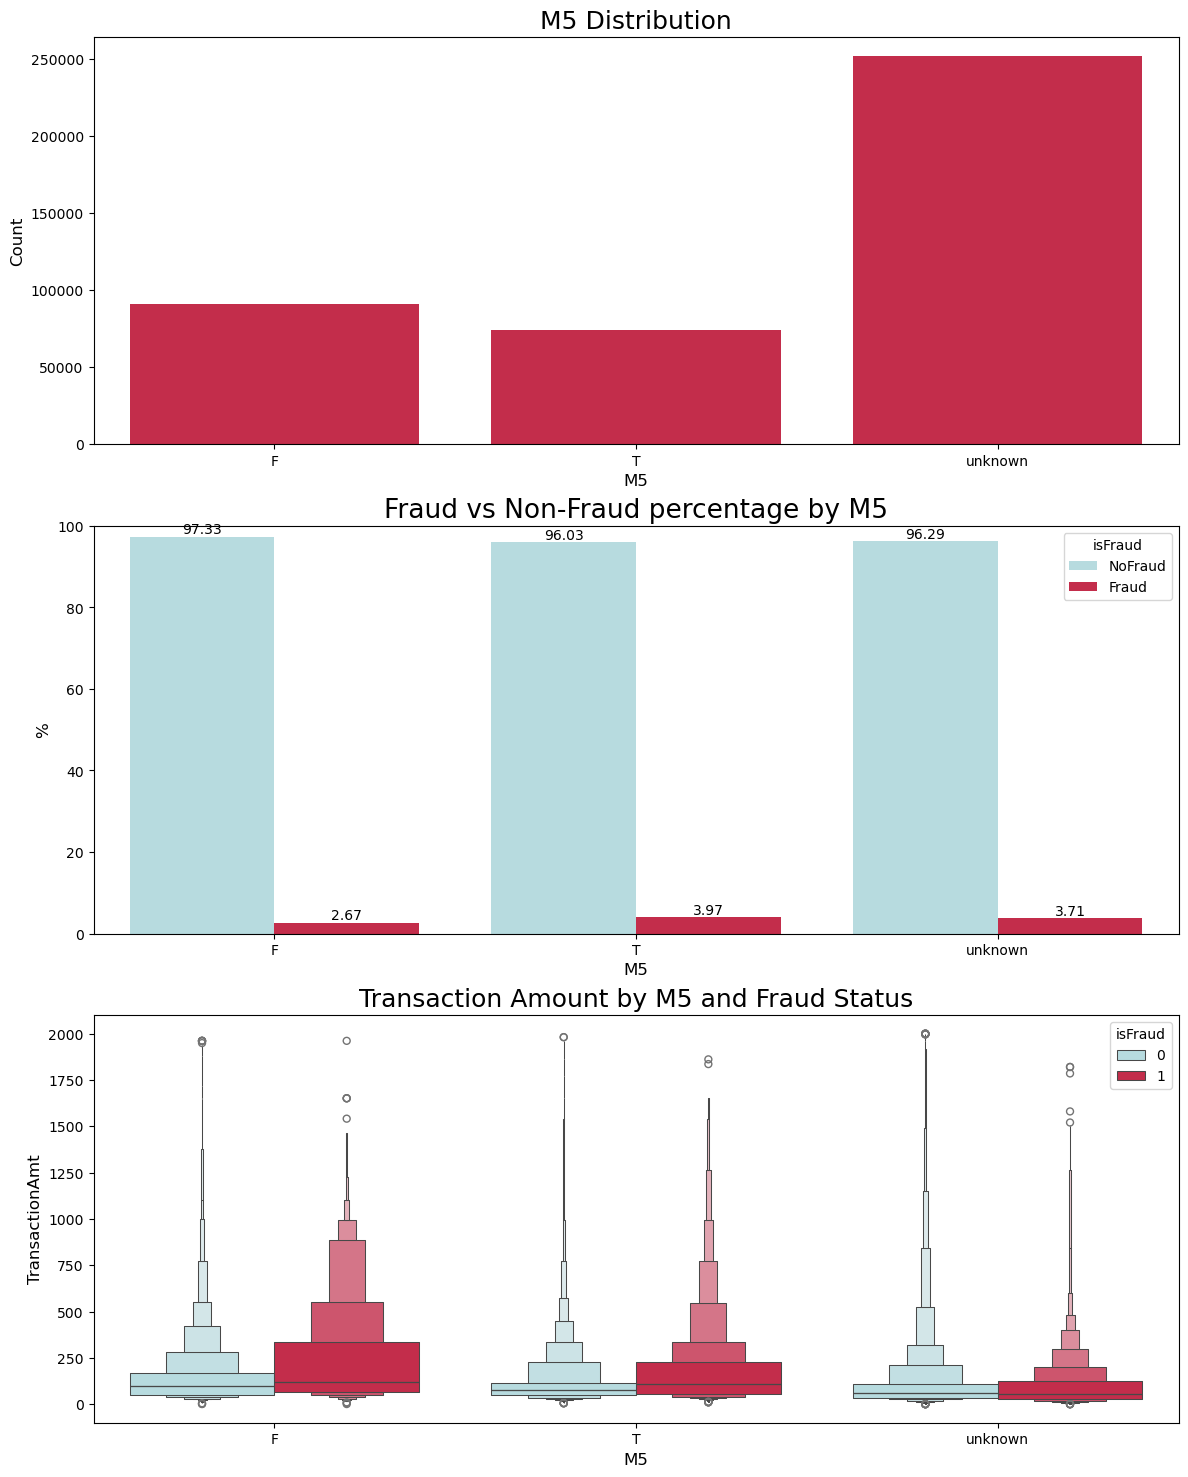

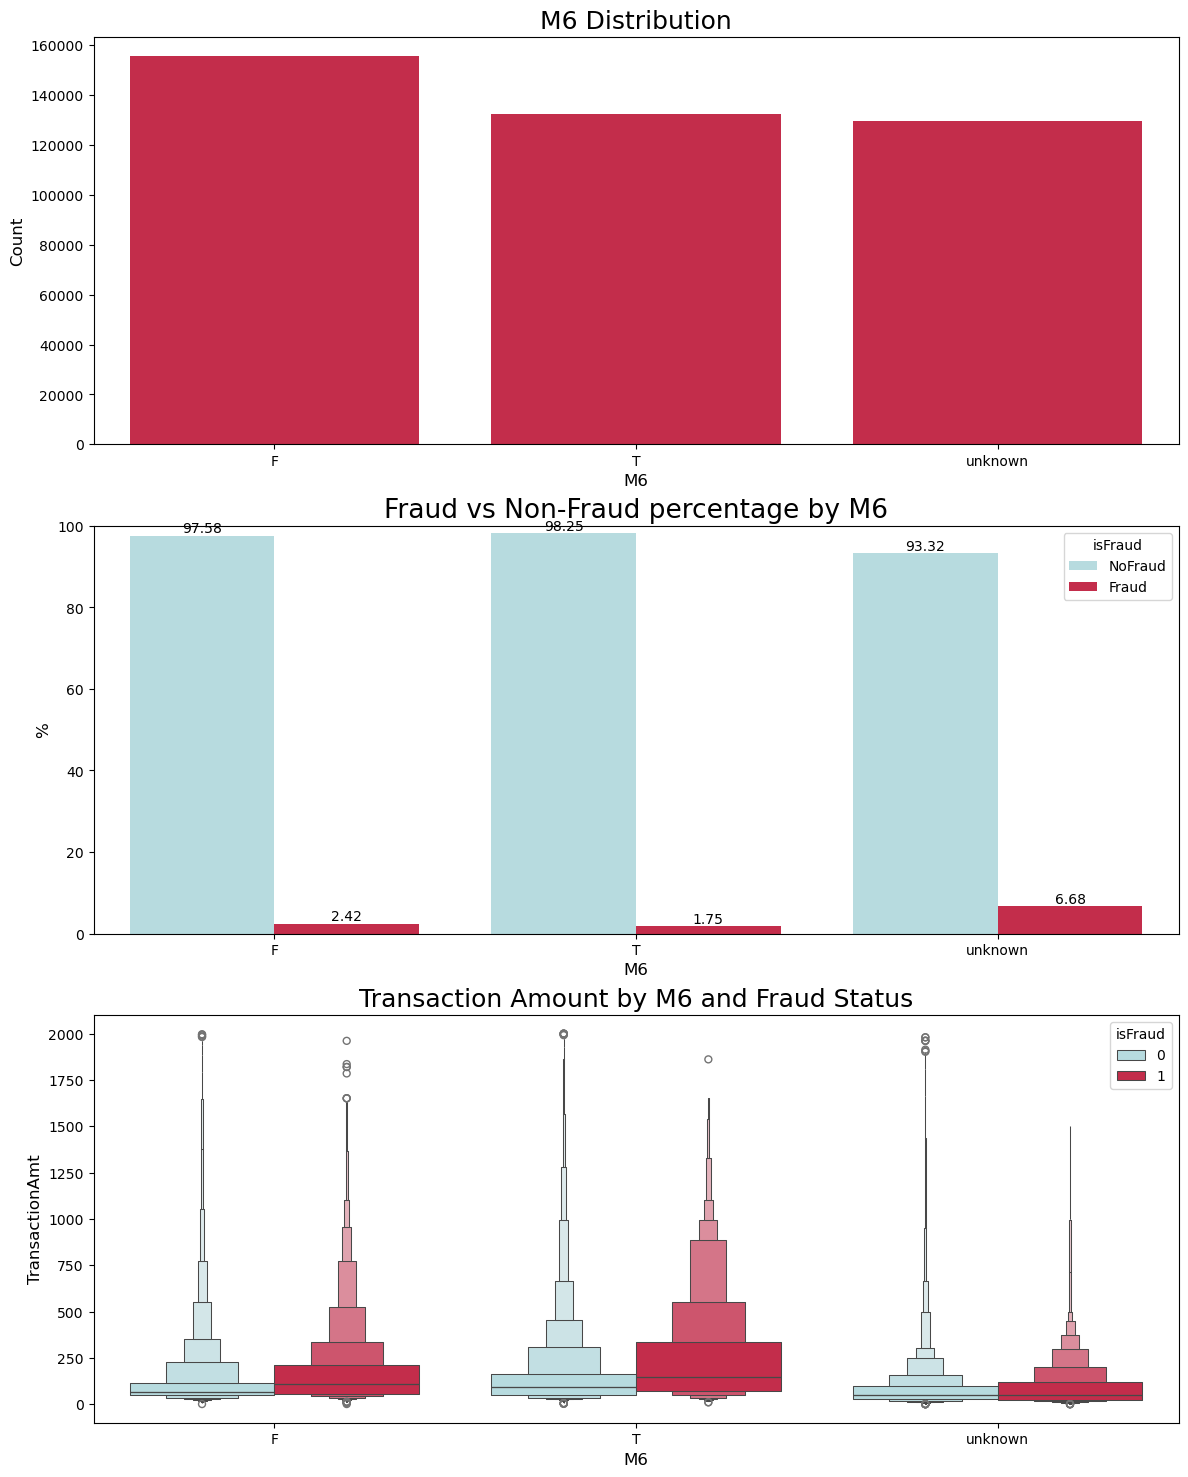

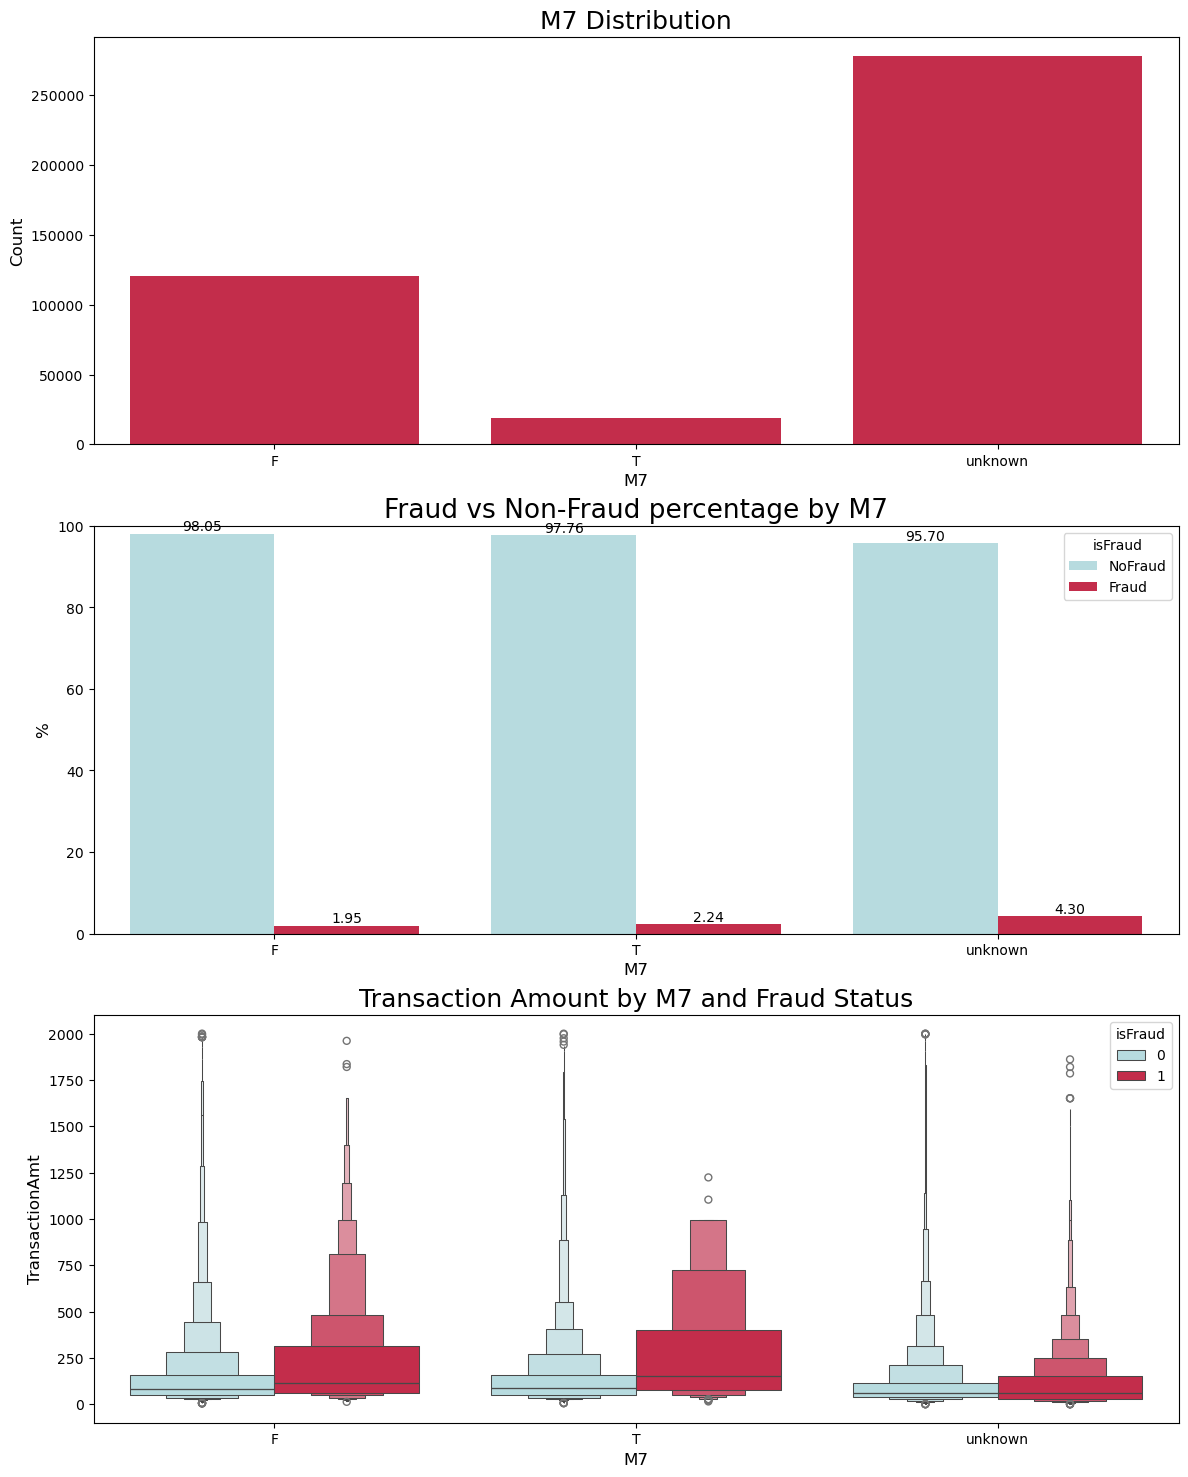

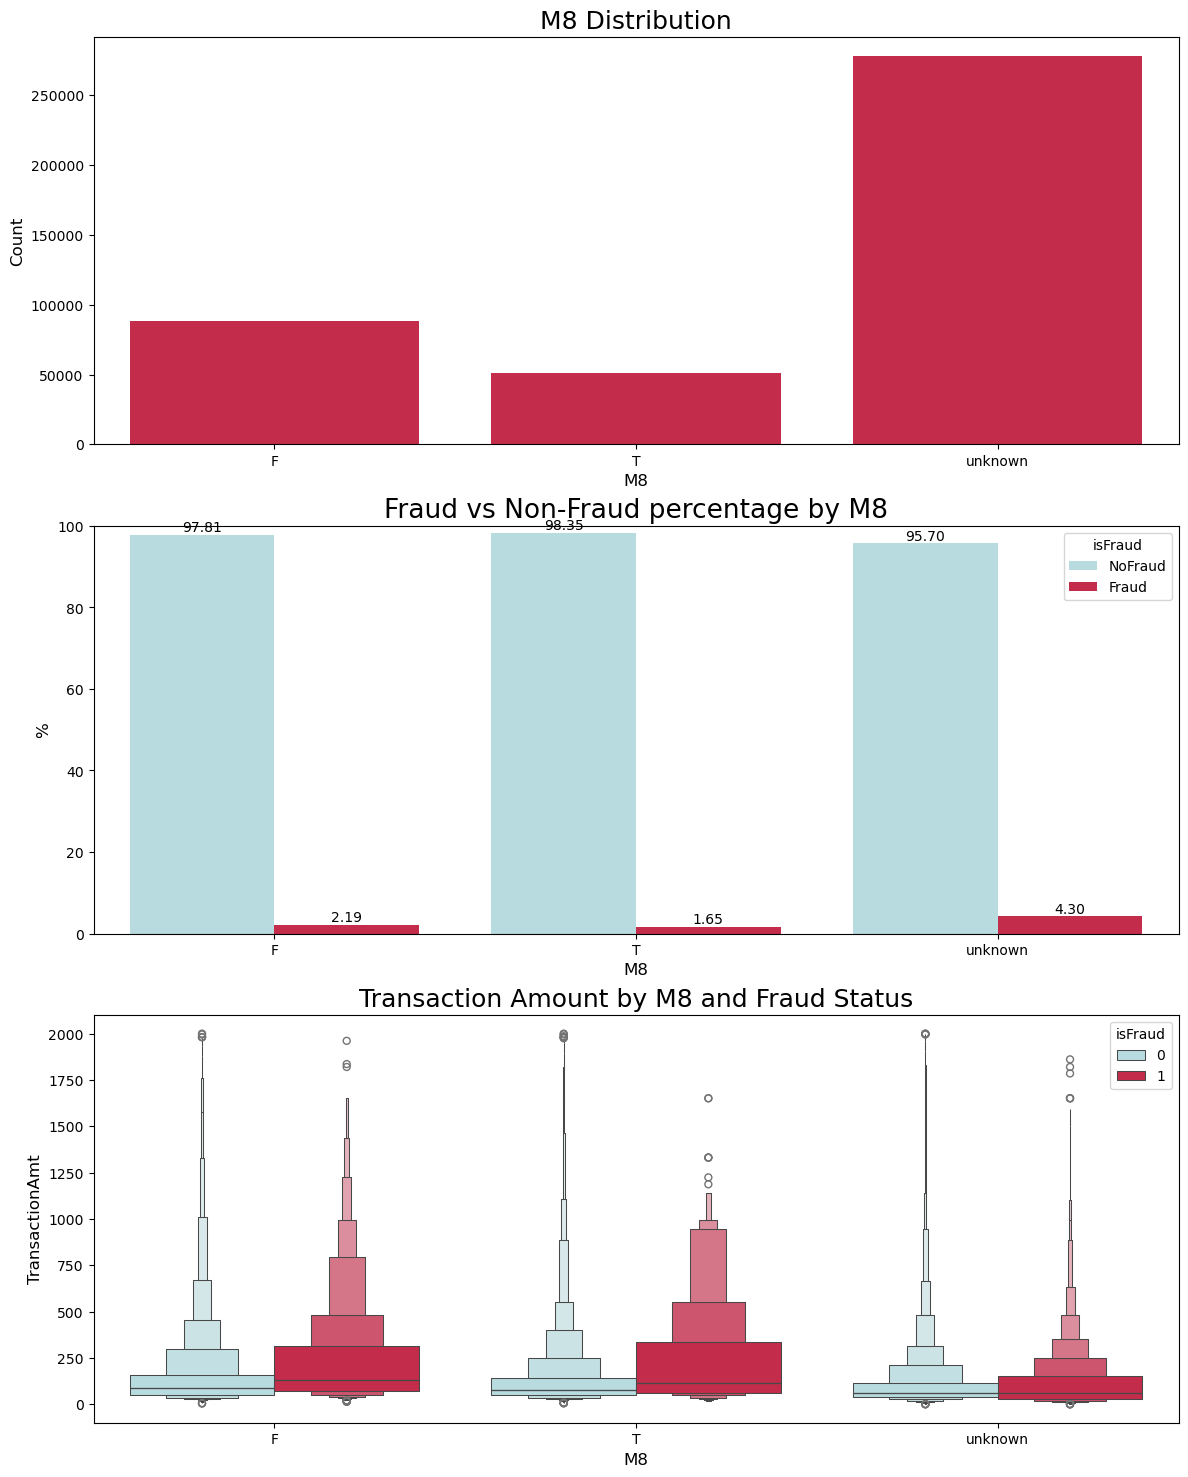

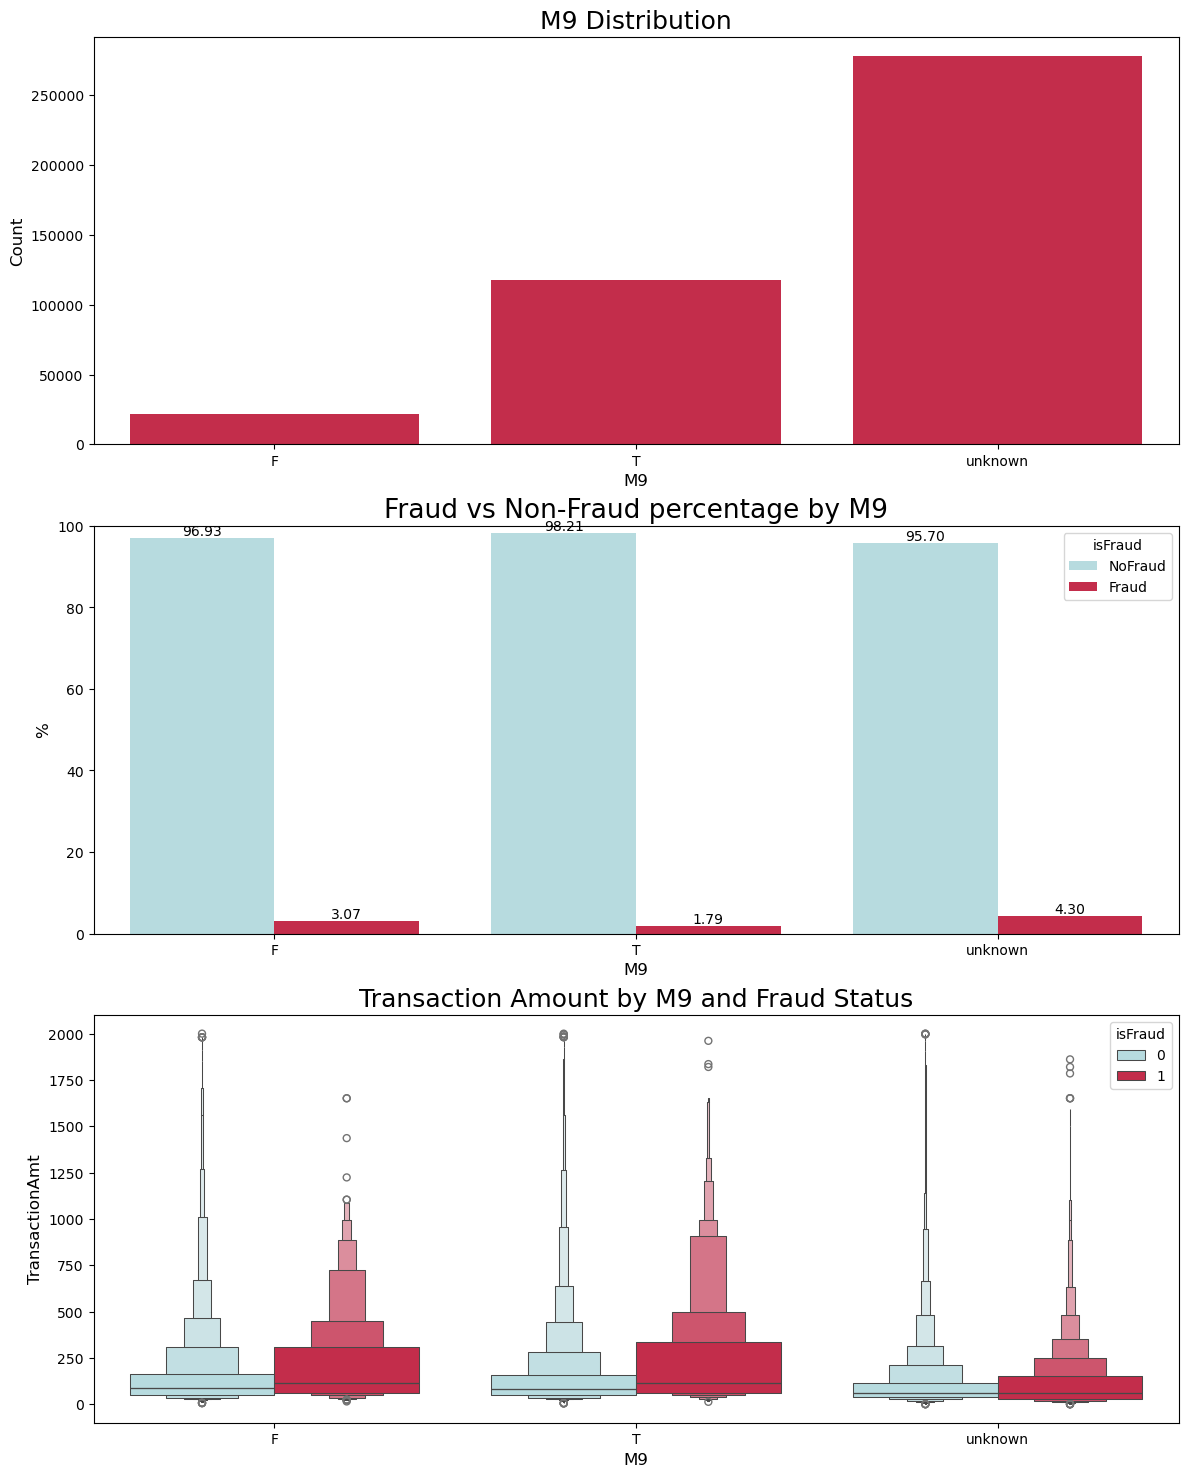

In [101]:
fill_mc_values(df_train, ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'])
for col in ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']:
    plot_cf(df_train, col)

- По графикам видно, что в большинстве случаев в переменных `M1` - `M9` большую часть категорий составляют неизвестные значения. Причем во всех переменных, кроме `M4`, неизвестная категория имеет наибольшую долю фрод транзакций, по сравнению с другими.

## Addr1 - Addr2

In [105]:
df_train[['addr1', 'addr2']].quantile([0.01, .025, .1, .25, .5, .75, .90,.975, .99])

addr1  addr2
0.010  123.0   87.0
0.025  123.0   87.0
0.100  177.0   87.0
0.250  204.0   87.0
0.500  299.0   87.0
0.750  330.0   87.0
0.900  441.0   87.0
0.975  498.0   87.0
0.990  512.0   87.0

In [89]:
fill_mc_values(df_train, ['addr1', 'addr2'])

In [75]:
df_train.loc[df_train.addr1.isin(df_train.addr1.value_counts()[df_train.addr1.value_counts() <= 4000 ].index), 'addr1'] = "Others"
df_train.loc[df_train.addr2.isin(df_train.addr2.value_counts()[df_train.addr2.value_counts() <= 50 ].index), 'addr2'] = "Others"

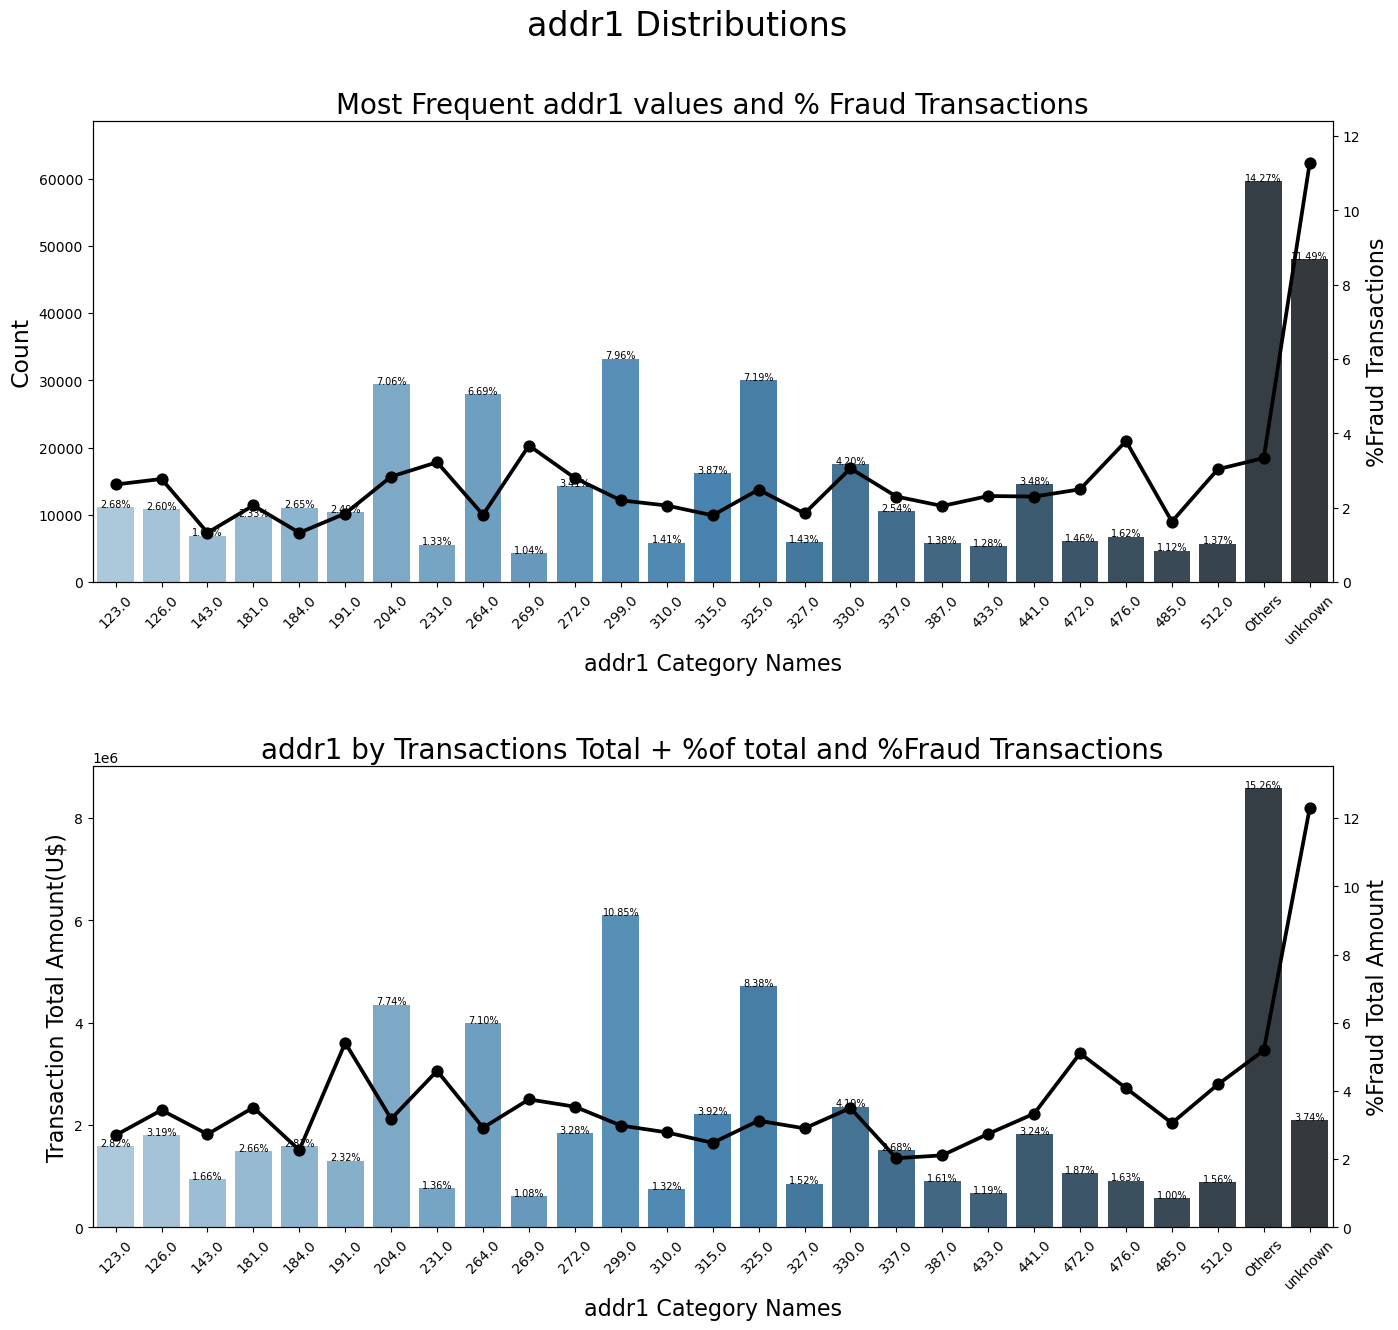

In [91]:
plot_cfmv(df_train, 'addr1')

- По графикам видно, что наибольшую долю фрод транзакций имеют неизвестные значения категории (unknown). Причем сумма всех транзакций не такая высокая для этих значений, если сравнивать с долей таких значений в наборе данных.

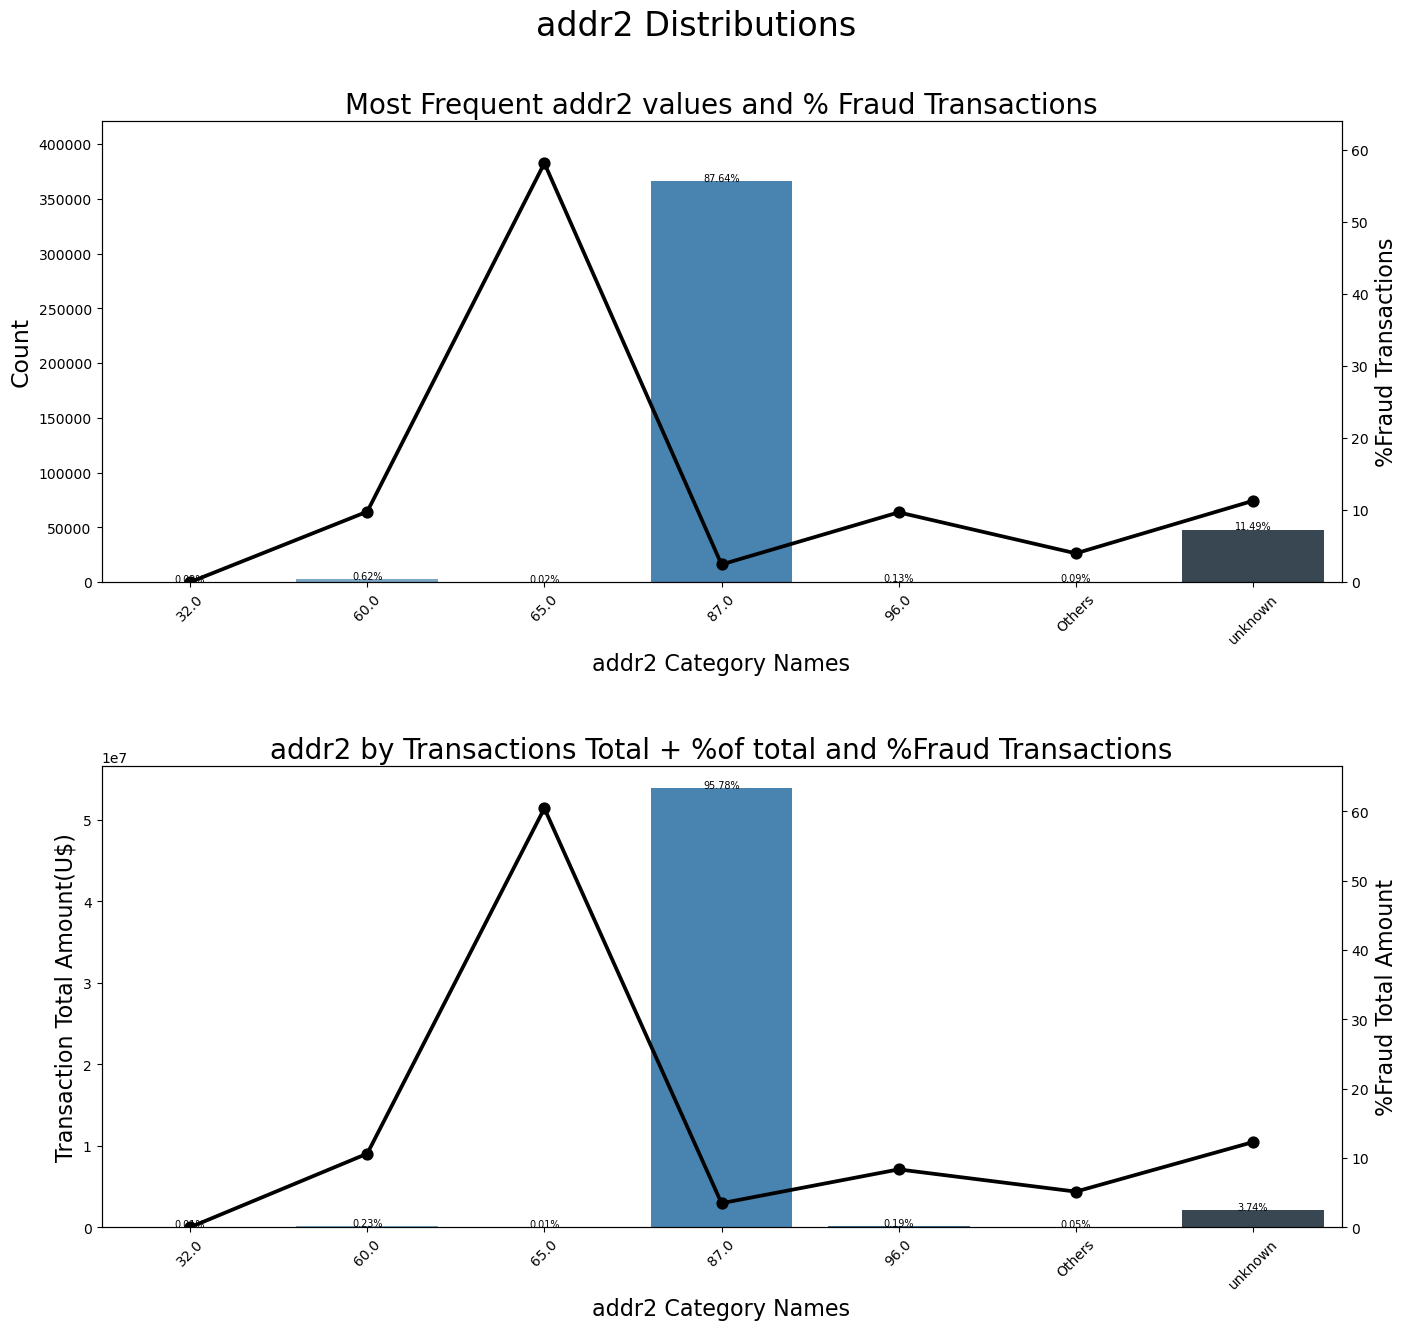

In [93]:
plot_cfmv(df_train, 'addr2')

- Большая часть наблюдений в выборке имеет значение категории равное *87*, что в какой-то мере делает неинформативным этот признак. Однако есть на этом графике и нечто инетересное. Наблюдения со значением категории *65* имеют просто огромную долю фрод транзакций в 60%, но при этом в данных имеется всего лишь 0.01% таких наблюдений.

## P_emaildomain - R_emaildomain

In [81]:
df_train.loc[df_train['P_emaildomain'].isin(['gmail.com', 'gmail']), 'P_emaildomain'] = 'Google'

df_train.loc[df_train['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx', 'yahoo.co.uk',
                                             'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                             'yahoo.es']), 'P_emaildomain'] = 'Yahoo Mail'

df_train.loc[df_train['P_emaildomain'].isin(['hotmail.com', 'outlook.com', 'msn.com', 'live.com.mx', 
                                             'hotmail.es', 'hotmail.co.uk', 'hotmail.de',
                                             'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'

df_train.loc[df_train['P_emaildomain'].isin(
    df_train['P_emaildomain'].value_counts()[df_train['P_emaildomain'].value_counts() <= 400].index), 'P_emaildomain'] = "Others"

fill_mc_values(df_train, ['P_emaildomain'])


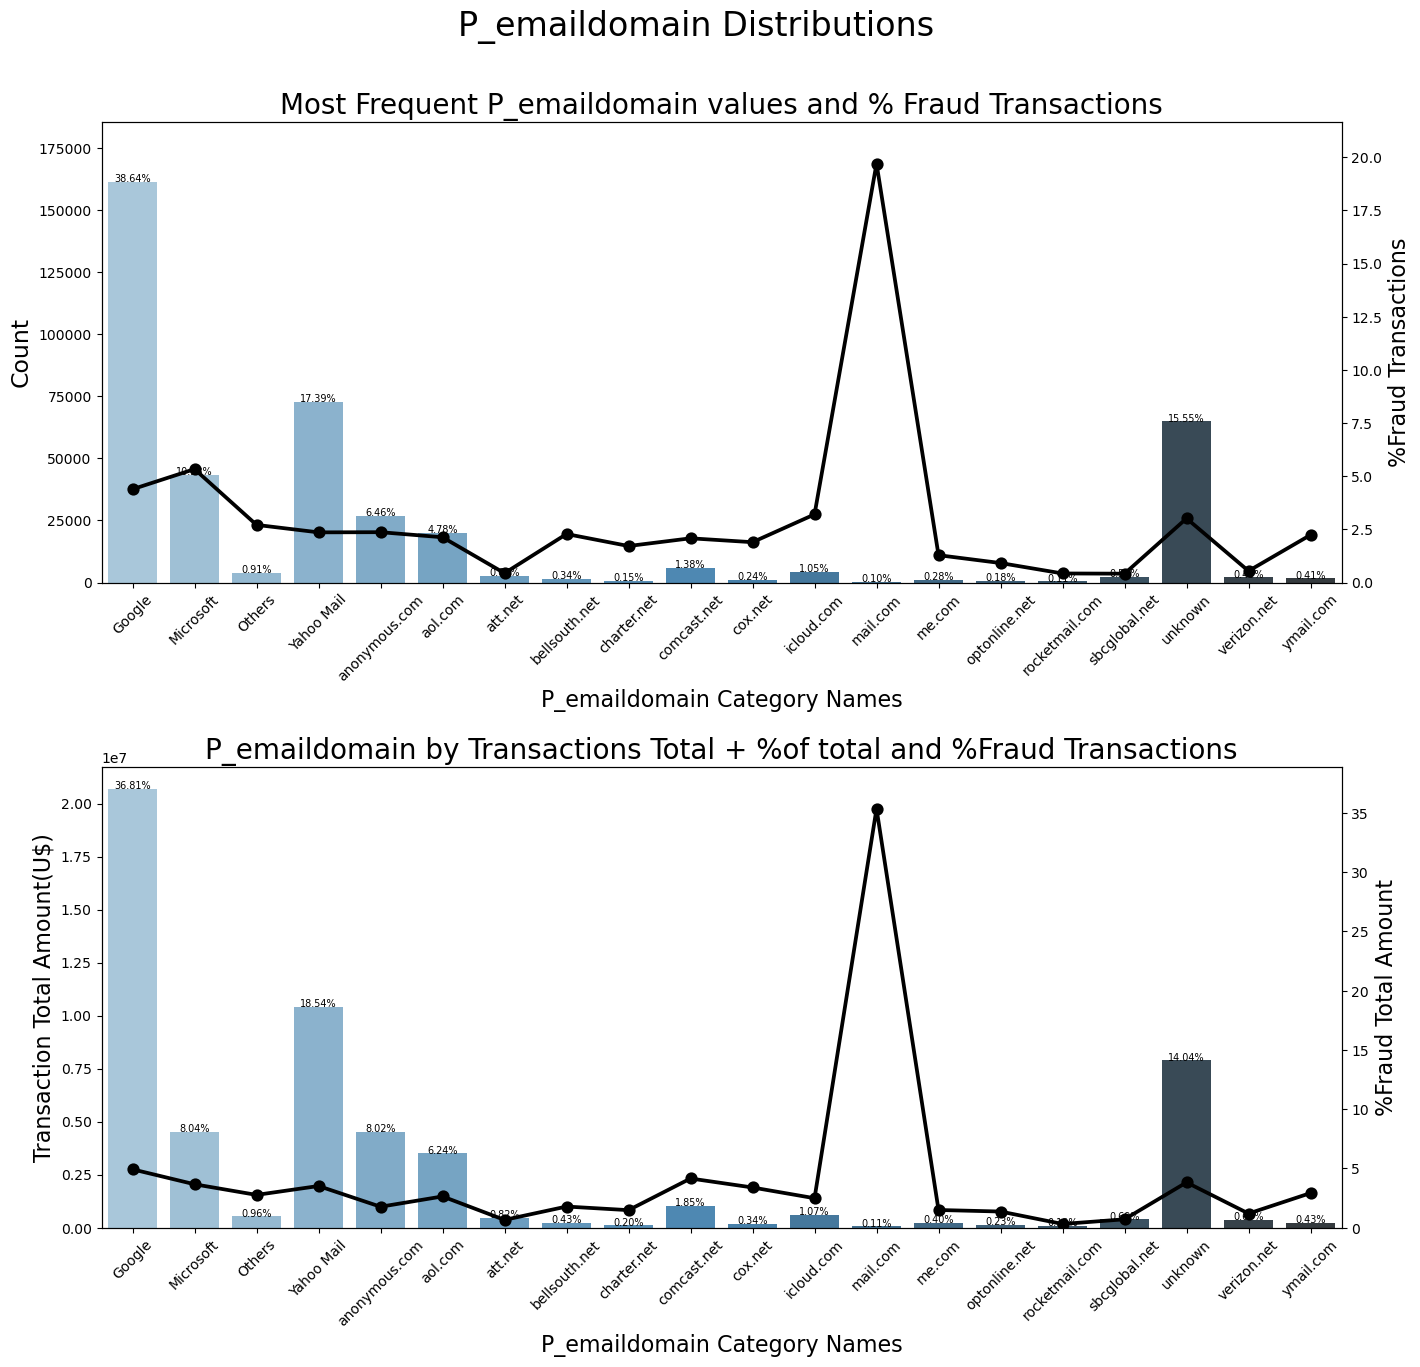

In [83]:
plot_cfmv(df_train, 'P_emaildomain')

In [85]:
df_train.loc[df_train['R_emaildomain'].isin(['gmail.com', 'gmail']), 'R_emaildomain'] = 'Google'

df_train.loc[df_train['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx', 'yahoo.co.uk',
                                             'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                             'yahoo.es']), 'R_emaildomain'] = 'Yahoo Mail'

df_train.loc[df_train['R_emaildomain'].isin(['hotmail.com', 'outlook.com', 'msn.com', 'live.com.mx', 
                                             'hotmail.es', 'hotmail.co.uk', 'hotmail.de',
                                             'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'R_emaildomain'] = 'Microsoft'

df_train.loc[df_train['R_emaildomain'].isin(
    df_train['R_emaildomain'].value_counts()[df_train['R_emaildomain'].value_counts() <= 400].index),
    'R_emaildomain'] = "Others"

fill_mc_values(df_train, ['R_emaildomain'])

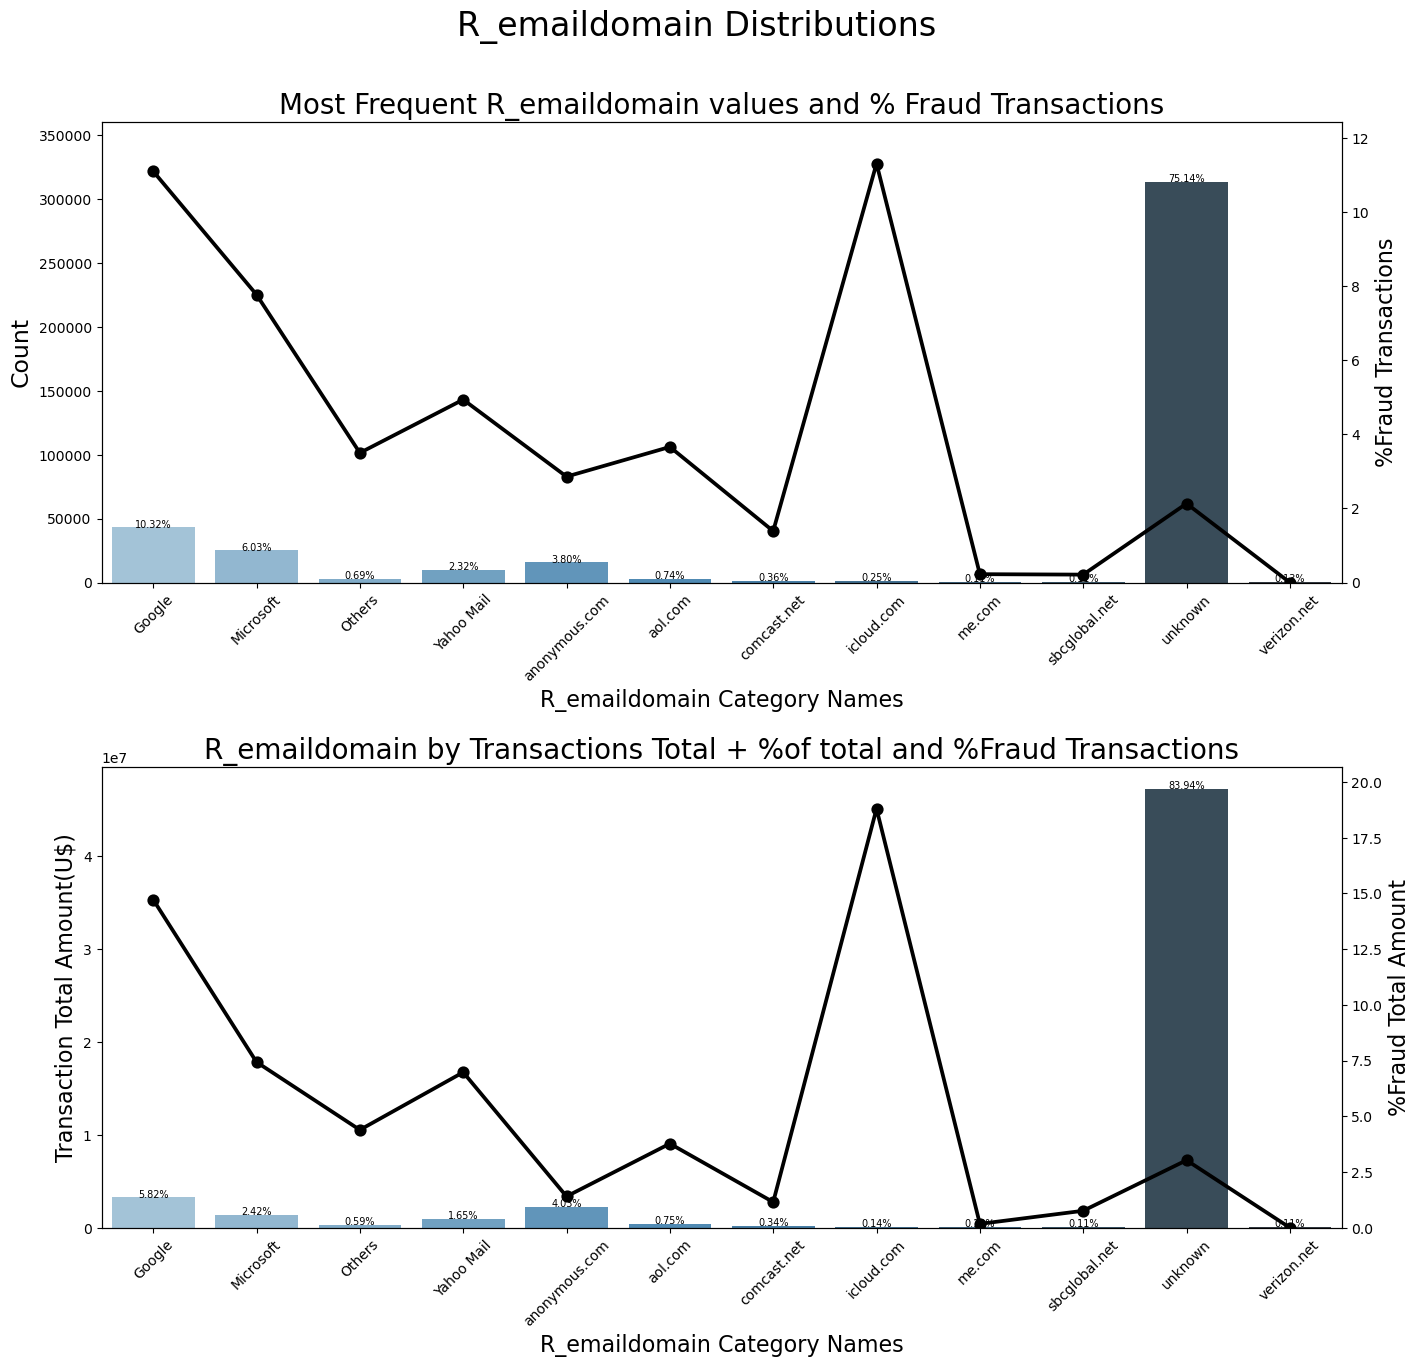

In [87]:
plot_cfmv(df_train, 'R_emaildomain')

- По графикам видно, что фрод транзакции имеют наибольшую долю с категориями почтовых систем от Google и Microsoft.

## C1-C14

In [98]:
resumetable(df_train[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
                      'C9', 'C10', 'C11', 'C12', 'C13', 'C14']])

Dataset Shape: (417559, 14)


Name   dtypes  Missing  ...  Second Value  Third Value  Entropy
0    C1  float64        0  ...           1.0          1.0     2.68
1    C2  float64        0  ...           1.0          1.0     2.69
2    C3  float64        0  ...           0.0          0.0     0.04
3    C4  float64        0  ...           0.0          0.0     1.15
4    C5  float64        0  ...           0.0          0.0     2.02
5    C6  float64        0  ...           1.0          1.0     2.48
6    C7  float64        0  ...           0.0          0.0     0.73
7    C8  float64        0  ...           0.0          0.0     1.29
8    C9  float64        0  ...           0.0          1.0     2.55
9   C10  float64        0  ...           0.0          0.0     1.27
10  C11  float64        0  ...           1.0          1.0     2.15
11  C12  float64        0  ...           0.0          0.0     0.90
12  C13  float64        0  ...           1.0          1.0     4.54
13  C14  float64        0  ...           1.0          1.0     2.63

[14 rows x 8 columns]

In [100]:
df_train[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
                      'C9', 'C10', 'C11', 'C12', 'C13', 'C14']].describe()

C1             C2  ...            C13            C14
count  417559.000000  417559.000000  ...  417559.000000  417559.000000
mean       15.878633      17.381448  ...      32.560172       8.768236
std       154.581684     179.413789  ...     137.584341      54.828081
min         0.000000       0.000000  ...       0.000000       0.000000
25%         1.000000       1.000000  ...       1.000000       1.000000
50%         1.000000       1.000000  ...       2.000000       1.000000
75%         3.000000       3.000000  ...      11.000000       2.000000
max      4685.000000    5691.000000  ...    2918.000000    1429.000000

[8 rows x 14 columns]

In [102]:
df_train.loc[df_train.C1.isin(df_train.C1.value_counts()[df_train.C1.value_counts() <= 400 ].index), 'C1'] = "Others"

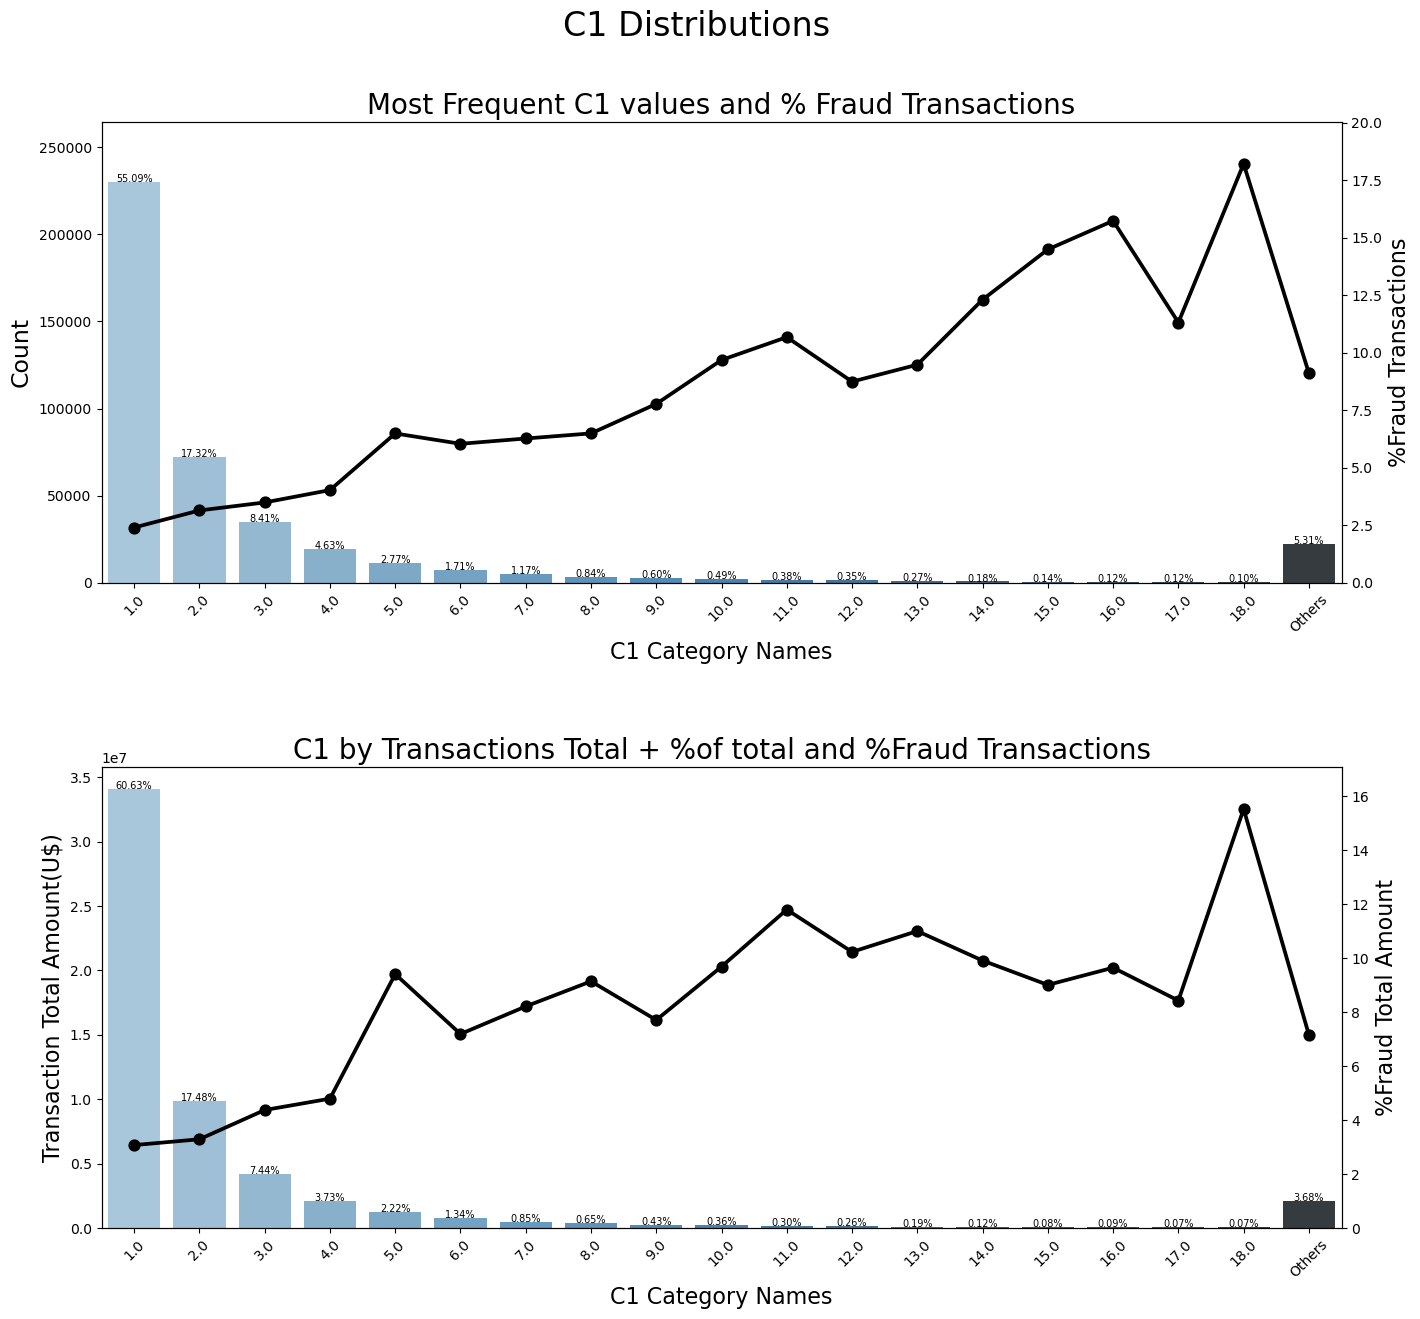

In [104]:
plot_cfmv(df_train, 'C1')

In [106]:
df_train.loc[df_train.C13.isin(df_train.C13.value_counts()[df_train.C13.value_counts() <= 300 ].index), 'C13'] = "Others"

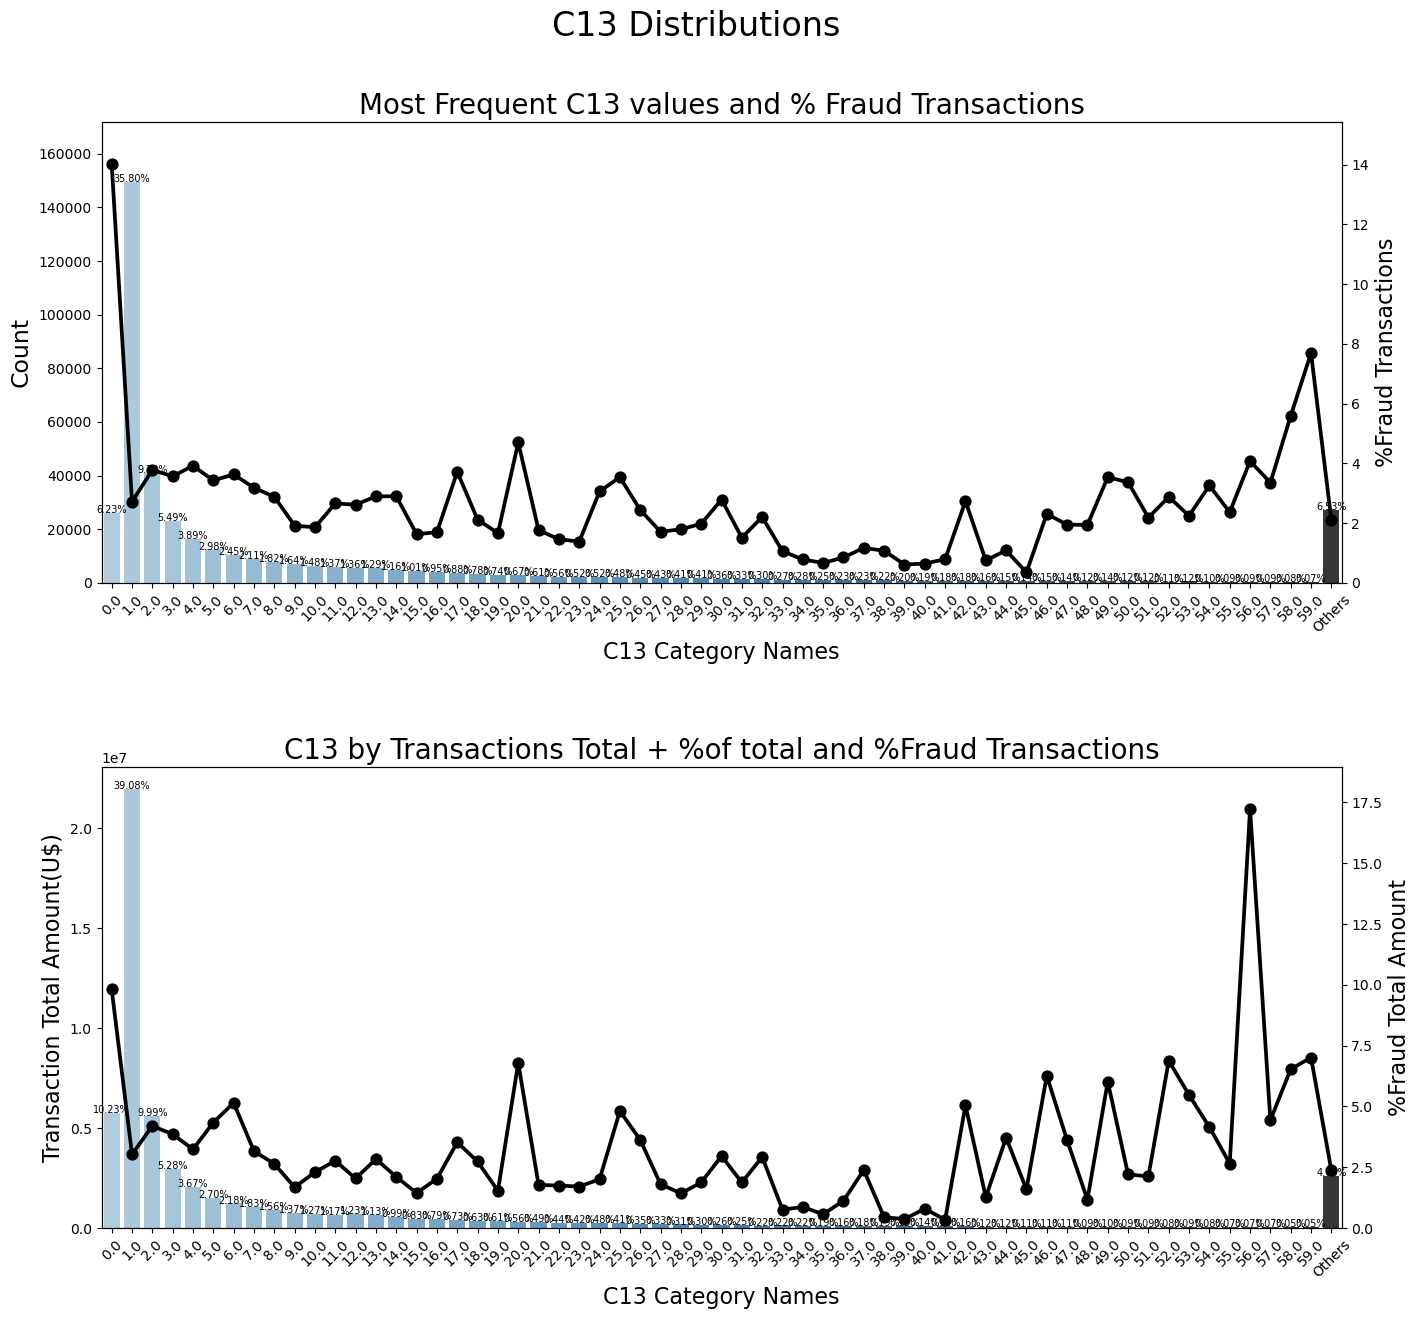

In [108]:
plot_cfmv(df_train, 'C13')

## TransactionDT

In [81]:
import datetime

START_DATE = '2017-12-01'
startdate = datetime.datetime.strptime(START_DATE, "%Y-%m-%d")
df_train["Date"] = df_train['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds=x)))

df_train['Weekdays'] = df_train['Date'].dt.dayofweek
df_train['Hours'] = df_train['Date'].dt.hour
df_train['Days'] = df_train['Date'].dt.day

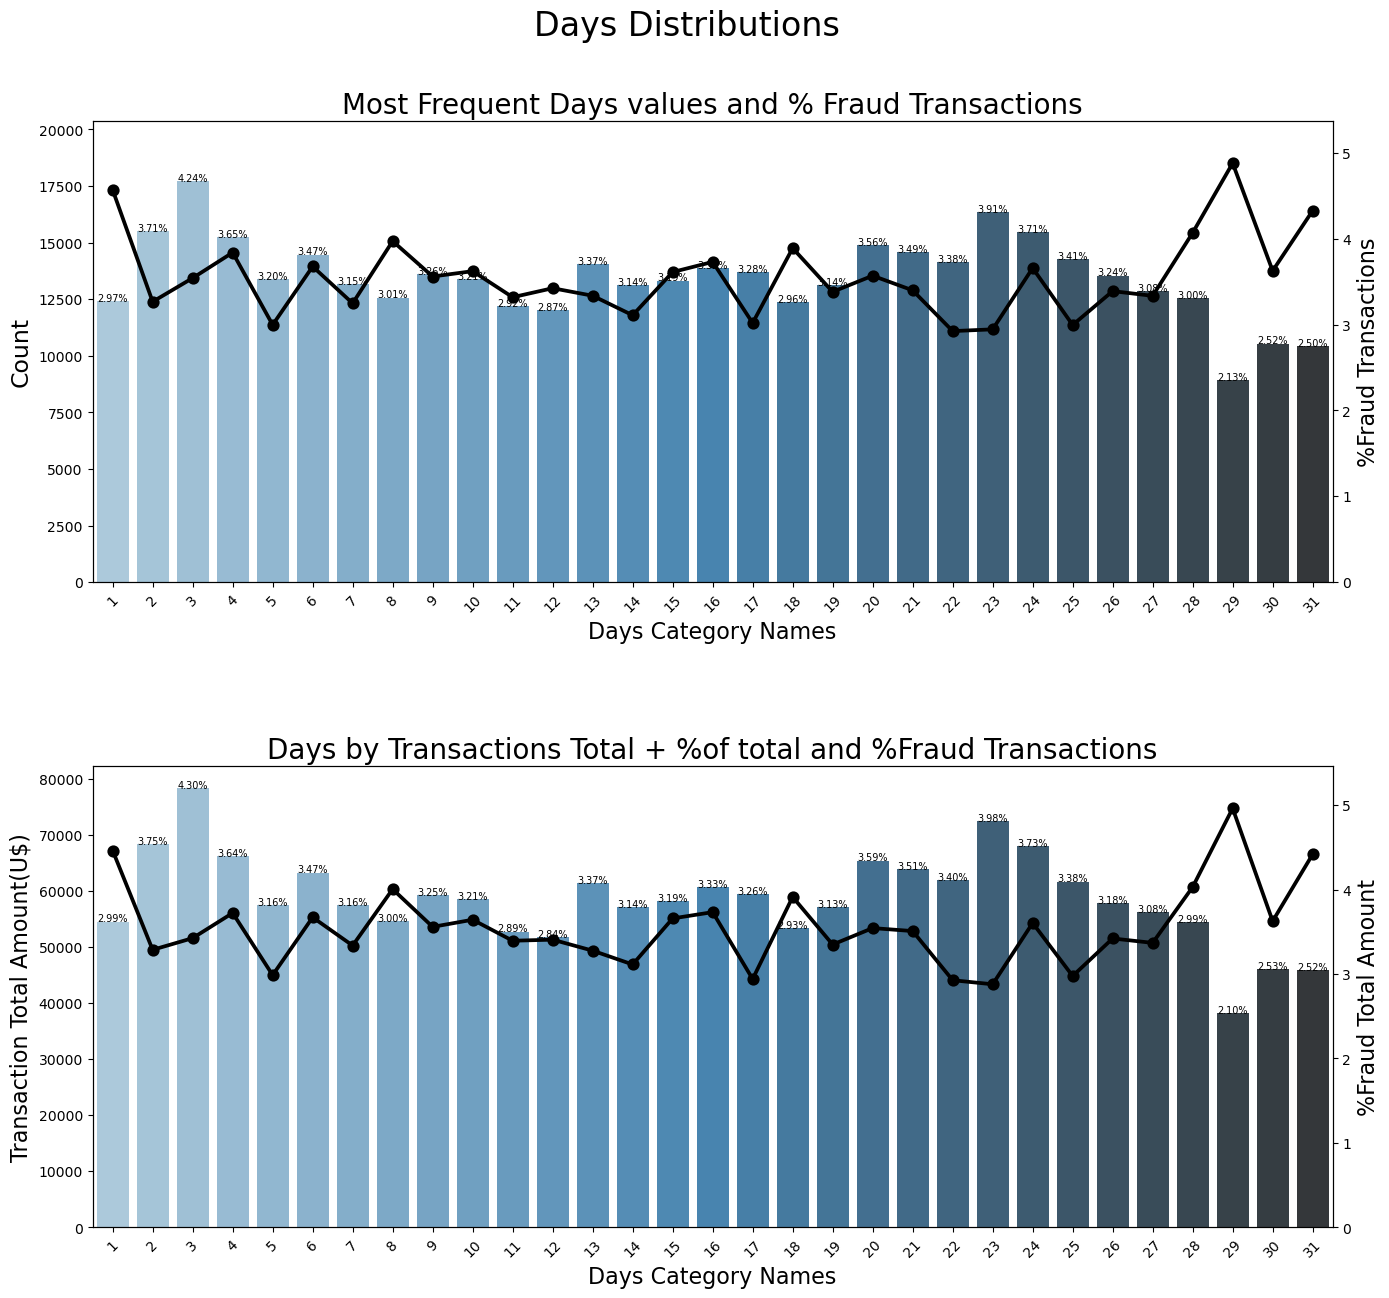

In [83]:
plot_cfmv(df_train, 'Days')

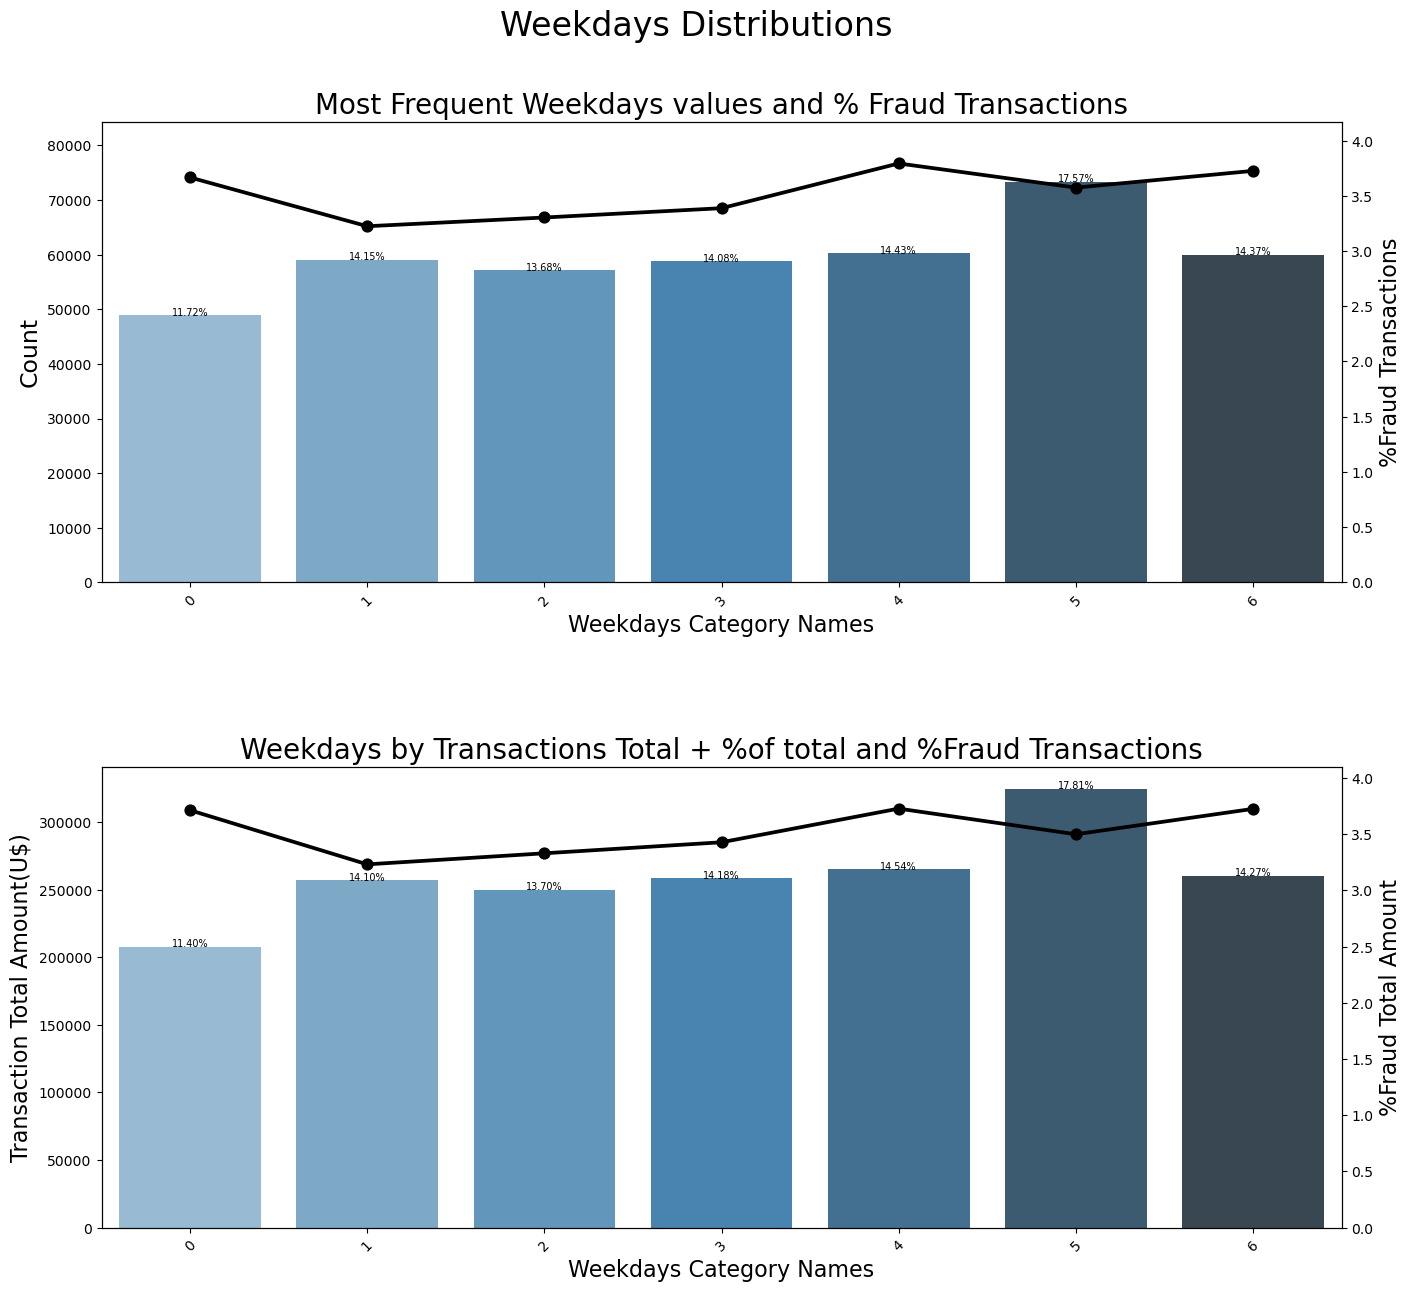

In [85]:
plot_cfmv(df_train, 'Weekdays')

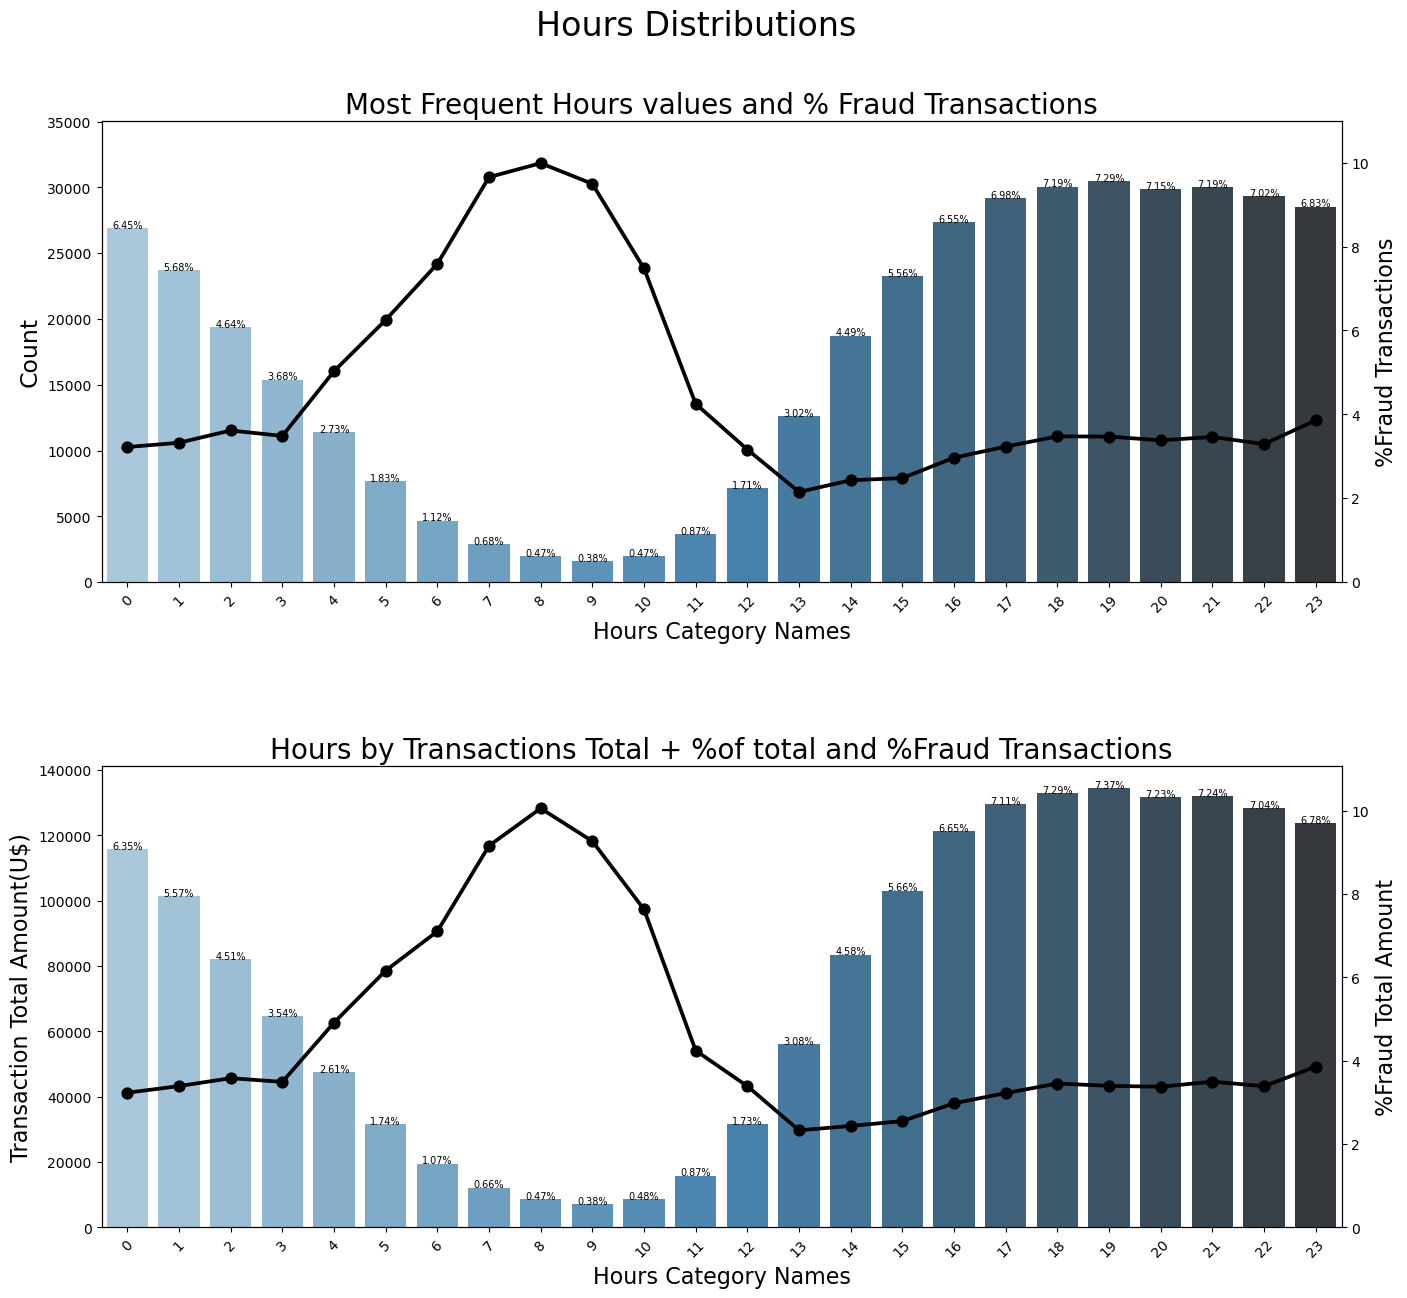

In [87]:
plot_cfmv(df_train, 'Hours')

- График с количеством транзакций по часам выглядит наиболее интересно. Видно, что наибольшая доля фрод транзакций преобладает с 4 до 12 часов. При этом доля всех транзакций в это время не слишком высокая.

## id_01 - id_38

In [205]:
resumetable(df_train[['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11']])

Dataset Shape: (417559, 11)


Name   dtypes  Missing  Uniques  First Value  Second Value  Third Value  \
0   id_01  float64   306893       69          NaN           NaN          NaN   
1   id_02  float64   309399    92210          NaN           NaN          NaN   
2   id_03  float64   368059       23          NaN           NaN          NaN   
3   id_04  float64   368059       15          NaN           NaN          NaN   
4   id_05  float64   312260       89          NaN           NaN          NaN   
5   id_06  float64   312260      100          NaN           NaN          NaN   
6   id_07  float64   413614       81          NaN           NaN          NaN   
7   id_08  float64   413614       93          NaN           NaN          NaN   
8   id_09  float64   361005       40          NaN           NaN          NaN   
9   id_10  float64   361005       58          NaN           NaN          NaN   
10  id_11  float64   309286      344          NaN           NaN          NaN   

    Entropy  
0      2.23  
1     16.41  
2      0.33  
3      0.10  
4      2.36  
5      2.57  
6      5.37  
7      5.72  
8      0.53  
9      0.31  
10     0.68

In [207]:
cols = ['id_01', 'id_02', 'id_03',
        'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09',
        'id_10', 'id_11']
df_train[cols].describe()

id_01          id_02         id_03         id_04  \
count  110666.000000  108160.000000  49500.000000  49500.000000   
mean       -9.842291  167481.837047      0.066848     -0.055596   
std        14.249392  149605.267904      0.589575      0.676316   
min      -100.000000      30.000000    -12.000000    -28.000000   
25%       -10.000000   69130.750000      0.000000      0.000000   
50%        -5.000000  122122.000000      0.000000      0.000000   
75%        -5.000000  215133.750000      0.000000      0.000000   
max         0.000000  999595.000000     10.000000      0.000000   

               id_05          id_06        id_07        id_08        id_09  \
count  105299.000000  105299.000000  3945.000000  3945.000000  56554.00000   
mean        1.754034      -6.582437    13.969582   -38.919138      0.10719   
std         5.284671      16.491670    11.318059    26.020837      0.94671   
min       -72.000000    -100.000000   -46.000000  -100.000000    -36.00000   
25%         0.000000      -5.000000     5.000000   -49.000000      0.00000   
50%         0.000000       0.000000    14.000000   -34.000000      0.00000   
75%         1.000000       0.000000    22.000000   -23.000000      0.00000   
max        52.000000       0.000000    61.000000     0.000000     25.00000   

              id_10          id_11  
count  56554.000000  108273.000000  
mean      -0.311119      99.729365  
std        2.829386       1.158113  
min     -100.000000      90.000000  
25%        0.000000     100.000000  
50%        0.000000     100.000000  
75%        0.000000     100.000000  
max        0.000000     100.000000

In [211]:
resumetable(df_train[['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18',
       'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25',
       'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32',
       'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']])

Dataset Shape: (417559, 27)


Name   dtypes  Missing  Uniques First Value Second Value Third Value  \
0   id_12   object   306893        2         NaN          NaN         NaN   
1   id_13  float64   321449       51         NaN          NaN         NaN   
2   id_14  float64   353487       25         NaN          NaN         NaN   
3   id_15   object   309286        3         NaN          NaN         NaN   
4   id_16   object   317969        2         NaN          NaN         NaN   
5   id_17  float64   310300      101         NaN          NaN         NaN   
6   id_18  float64   383290       18         NaN          NaN         NaN   
7   id_19  float64   310333      504         NaN          NaN         NaN   
8   id_20  float64   310350      365         NaN          NaN         NaN   
9   id_21  float64   413609      421         NaN          NaN         NaN   
10  id_22  float64   413605       23         NaN          NaN         NaN   
11  id_23   object   413605        3         NaN          NaN         NaN   
12  id_24  float64   413935       10         NaN          NaN         NaN   
13  id_25  float64   413629      307         NaN          NaN         NaN   
14  id_26  float64   413611       85         NaN          NaN         NaN   
15  id_27   object   413605        2         NaN          NaN         NaN   
16  id_28   object   309286        2         NaN          NaN         NaN   
17  id_29   object   309286        2         NaN          NaN         NaN   
18  id_30   object   355463       71         NaN          NaN         NaN   
19  id_31   object   309598      110         NaN          NaN         NaN   
20  id_32  float64   355443        4         NaN          NaN         NaN   
21  id_33   object   359740      183         NaN          NaN         NaN   
22  id_34   object   355391        4         NaN          NaN         NaN   
23  id_35   object   309286        2         NaN          NaN         NaN   
24  id_36   object   309286        2         NaN          NaN         NaN   
25  id_37   object   309286        2         NaN          NaN         NaN   
26  id_38   object   309286        2         NaN          NaN         NaN   

    Entropy  
0      0.56  
1      2.37  
2      1.82  
3      1.32  
4      1.00  
5      1.26  
6      1.55  
7      5.43  
8      5.25  
9      4.62  
10     0.55  
11     1.24  
12     1.31  
13     4.45  
14     4.35  
15     0.02  
16     1.00  
17     1.00  
18     4.22  
19     4.35  
20     0.93  
21     4.20  
22     0.84  
23     0.98  
24     0.30  
25     0.76  
26     1.00

In [209]:
df_train[['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18',
       'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25',
       'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32',
       'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']].describe(include='all')

id_12         id_13         id_14   id_15     id_16          id_17  \
count     110666  96110.000000  64072.000000  108273     99590  107259.000000   
unique         2           NaN           NaN       3         2            NaN   
top     NotFound           NaN           NaN   Found  NotFound            NaN   
freq       96010           NaN           NaN   50788     50090            NaN   
mean         NaN     46.604620   -346.068485     NaN       NaN     187.936416   
std          NaN     10.796745     94.029575     NaN       NaN      30.118252   
min          NaN     10.000000   -660.000000     NaN       NaN     100.000000   
25%          NaN     49.000000   -360.000000     NaN       NaN     166.000000   
50%          NaN     52.000000   -300.000000     NaN       NaN     166.000000   
75%          NaN     52.000000   -300.000000     NaN       NaN     225.000000   
max          NaN     64.000000    720.000000     NaN       NaN     229.000000   

               id_18          id_19          id_20        id_21  ...   id_29  \
count   34269.000000  107226.000000  107209.000000  3950.000000  ...  108273   
unique           NaN            NaN            NaN          NaN  ...       2   
top              NaN            NaN            NaN          NaN  ...   Found   
freq             NaN            NaN            NaN          NaN  ...   56554   
mean       14.172547     352.299619     400.498661   371.863038  ...     NaN   
std         1.479054     140.265671     150.423924   200.186906  ...     NaN   
min        10.000000     100.000000     100.000000   100.000000  ...     NaN   
25%        13.000000     266.000000     256.000000   252.000000  ...     NaN   
50%        15.000000     341.000000     469.000000   252.000000  ...     NaN   
75%        15.000000     427.000000     521.000000   500.000000  ...     NaN   
max        29.000000     671.000000     661.000000   854.000000  ...     NaN   

             id_30        id_31         id_32      id_33           id_34  \
count        62096       107961  62116.000000      57819           62168   
unique          71          110           NaN        183               4   
top     Windows 10  chrome 63.0           NaN  1920x1080  match_status:2   
freq         16078        21821           NaN      13466           46931   
mean           NaN          NaN     26.635327        NaN             NaN   
std            NaN          NaN      3.787343        NaN             NaN   
min            NaN          NaN      0.000000        NaN             NaN   
25%            NaN          NaN     24.000000        NaN             NaN   
50%            NaN          NaN     24.000000        NaN             NaN   
75%            NaN          NaN     32.000000        NaN             NaN   
max            NaN          NaN     32.000000        NaN             NaN   

         id_35   id_36   id_37   id_38  
count   108273  108273  108273  108273  
unique       2       2       2       2  
top          T       F       T       T  
freq     62152  102536   84398   57779  
mean       NaN     NaN     NaN     NaN  
std        NaN     NaN     NaN     NaN  
min        NaN     NaN     NaN     NaN  
25%        NaN     NaN     NaN     NaN  
50%        NaN     NaN     NaN     NaN  
75%        NaN     NaN     NaN     NaN  
max        NaN     NaN     NaN     NaN  

[11 rows x 27 columns]

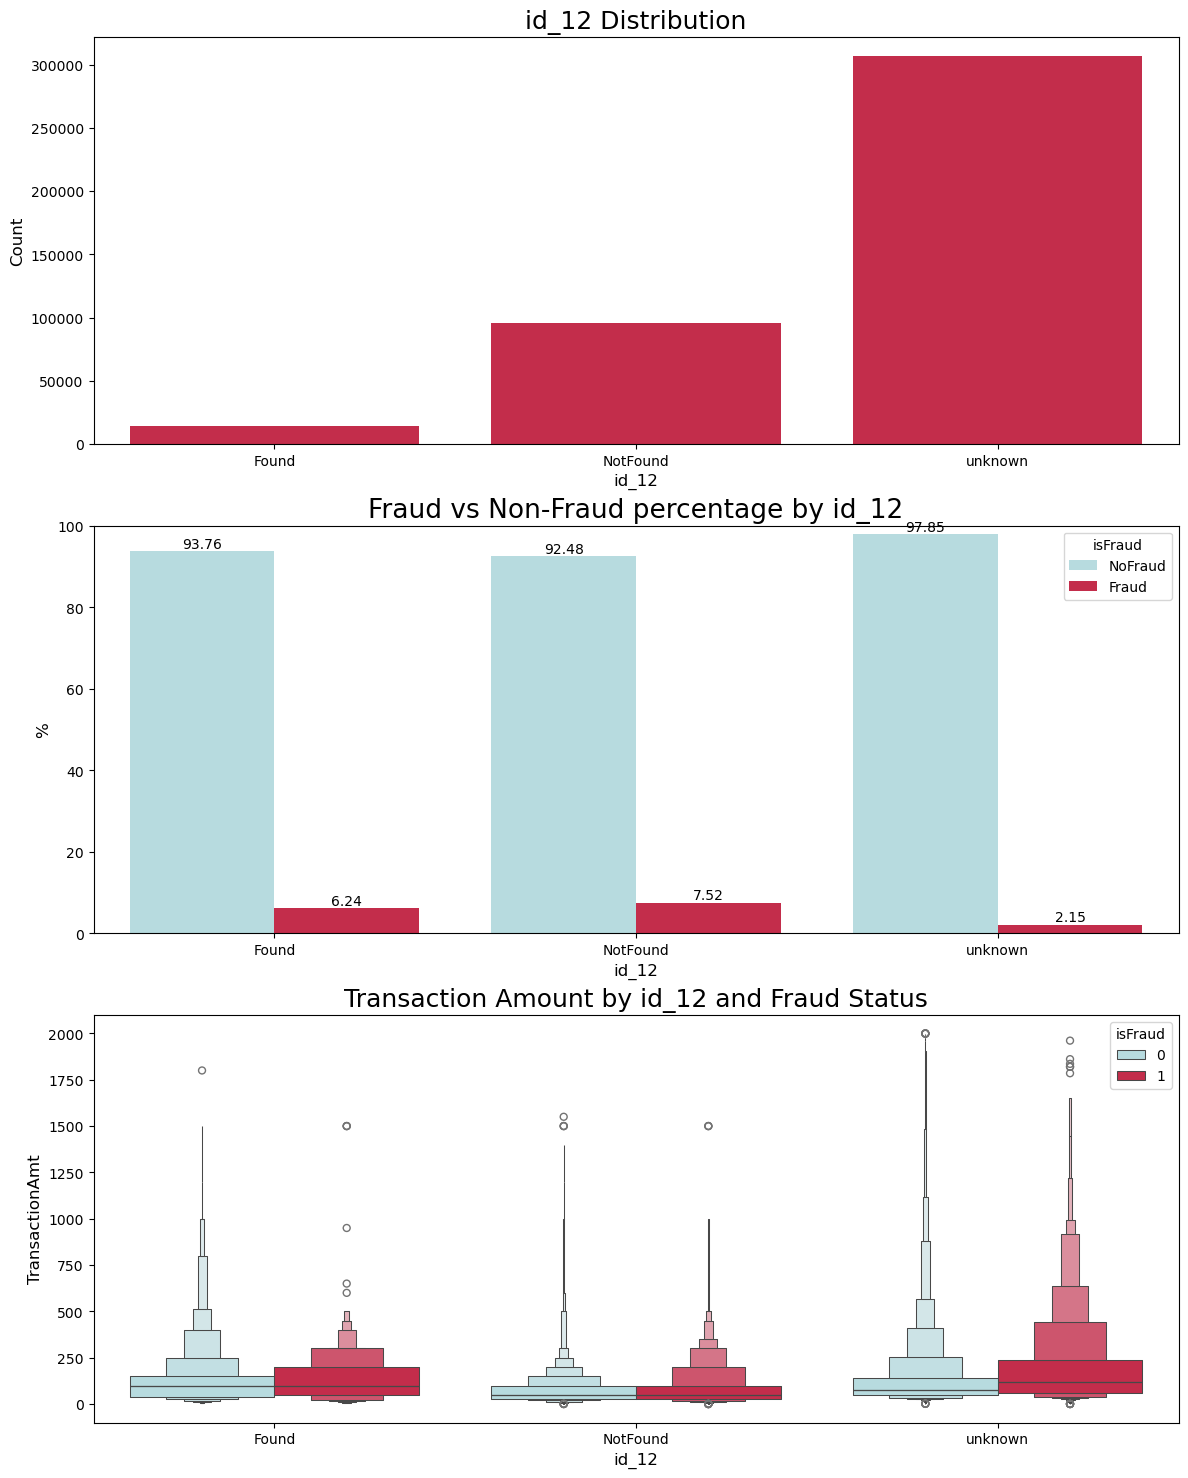

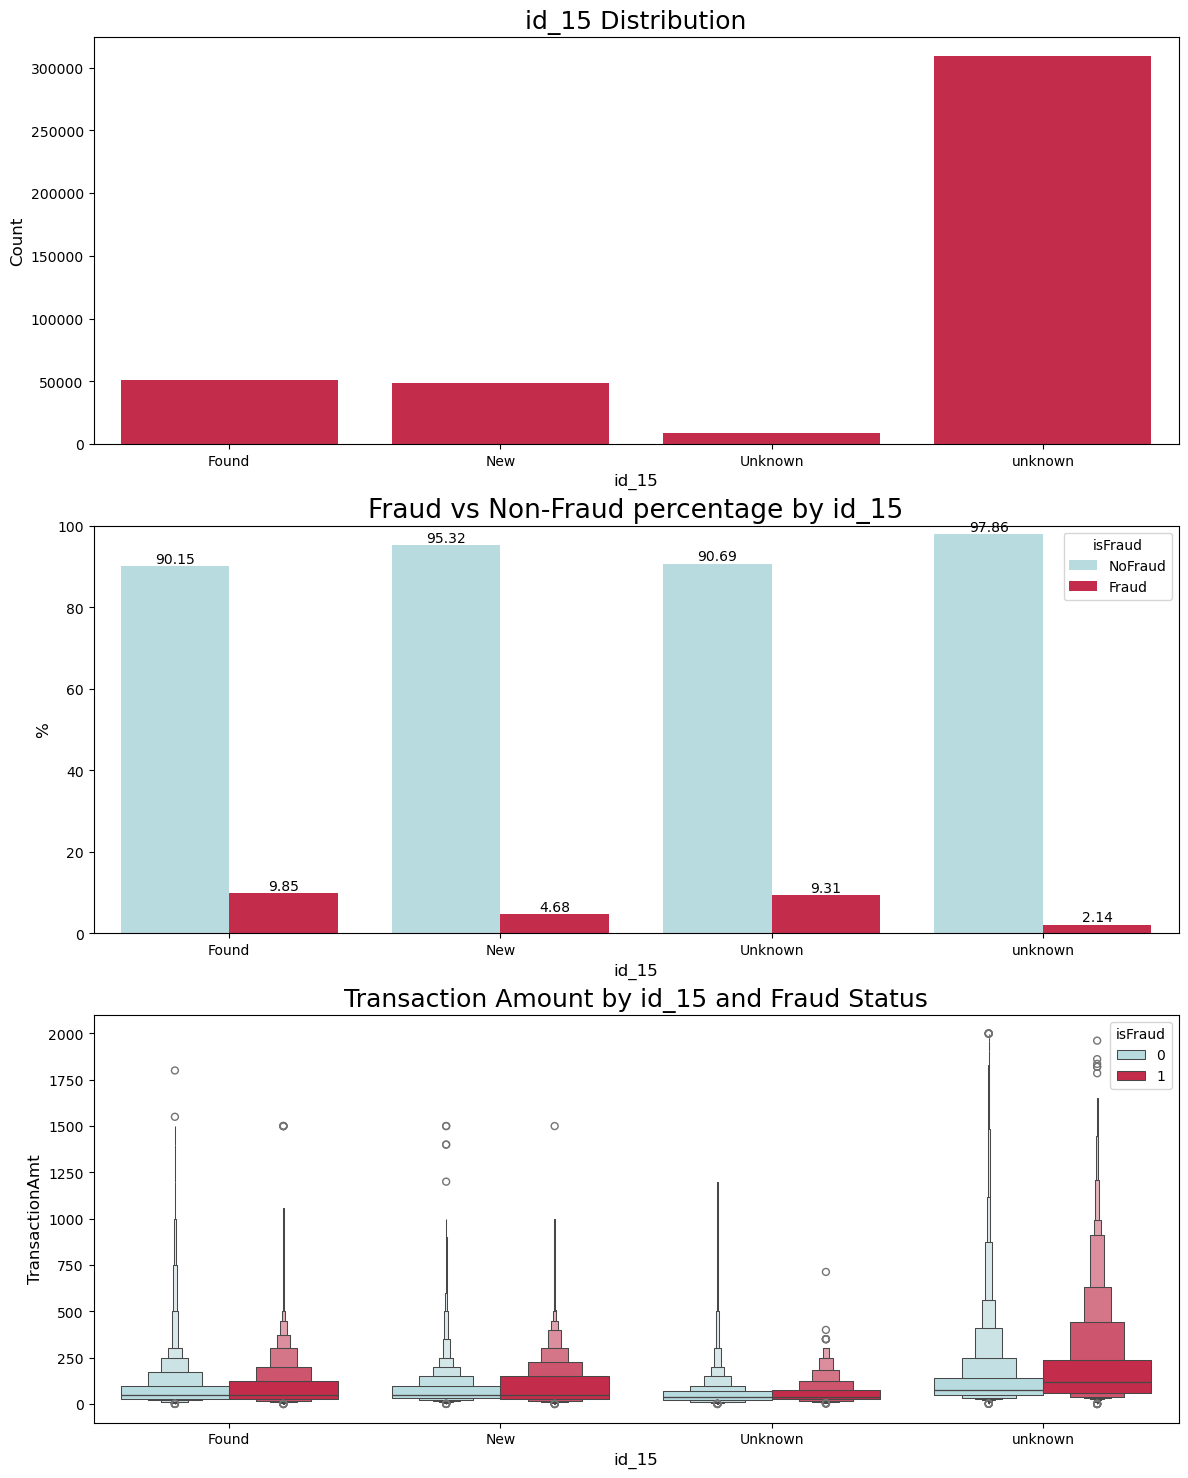

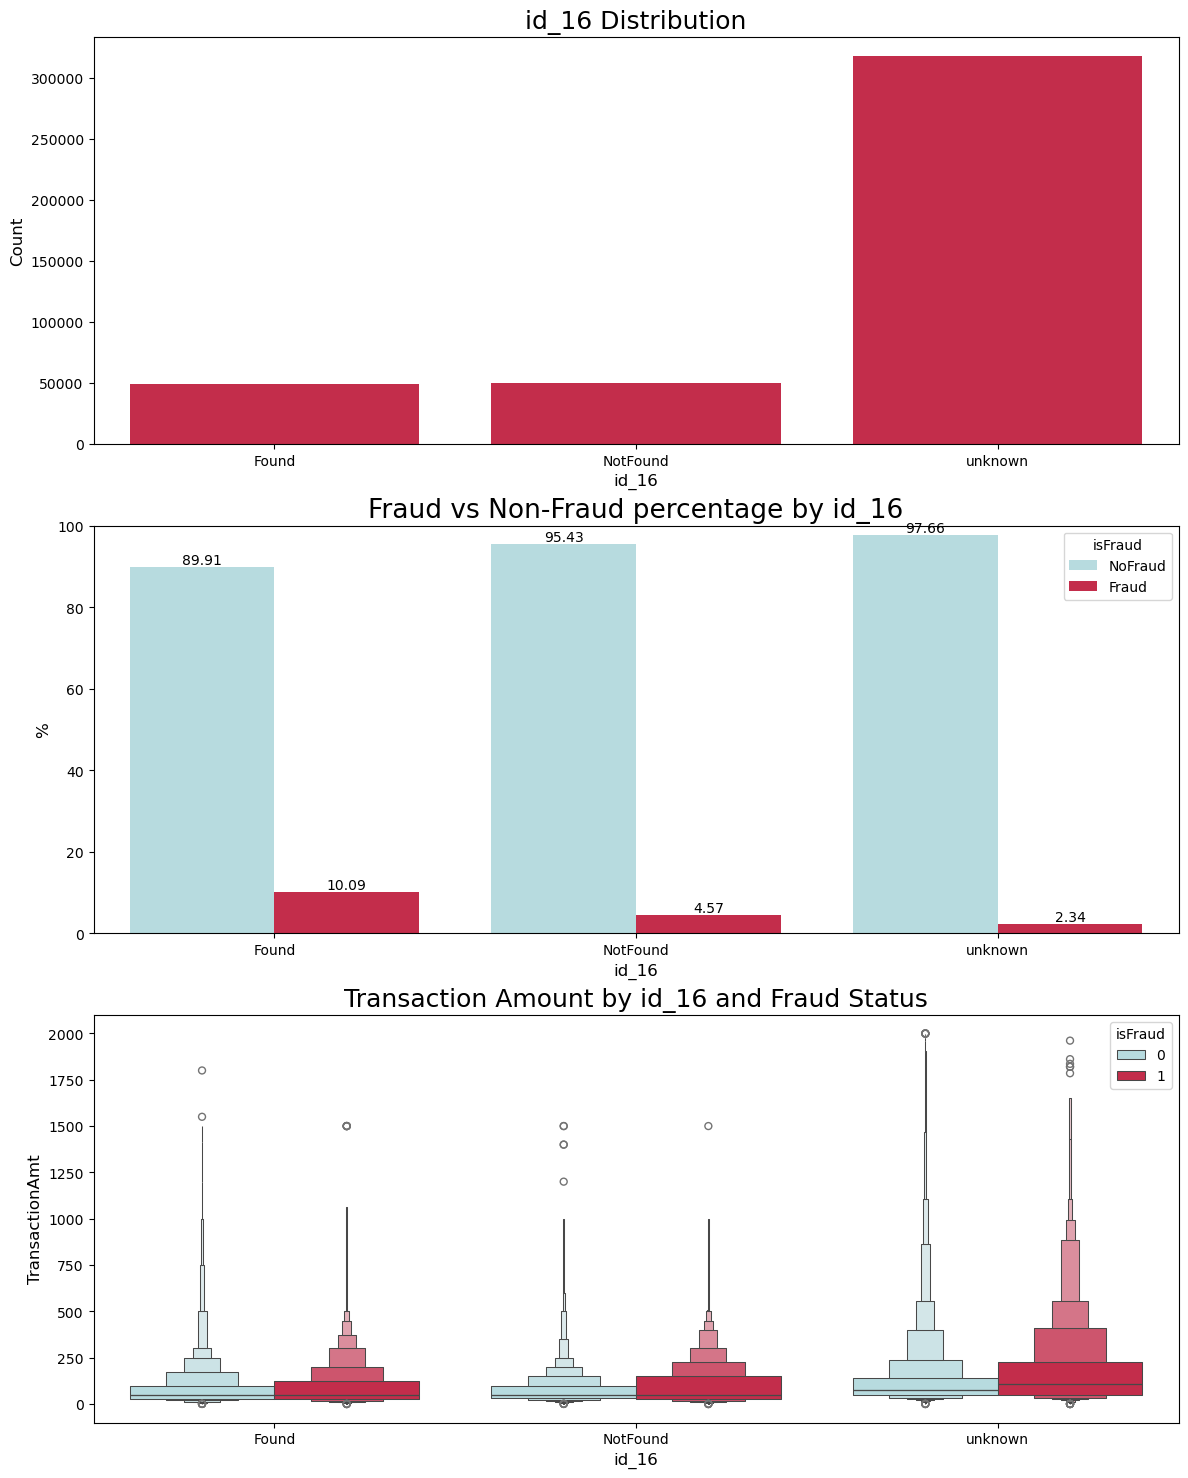

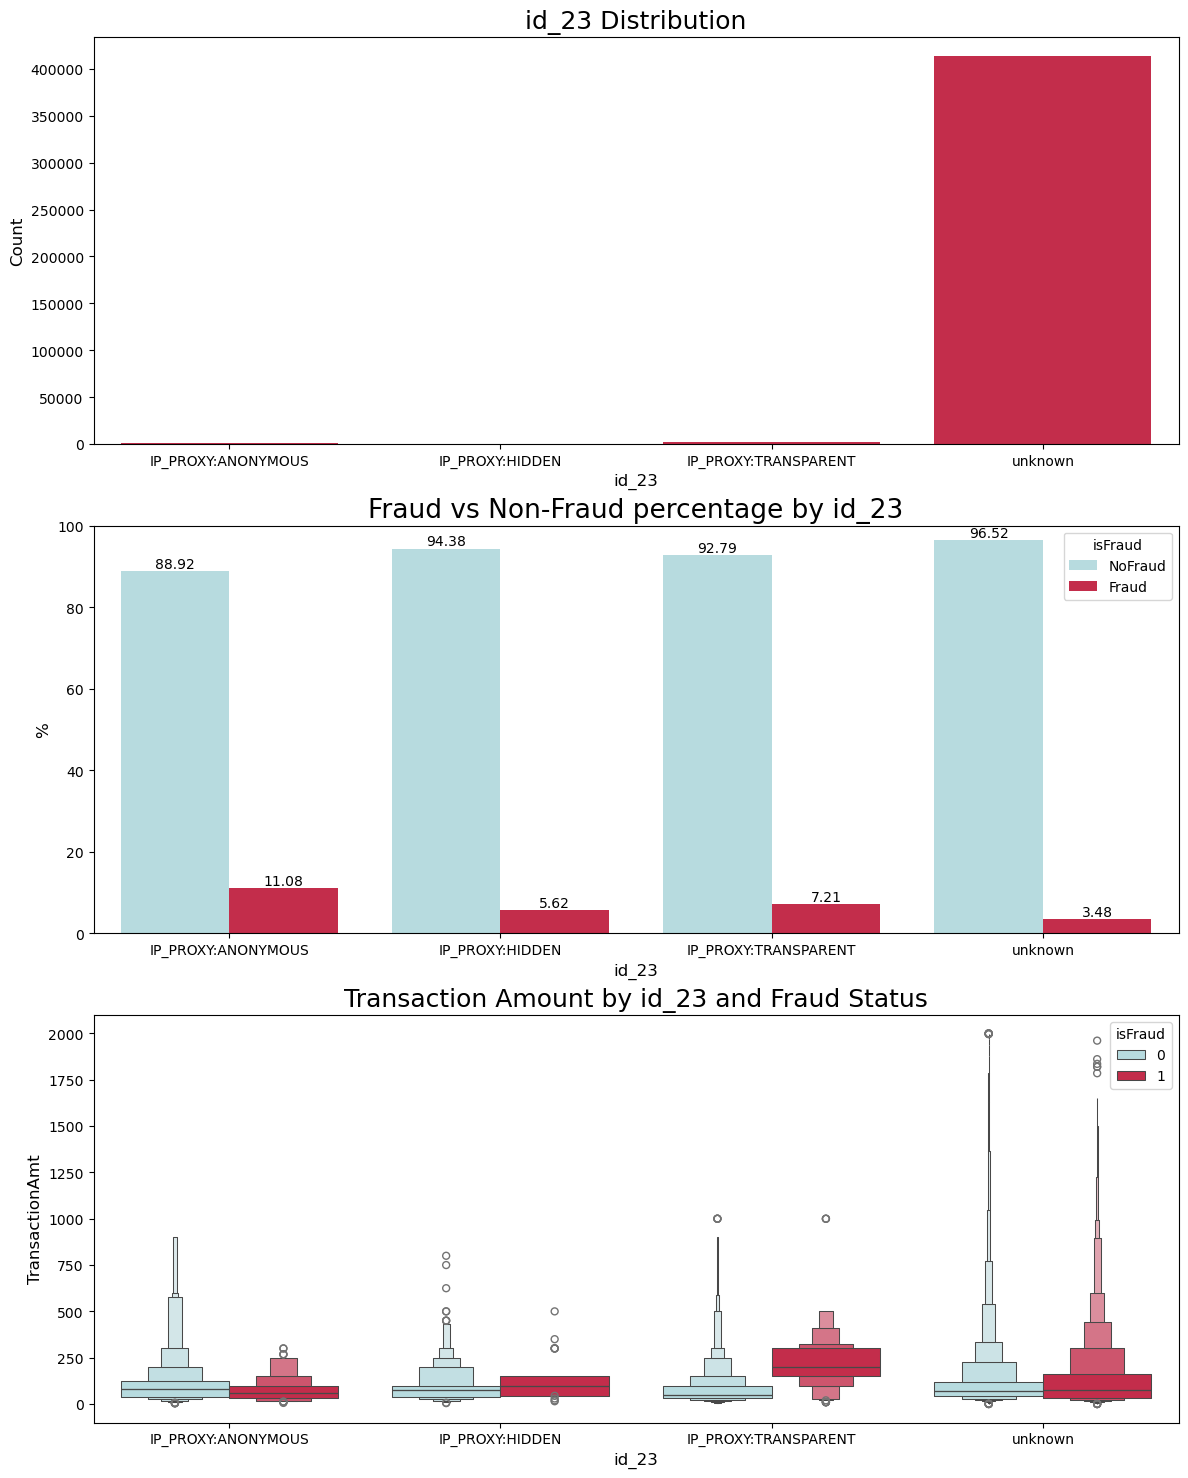

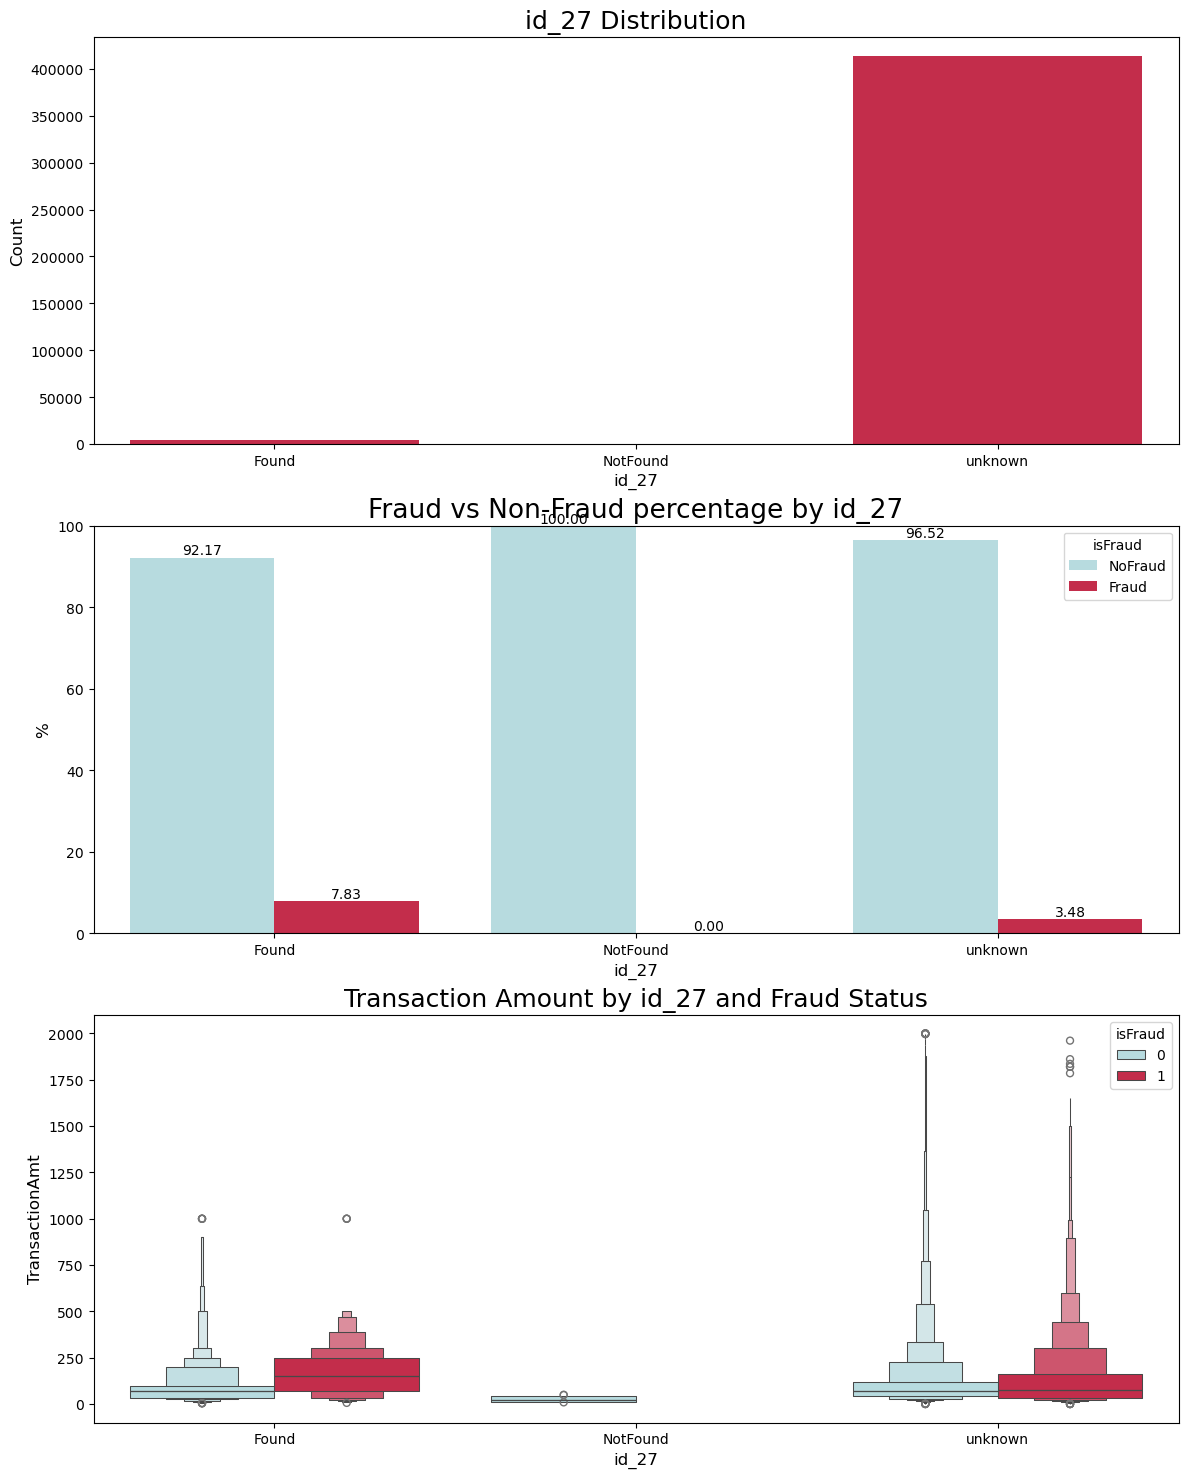

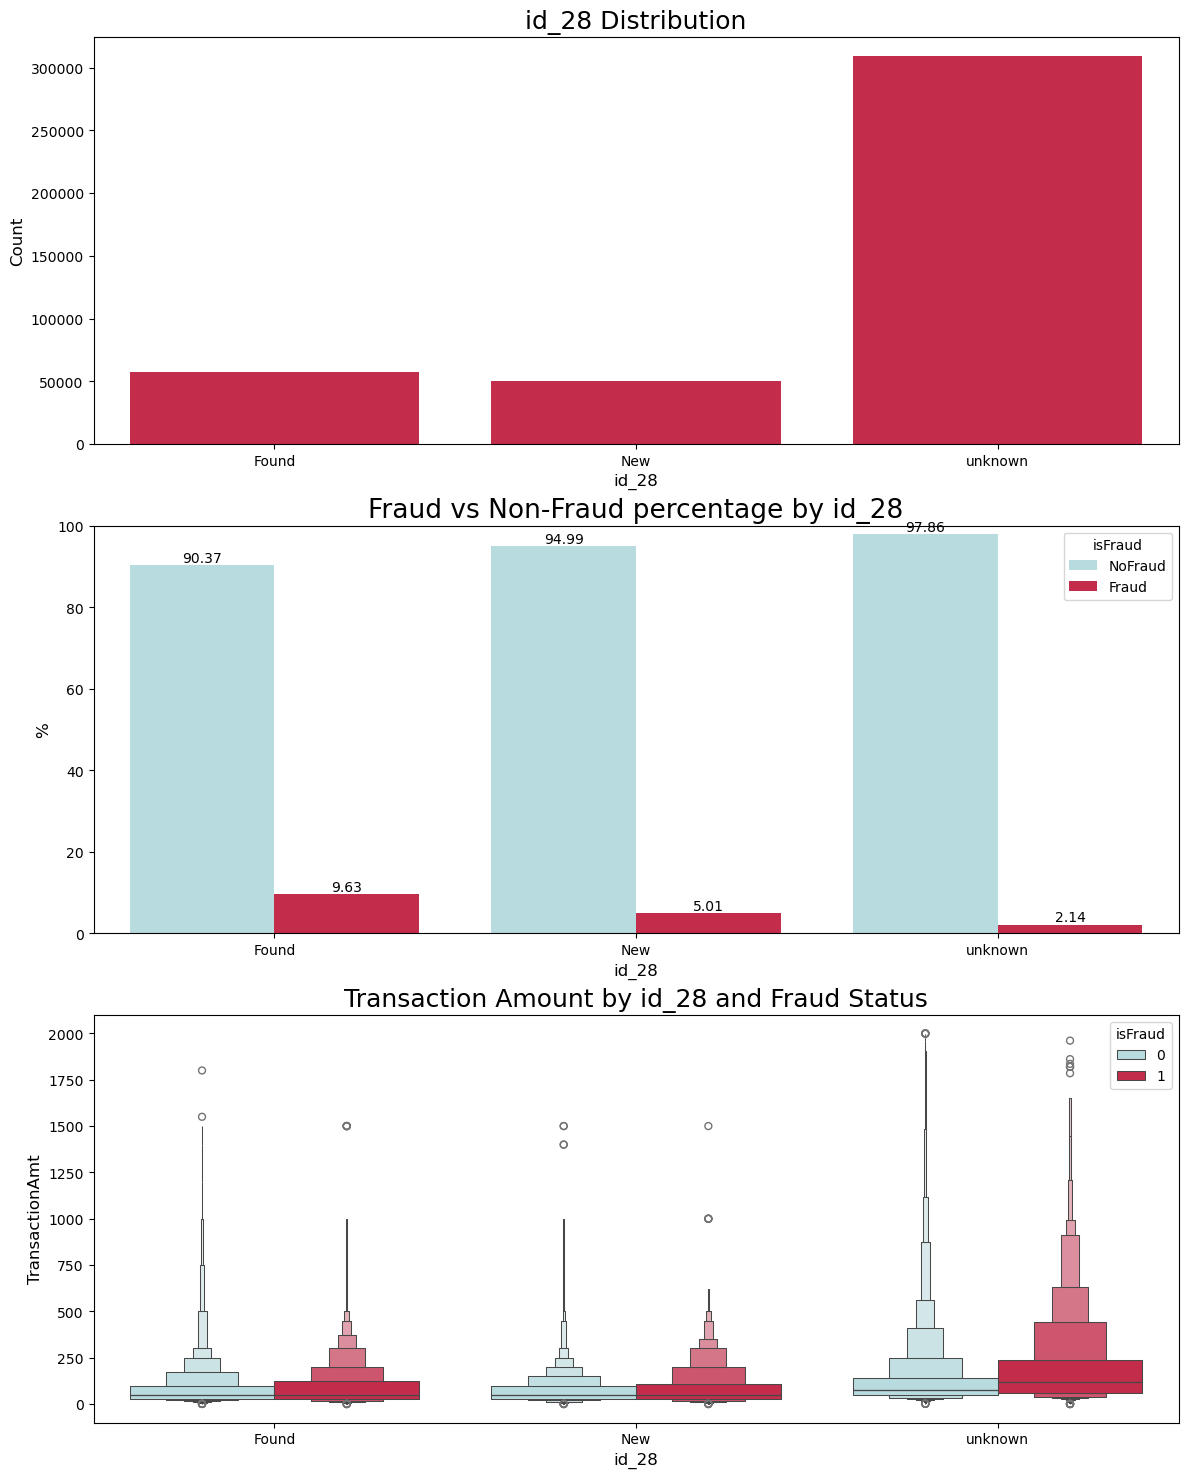

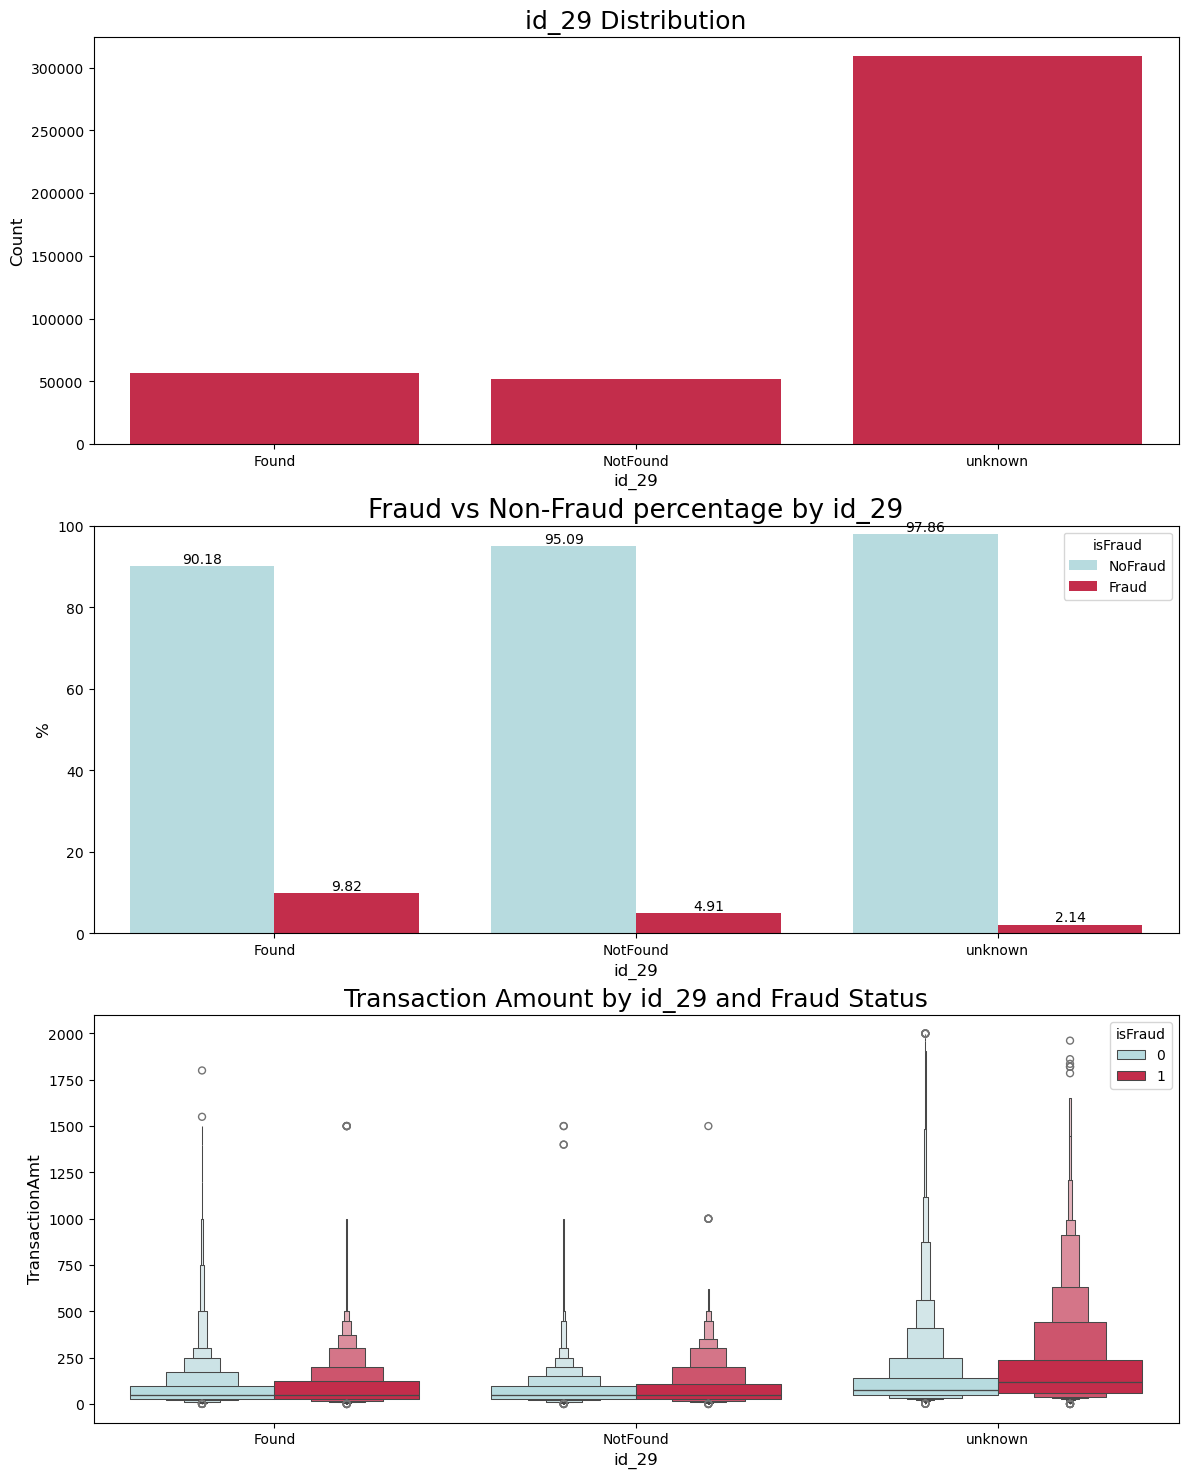

In [213]:
for col in ['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29']:
    df_train[col] = df_train[col].fillna('unknown')
    plot_cf(df_train, col)

In [215]:
df_train.loc[df_train['id_30'].str.contains('Windows', na=False), 'id_30'] = 'Windows'
df_train.loc[df_train['id_30'].str.contains('iOS', na=False), 'id_30'] = 'iOS'
df_train.loc[df_train['id_30'].str.contains('Mac OS', na=False), 'id_30'] = 'Mac'
df_train.loc[df_train['id_30'].str.contains('Android', na=False), 'id_30'] = 'Android'
df_train['id_30'].fillna("unknown", inplace=True)

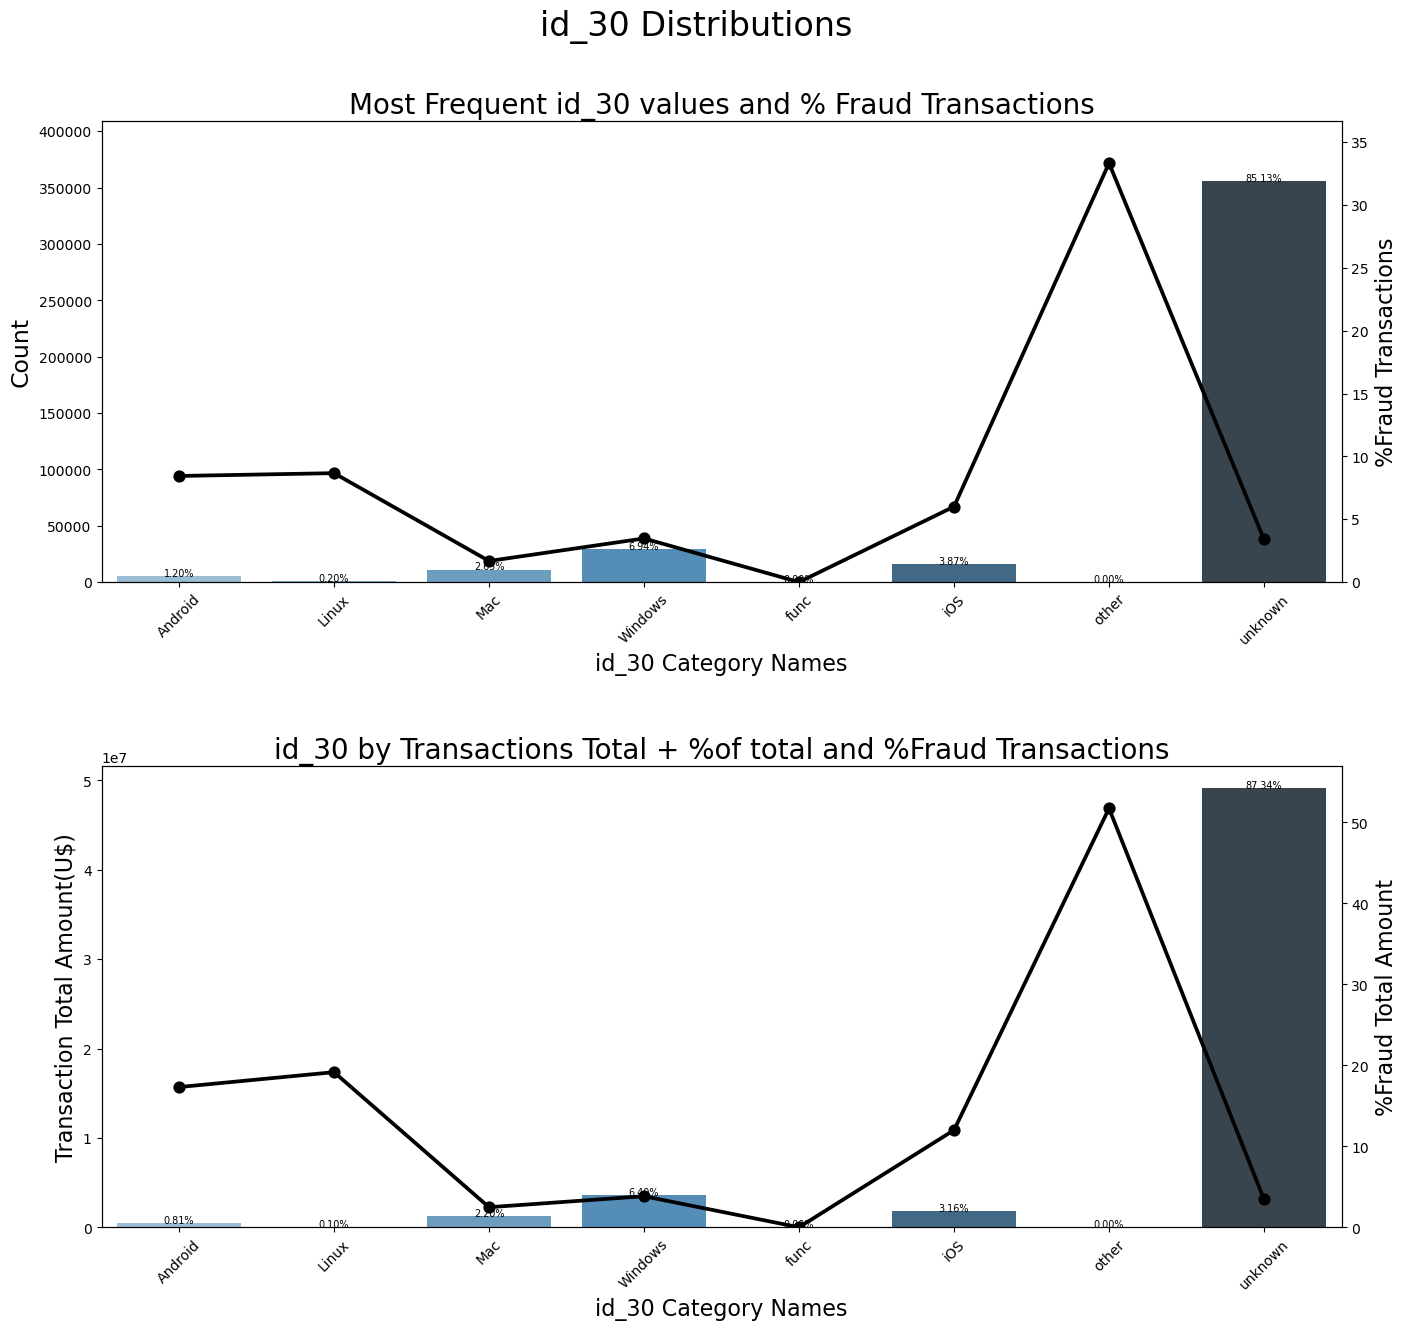

In [217]:
plot_cfmv(df_train, 'id_30')

In [219]:
df_train.loc[df_train['id_31'].str.contains('chrome', na=False), 'id_31'] = 'Chrome'
df_train.loc[df_train['id_31'].str.contains('firefox', na=False), 'id_31'] = 'Firefox'
df_train.loc[df_train['id_31'].str.contains('safari', na=False), 'id_31'] = 'Safari'
df_train.loc[df_train['id_31'].str.contains('edge', na=False), 'id_31'] = 'Edge'
df_train.loc[df_train['id_31'].str.contains('ie', na=False), 'id_31'] = 'IE'
df_train.loc[df_train['id_31'].str.contains('samsung', na=False), 'id_31'] = 'Samsung'
df_train.loc[df_train['id_31'].str.contains('opera', na=False), 'id_31'] = 'Opera'
df_train['id_31'].fillna("unknown", inplace=True)
df_train.loc[df_train.id_31.isin(df_train.id_31.value_counts()[df_train.id_31.value_counts() < 200].index), 'id_31'] = "Others"

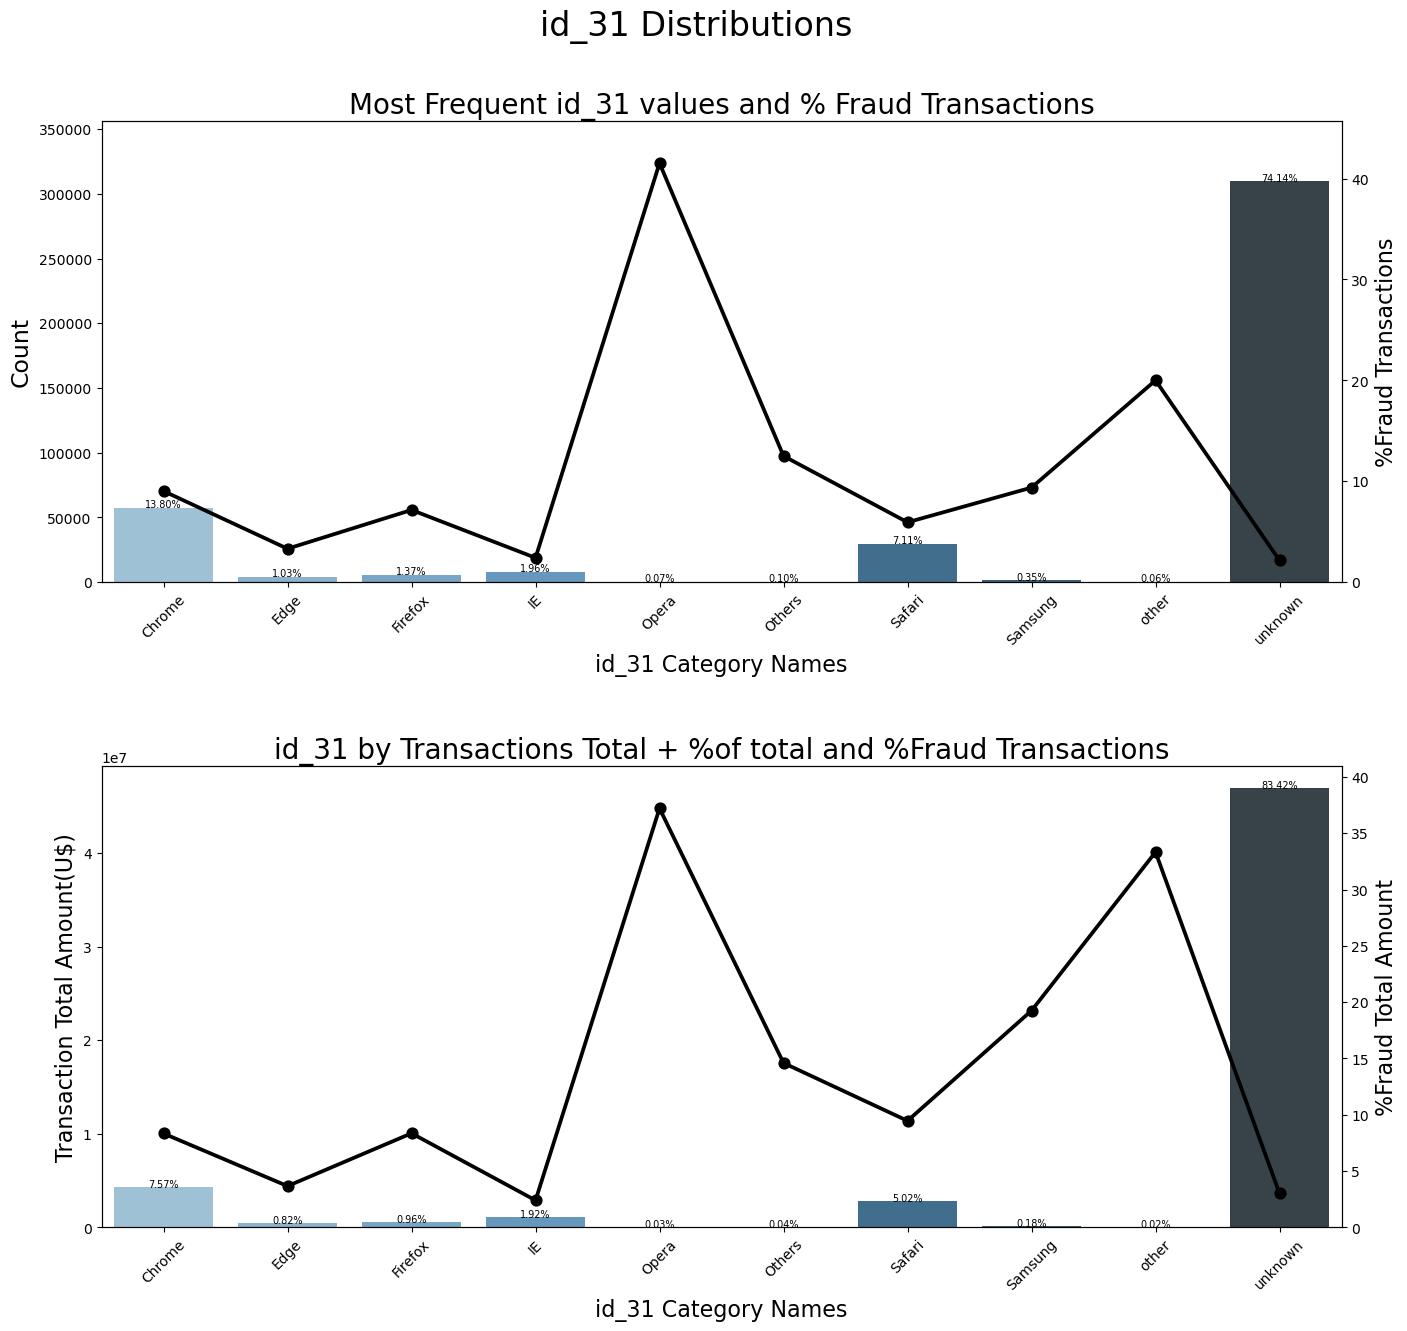

In [221]:
plot_cfmv(df_train, 'id_31')

### DeviceType - DeviceInfo

In [115]:
resumetable(df_train[['DeviceType', 'DeviceInfo']])

Dataset Shape: (417559, 2)


Name  dtypes  Missing  ...  Second Value Third Value Entropy
0  DeviceType  object   309435  ...           NaN         NaN    0.96
1  DeviceInfo  object   325600  ...           NaN         NaN    4.20

[2 rows x 8 columns]

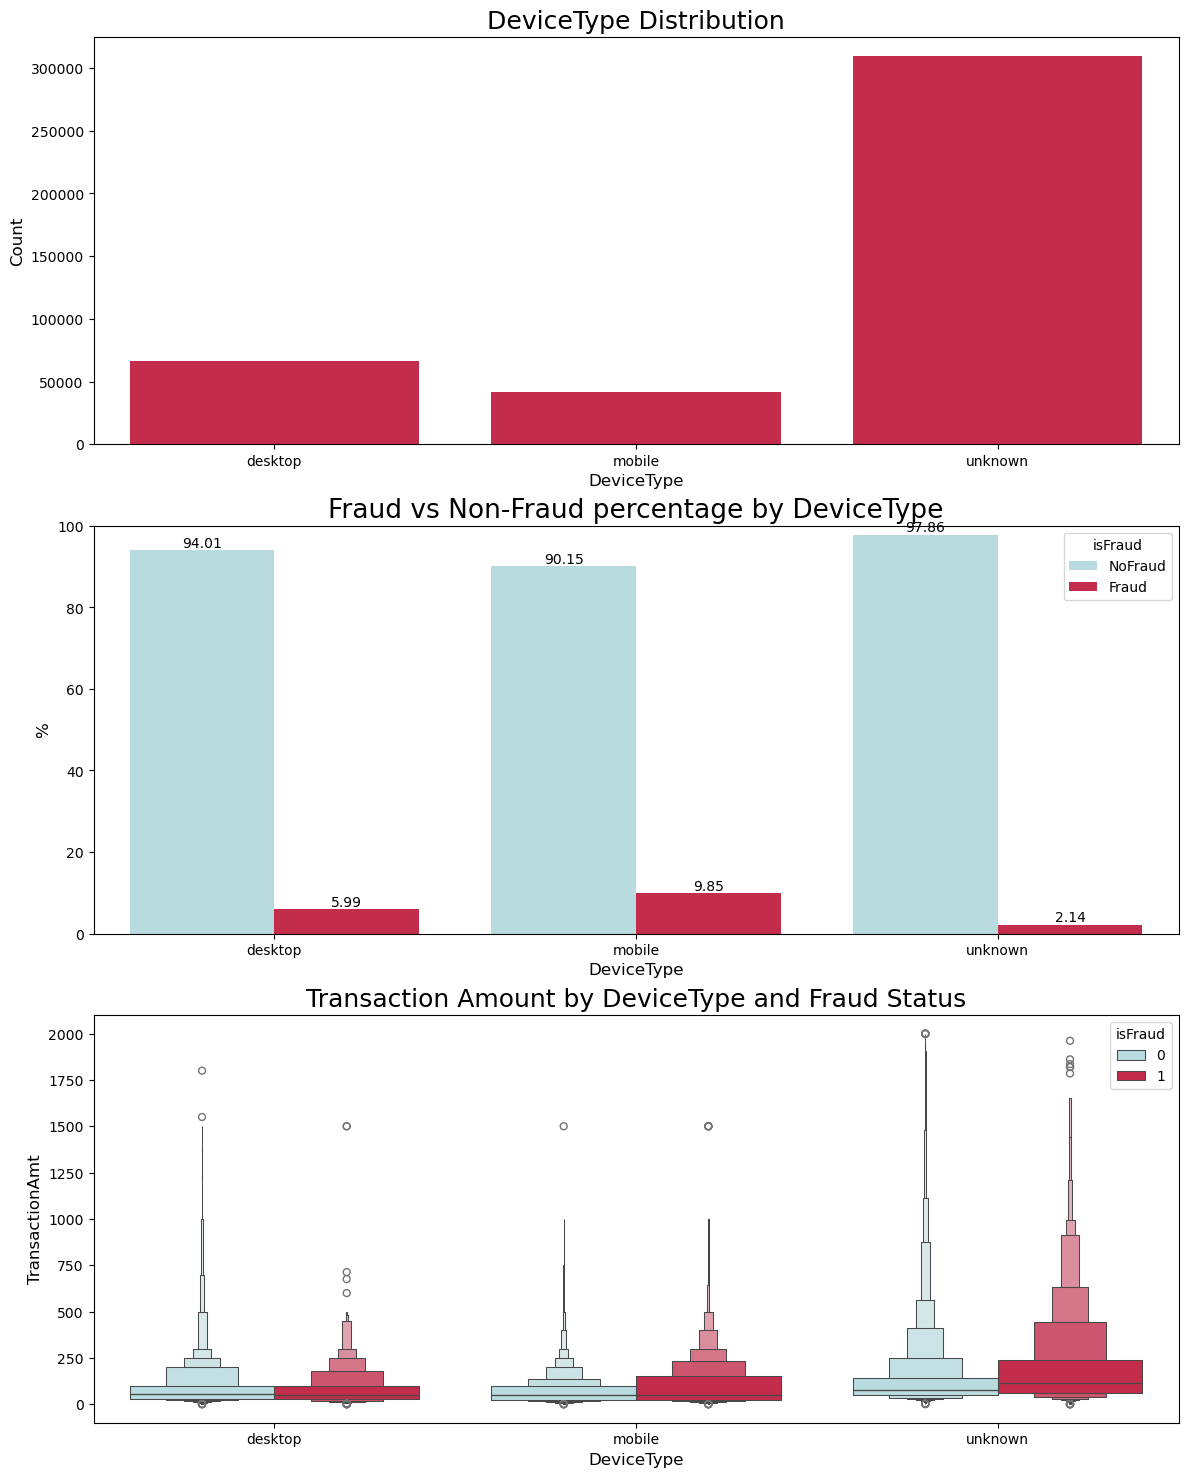

In [119]:
fill_mc_values(df_train, ['DeviceType'])
plot_cf(df_train, 'DeviceType')

In [121]:
df_train.loc[df_train.DeviceInfo.isin(df_train.DeviceInfo.value_counts()[df_train.DeviceInfo.value_counts() <= 400 ].index), 'DeviceInfo'] = "Others"

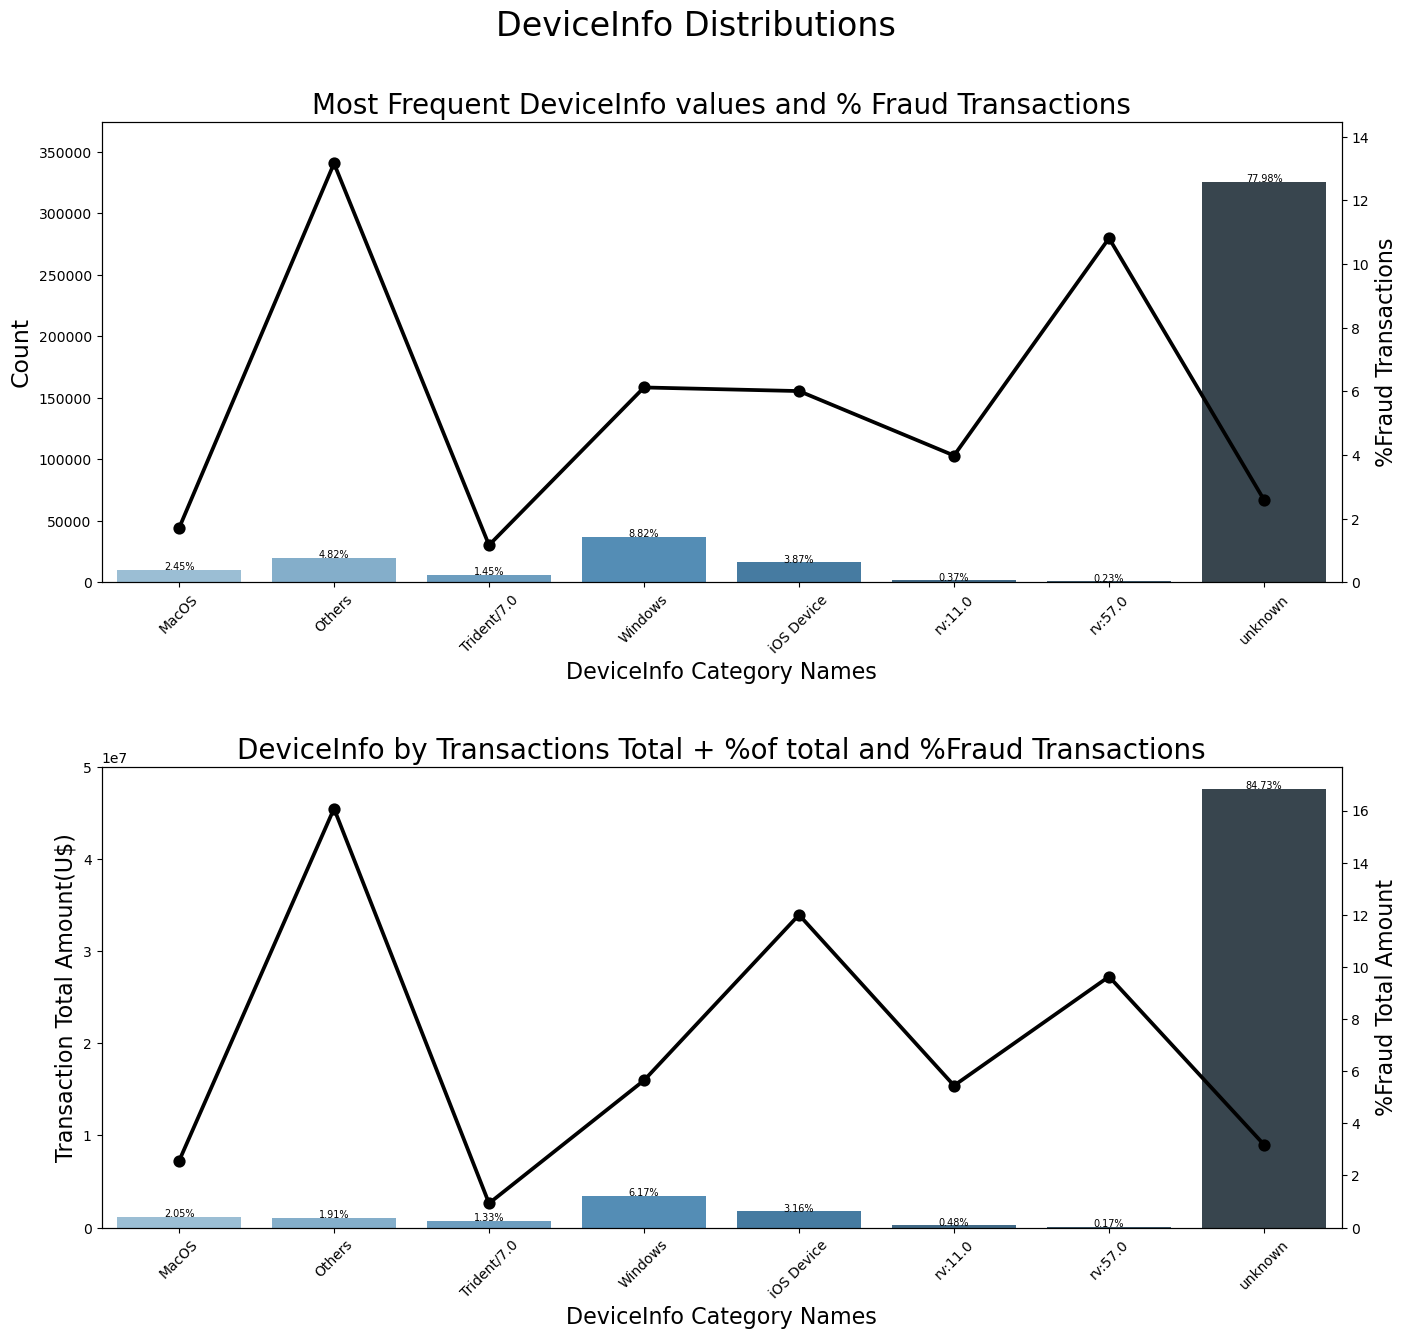

In [123]:
fill_mc_values(df_train, ['DeviceInfo'])
plot_cfmv(df_train, 'DeviceInfo')

## Обработка данных

In [1]:
from catboost import CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GroupKFold
import optuna
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

from hw_7_functions import reduce_mem_usage, resumetable, CalcOutliers, plot_cf, plot_cfmv, plot_card_1235, fill_mc_values, fill_mn_values

filterwarnings('ignore')

In [2]:
train_transaction = pd.read_csv('train_transaction.csv')
train_identity = pd.read_csv('train_identity.csv')
test_transaction = pd.read_csv('test_transaction.csv')
test_identity = pd.read_csv('test_identity.csv')
sample_submission = pd.read_csv('sample_submission.csv')

df_train = train_transaction.merge(train_identity, how='left', on='TransactionID')

df_test = test_transaction.merge(test_identity, how='left', on='TransactionID')

### Дубликаты

In [4]:
mask = df_train.duplicated()
da = mask.sum()
print(f'Количество дубликатов в данных: {da}')

Количество дубликатов в данных: 0


Дубликаты в данных отсутствуют

### Добавление признаков из бейзлайна

In [7]:
cat_cols = [
    'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2',
    'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9',
    'DeviceType', 'DeviceInfo','id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18',
    'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25','id_26', 'id_27', 'id_28',
    'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']

num_cols = list(set(df_train.drop(columns = ['TransactionID', 'isFraud', 'TransactionDT']).columns.values) - set(cat_cols))

In [8]:
df_train['card3_card5'] = df_train['card3'].astype(str) + '_' + df_train['card5'].astype(str)
df_test['card3_card5'] = df_test['card3'].astype(str) + '_' + df_test['card5'].astype(str)
df_train[['card3', 'card5', 'card3_card5']].head(10)

cat_cols.append('card3_card5')

In [9]:
for col in ['card1', 'card2']:
    card_freq = df_train[col].value_counts().to_dict()
    df_train['{}_cnt'.format(col)] = df_train[col].map(card_freq)
    df_test['{}_cnt'.format(col)] = df_test[col].map(card_freq)
    num_cols.append('{}_cnt'.format(col))

In [10]:
df_train['TransactionAmt_Cents'] = np.modf(df_train['TransactionAmt'])[0] * 100
df_test['TransactionAmt_Cents'] = np.modf(df_test['TransactionAmt'])[0] * 100
num_cols.append('TransactionAmt_Cents')

In [11]:
df_train['same_emaildomain'] = (df_train['P_emaildomain'] == df_train['R_emaildomain']).astype('int32')
df_test['same_emaildomain'] = (df_test['P_emaildomain'] == df_test['R_emaildomain']).astype('int32')
num_cols.append('same_emaildomain')

In [13]:
for col in ['card1', 'card2']:
    for agg_type in ['mean', 'median', 'min', 'max']:
        agg_col_name = 'TransactionAmt_{}_{}'.format(col, agg_type)
        card_agg = df_train.groupby(col)['TransactionAmt'].agg([agg_type]).rename({agg_type: agg_col_name}, axis=1)
        df_train = df_train.merge(card_agg, how='left', on=col)
        df_test = df_test.merge(card_agg, how='left', on=col)
        num_cols.append(agg_col_name)

### N/A

Как можно было заметить, в данных довольно много пропусков. Однако эти пропуски в какой-то мере значимы для классификации, если судить по анализу. Поэтому лучше бы оставить эти значения, а не удалять их из данных. 

Для категориальных данных заполним `np.nan` значениями `'unknown'`

In [17]:
fill_mc_values(df_train, cat_cols)

In [18]:
fill_mc_values(df_test, cat_cols)

In [19]:
#resumetable(df_train[cat_cols])

Для числовых переменных заполним `np.nan` значениями `-999`

In [21]:
fill_mn_values(df_train, num_cols)

In [22]:
fill_mn_values(df_test, num_cols)

### Преобразование email

In [24]:
df_train.loc[df_train['R_emaildomain'].isin(['gmail.com', 'gmail']), 'R_emaildomain'] = 'Google'

df_train.loc[df_train['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx', 'yahoo.co.uk',
                                             'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                             'yahoo.es']), 'R_emaildomain'] = 'Yahoo Mail'

df_train.loc[df_train['R_emaildomain'].isin(['hotmail.com', 'outlook.com', 'msn.com', 'live.com.mx', 
                                             'hotmail.es', 'hotmail.co.uk', 'hotmail.de',
                                             'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'R_emaildomain'] = 'Microsoft'

In [25]:
df_test.loc[df_train['R_emaildomain'].isin(['gmail.com', 'gmail']), 'R_emaildomain'] = 'Google'

df_test.loc[df_train['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx', 'yahoo.co.uk',
                                             'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                             'yahoo.es']), 'R_emaildomain'] = 'Yahoo Mail'

df_test.loc[df_train['R_emaildomain'].isin(['hotmail.com', 'outlook.com', 'msn.com', 'live.com.mx', 
                                             'hotmail.es', 'hotmail.co.uk', 'hotmail.de',
                                             'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'R_emaildomain'] = 'Microsoft'

In [26]:
df_train.loc[df_train['P_emaildomain'].isin(['gmail.com', 'gmail']), 'P_emaildomain'] = 'Google'

df_train.loc[df_train['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx', 'yahoo.co.uk',
                                             'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                             'yahoo.es']), 'P_emaildomain'] = 'Yahoo Mail'

df_train.loc[df_train['P_emaildomain'].isin(['hotmail.com', 'outlook.com', 'msn.com', 'live.com.mx', 
                                             'hotmail.es', 'hotmail.co.uk', 'hotmail.de',
                                             'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'

In [27]:
df_test.loc[df_train['P_emaildomain'].isin(['gmail.com', 'gmail']), 'P_emaildomain'] = 'Google'

df_test.loc[df_train['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx', 'yahoo.co.uk',
                                             'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                             'yahoo.es']), 'P_emaildomain'] = 'Yahoo Mail'

df_test.loc[df_train['P_emaildomain'].isin(['hotmail.com', 'outlook.com', 'msn.com', 'live.com.mx', 
                                             'hotmail.es', 'hotmail.co.uk', 'hotmail.de',
                                             'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'

### Преобразование TransactionAmt

Оставим логарифм суммы вместо суммы транзакции 

In [30]:
df_train['TransactionAmt'] = df_train['TransactionAmt'].apply(np.log)
df_test['TransactionAmt'] = df_test['TransactionAmt'].apply(np.log)

### Добавление времени транзакций

In [32]:
import datetime

START_DATE = '2017-12-01'
startdate = datetime.datetime.strptime(START_DATE, "%Y-%m-%d")
df_train["Date"] = df_train['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds=x)))
df_test["Date"] = df_test['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds=x)))

df_train['Hour'] = df_train['Date'].dt.hour
df_test['Hour'] = df_test['Date'].dt.hour
df_train['Month'] = df_train['Date'].dt.month

In [33]:
cat_cols.append('Hour')

### Кодирование категориальных признаков

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
for col in cat_cols:
    df_train[col]
    le = LabelEncoder()
    le.fit(list(df_train[col]) + list(df_test[col]))
    df_train[col] = le.transform(df_train[col])
    df_test[col] = le.transform(df_test[col])
        
#    df_train[col] = df_train[col].astype('object')
#    df_test[col] = df_test[col].astype('category')

### PCA для V1-V339

В данных довольно много сгенирированных признаков на основе ранжирования, но верноятно не все из них полезны. Применим метод главных компонент, для того, чтобы уменьшить количество этих признаков.

In [39]:
def PCA_train_test(df_train, df_test, cols, n_components, prefix='PCA_', rand_seed=4):
    pca = PCA(n_components=n_components, random_state=rand_seed)

    principal_components_train = pca.fit_transform(df_train[cols])
    principal_components_test = pca.transform(df_test[cols])
    
    principal_df_train = pd.DataFrame(principal_components_train)
    principal_df_test = pd.DataFrame(principal_components_test)

    df_train.drop(cols, axis=1, inplace=True)
    df_test.drop(cols, axis=1, inplace=True)

    principal_df_train.rename(columns=lambda x: str(prefix)+str(x), inplace=True)
    principal_df_test.rename(columns=lambda x: str(prefix)+str(x), inplace=True)

    df_train = pd.concat([df_train, principal_df_train], axis=1)
    df_test = pd.concat([df_test, principal_df_test], axis=1)
    
    return df_train, df_test

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

vs = df_train.iloc[:, 55:394].columns

scaler = MinMaxScaler()

df_train[vs] = scaler.fit_transform(df_train[vs])
df_test[vs] = scaler.transform(df_test[vs])
    
df_train, df_test = PCA_train_test(df_train, df_test, vs, prefix='PCA_V_', n_components=50)

### Удаление ненужных колонок

In [42]:
df_train = df_train.drop(columns = ['TransactionID', 'Date', 'TransactionDT'])
df_test = df_test.drop(columns = ['TransactionID', 'Date', 'TransactionDT'])

In [43]:
df_train.head()

isFraud  TransactionAmt  ProductCD  card1  card2  card3  card4  card5  \
0        0        4.226834          4   3417    500     42      1     38   
1        0        3.367296          4   7922    303     42      2      2   
2        0        4.077537          4   9383    389     42      4     58   
3        0        3.912023          4   6991    466     42      2     14   
4        0        3.912023          1   9262    413     42      2      2   

   card6  addr1  ...  PCA_V_40  PCA_V_41  PCA_V_42  PCA_V_43  PCA_V_44  \
0      1    166  ... -0.000275 -0.000753 -0.000554 -0.000460 -0.000122   
1      1    173  ... -0.000201 -0.000269  0.000161 -0.000250 -0.000235   
2      2    178  ... -0.000249 -0.000263  0.000241 -0.000239 -0.000268   
3      2    282  ... -0.018730 -0.011683  0.055708 -0.011017  0.006363   
4      1    241  ... -0.007190  0.055417  0.005069 -0.034730  0.004971   

   PCA_V_45  PCA_V_46  PCA_V_47  PCA_V_48  PCA_V_49  
0 -0.000115  0.000754  0.000171  0.000076  0.000561  
1 -0.000156 -0.000088 -0.000043 -0.000035  0.000330  
2 -0.000150 -0.000066 -0.000031 -0.000036  0.000467  
3  0.007518 -0.026267 -0.007795 -0.006103 -0.013517  
4  0.021058 -0.005923  0.023523 -0.028423  0.001068  

[5 rows x 158 columns]

# **Задание 2 (3 балла)**

Обучите несколько ML-моделей для решения поставленной задачи.
Оцените их качество двумя способами:

1) на кросс-валидации

2) на лидерборде

Подберите число фолдов на кросс-валидации так, чтобы метрики, которые вы видите, были максимально близки на кросс-валидации и на лидерборде.

По результатам экспериментов постройте таблицу:
* в каждой строке таблицы - результаты одной модели
* по столбцам: качество на кросс-валидации, качество на лидерборде, модель с гиперпараметрами
Полученную таблицу вставьте картинкой прямо в ноутбук после ячеек с кодом. Сделайте текстовые выводы.

## Разбиение на фолды

In [47]:
gkf = GroupKFold(n_splits=4)
groups = df_train['Month'].values
folds = list(gkf.split(df_train, groups=df_train['Month']))
df_train = df_train.drop(columns=['Month'])

## Подбор параметров и обучение моделей

### CatBoost

In [155]:
def objective(trial):
    # Подбираемые гиперпараметры
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000, step=100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-5, 10.0, log=True),
        'random_strength': trial.suggest_float('random_strength', 1e-5, 10.0, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'loss_function': 'Logloss',  # Бинарная классификация
        'eval_metric': 'AUC',  # Подбираем параметры по AUC
        'verbose': 0,
        'random_seed': 42,
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 50.0)  # Учет дисбаланса классов
    }


    auc_scores = []
    # Используем предвычисленные индексы
    for train_idx, val_idx in folds:
        X_train, X_valid = df_train.iloc[train_idx].drop(columns=['isFraud']), df_train.iloc[val_idx].drop(columns=['isFraud'])
        y_train, y_valid = df_train.iloc[train_idx]['isFraud'], df_train.iloc[val_idx]['isFraud']
        
        # Обучаем XGBoost
        model = CatBoostClassifier(**params, cat_features=cat_cols)
        model.fit(
            X_train, y_train,
            eval_set=(X_valid, y_valid),
            early_stopping_rounds=50,
            verbose=0
        )

        # Получаем предсказания и считаем AUC
        y_pred_proba = model.predict_proba(X_valid)[:, 1]
        auc = roc_auc_score(y_valid, y_pred_proba)
        auc_scores.append(auc)

    return np.mean(auc_scores) 

In [157]:
study = optuna.create_study(direction='maximize')  # Максимизируем AUC
study.optimize(objective, n_trials=15)  # 50 попыток подбора параметров

# Выводим лучшие параметры
best_params = study.best_params
print("Лучшие параметры:", best_params)

[I 2025-03-19 04:18:29,134] A new study created in memory with name: no-name-93592eda-fc40-4149-be2a-8b78e4bd8540
Training has stopped (degenerate solution on iteration 193, probably too small l2-regularization, try to increase it)
[I 2025-03-19 04:34:00,357] Trial 0 finished with value: 0.9073400841174584 and parameters: {'iterations': 800, 'learning_rate': 0.013241247333950002, 'depth': 5, 'l2_leaf_reg': 2.1105539253249248e-05, 'random_strength': 0.16706392583502322, 'bagging_temperature': 0.6860993879804832, 'border_count': 57, 'scale_pos_weight': 4.1153625254788135}. Best is trial 0 with value: 0.9073400841174584.
Training has stopped (degenerate solution on iteration 240, probably too small l2-regularization, try to increase it)
Training has stopped (degenerate solution on iteration 462, probably too small l2-regularization, try to increase it)
Training has stopped (degenerate solution on iteration 362, probably too small l2-regularization, try to increase it)
Training has stopped

Лучшие параметры: {'iterations': 500, 'learning_rate': 0.03266800102047848, 'depth': 7, 'l2_leaf_reg': 6.96003447655924, 'random_strength': 0.00041353982803336934, 'bagging_temperature': 0.011879878362361467, 'border_count': 247, 'scale_pos_weight': 49.12178456284962}


In [ ]:
best_params_cb =  {'iterations': 500, 'learning_rate': 0.03266800102047848, 'depth': 7, 'l2_leaf_reg': 6.96003447655924,
                   'random_strength': 0.00041353982803336934, 'bagging_temperature': 0.011879878362361467, 'border_count': 247,
                   'scale_pos_weight': 49.12178456284962}

mean_auc_lgb = 0.9262327

model1 = CatBoostClassifier(**best_params_cb)

model1.fit(df_train.drop(columns=['isFraud']), df_train['isFraud'])

In [159]:
preds = model1.predict_proba(df_test)

In [160]:
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': preds[:, 1]})
sub.head()

TransactionID   isFraud
0        3404559  0.124585
1        3404560  0.846431
2        3404561  0.356241
3        3404562  0.098831
4        3404563  0.910491

In [161]:
sub.to_csv('submission_cb_3.csv', index=False)

### XGBoost

In [163]:
def objective(trial):
    # Подбираемые гиперпараметры
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 2000, step=100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'max_depth': trial.suggest_int('max_depth', 6, 18),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 5.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 50.0),
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'use_label_encoder': False,
        'random_state': 42
    }

    auc_scores = []

    # Используем предвычисленные индексы
    for train_idx, val_idx in folds:
        X_train, X_valid = df_train.iloc[train_idx].drop(columns=['isFraud']), df_train.iloc[val_idx].drop(columns=['isFraud'])
        y_train, y_valid = df_train.iloc[train_idx]['isFraud'], df_train.iloc[val_idx]['isFraud']
        
        # Обучаем XGBoost
        model = xgb.XGBClassifier(**params, enable_categorical=True)
        model.fit(X_train, y_train)

        # Получаем предсказания и считаем AUC
        y_pred_proba = model.predict_proba(X_valid)[:, 1]
        auc = roc_auc_score(y_valid, y_pred_proba)
        auc_scores.append(auc)

    return np.mean(auc_scores) 

In [164]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Лучшие параметры
best_params = study.best_params
print("Лучшие параметры:", best_params)

[I 2025-03-19 07:16:57,612] A new study created in memory with name: no-name-af6c1c9f-14c2-412f-a1bf-8d110cf81206
[I 2025-03-19 07:18:27,290] Trial 0 finished with value: 0.9182076564551882 and parameters: {'n_estimators': 800, 'learning_rate': 0.03551567800015713, 'max_depth': 17, 'subsample': 0.8845746502797236, 'colsample_bytree': 0.737369475898895, 'gamma': 1.3152030997838131, 'reg_alpha': 0.0010800203316864905, 'reg_lambda': 0.0011282762683362054, 'scale_pos_weight': 7.877754836077049}. Best is trial 0 with value: 0.9182076564551882.
[I 2025-03-19 07:19:50,957] Trial 1 finished with value: 0.9077710915824584 and parameters: {'n_estimators': 1000, 'learning_rate': 0.016559475018562437, 'max_depth': 8, 'subsample': 0.953941118839519, 'colsample_bytree': 0.8017751017831378, 'gamma': 1.5863097724876973, 'reg_alpha': 0.11200675718334342, 'reg_lambda': 0.13412400438672933, 'scale_pos_weight': 46.595370365694535}. Best is trial 0 with value: 0.9182076564551882.
[I 2025-03-19 07:22:47,360

Лучшие параметры: {'n_estimators': 900, 'learning_rate': 0.01036340752987782, 'max_depth': 12, 'subsample': 0.854028238108679, 'colsample_bytree': 0.8549278976172737, 'gamma': 2.654409372455561, 'reg_alpha': 0.004455007289583265, 'reg_lambda': 9.157501364768645, 'scale_pos_weight': 4.344565424848159}


In [165]:
best_params_xgb = {'n_estimators': 900, 'learning_rate': 0.01036340752987782, 'max_depth': 12,
                   'subsample': 0.854028238108679, 'colsample_bytree': 0.8549278976172737,
                   'gamma': 2.654409372455561, 'reg_alpha': 0.004455007289583265, 'reg_lambda': 9.157501364768645,
                   'scale_pos_weight': 4.344565424848159}

mean_auc_lgb = 0.922666

model2 = xgb.XGBClassifier(**best_params_xgb, enable_categorical=True)

model2.fit(df_train.drop(columns=['isFraud']), df_train['isFraud'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8549278976172737, device=None,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=2.654409372455561,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01036340752987782,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=900, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [166]:
preds = model2.predict_proba(df_test)

In [167]:
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': preds[:, 1]})
sub.head()

TransactionID   isFraud
0        3404559  0.008798
1        3404560  0.103650
2        3404561  0.024450
3        3404562  0.015735
4        3404563  0.635039

In [168]:
sub.to_csv('submission_xgb_3.csv', index=False)

### LightGBM

In [171]:
def objective_lgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 2000, step=200),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 10.0),
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': 'auc',
        'random_state': 42
    }



    auc_scores = []

    # Используем предвычисленные индексы
    for train_idx, val_idx in folds:
        X_train, X_valid = df_train.iloc[train_idx].drop(columns=['isFraud']), df_train.iloc[val_idx].drop(columns=['isFraud'])
        y_train, y_valid = df_train.iloc[train_idx]['isFraud'], df_train.iloc[val_idx]['isFraud']
        
        # Обучаем XGBoost
        model = lgb.LGBMClassifier(**params, verbose=-1)
        model.fit(X_train, y_train)

        # Получаем предсказания и считаем AUC
        y_pred_proba = model.predict_proba(X_valid)[:, 1]
        auc = roc_auc_score(y_valid, y_pred_proba)
        auc_scores.append(auc)

    return np.mean(auc_scores) 

In [172]:
study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(objective_lgb, n_trials=30)  # 30 проб

# Лучшие параметры
best_params_lgb = study_lgb.best_params
print("Лучшие параметры для LightGBM:", best_params_lgb)

[I 2025-03-19 07:57:50,833] A new study created in memory with name: no-name-365f583a-f902-4b56-978b-bf63e1f424f5
[I 2025-03-19 07:58:47,553] Trial 0 finished with value: 0.9000873085333316 and parameters: {'n_estimators': 1400, 'learning_rate': 0.19342887453549917, 'num_leaves': 142, 'max_depth': 4, 'subsample': 0.6045806990964635, 'colsample_bytree': 0.7033903243680113, 'reg_alpha': 0.6009082813262896, 'reg_lambda': 0.0035319176449732778, 'scale_pos_weight': 8.490649648368718}. Best is trial 0 with value: 0.9000873085333316.
[I 2025-03-19 07:59:37,212] Trial 1 finished with value: 0.9097247316553064 and parameters: {'n_estimators': 400, 'learning_rate': 0.016728467670536283, 'num_leaves': 94, 'max_depth': 7, 'subsample': 0.869212770446345, 'colsample_bytree': 0.833652007468388, 'reg_alpha': 0.00858876918050511, 'reg_lambda': 0.040151870226945094, 'scale_pos_weight': 5.735590252653078}. Best is trial 1 with value: 0.9097247316553064.
[I 2025-03-19 08:03:21,223] Trial 2 finished with v

Лучшие параметры для LightGBM: {'n_estimators': 1200, 'learning_rate': 0.014340939875884865, 'num_leaves': 101, 'max_depth': 10, 'subsample': 0.610526993403395, 'colsample_bytree': 0.5977059056967805, 'reg_alpha': 0.002856451794103913, 'reg_lambda': 0.9468501402478265, 'scale_pos_weight': 5.09688743507632}


In [173]:
best_params_lgb = {'n_estimators': 1200, 'learning_rate': 0.014340939875884865, 'num_leaves': 101,
                   'max_depth': 10, 'subsample': 0.610526993403395, 'colsample_bytree': 0.5977059056967805,
                   'reg_alpha': 0.002856451794103913, 'reg_lambda': 0.9468501402478265, 'scale_pos_weight': 5.09688743507632}
mean_auc_lgb = 0.922138
model3 = lgb.LGBMClassifier(**best_params_lgb, verbose=-1)

model3.fit(df_train.drop(columns=['isFraud']), df_train['isFraud'])

LGBMClassifier(colsample_bytree=0.5977059056967805,
               learning_rate=0.014340939875884865, max_depth=10,
               n_estimators=1200, num_leaves=101,
               reg_alpha=0.002856451794103913, reg_lambda=0.9468501402478265,
               scale_pos_weight=5.09688743507632, subsample=0.610526993403395,
               verbose=-1)

In [174]:
preds = model3.predict_proba(df_test)

In [175]:
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': preds[:, 1]})
sub.head()

TransactionID   isFraud
0        3404559  0.009900
1        3404560  0.297787
2        3404561  0.060792
3        3404562  0.010493
4        3404563  0.618987

In [176]:
sub.to_csv('submission_lgb_3.csv', index=False)

# **Задание 3 (2 балла)**

Попробуйте подойти к задаче как к поиску аномалий.

1) Поищите аномалии (фрод) различными рассмотренными в курсе методами и сделайте прогноз на тестовых данных.

Результатом также будет таблица:
* по строкам - методы поиска аномалий
* по столбцам - качество вашего решения на leaderboard

2) Попробуйте встроить поиск аномалий и их удаление в ML-пайплайн: найдите аномалии и что-нибудь с ними сделайте до обучения моделей (можно удалить их, а можно использовать в качестве дополнительных признаков - попробуйте разные стратегии). Результат проверьте на кросс-валидации и на лидерборде, сделайте выводы.

## Поиск аномалий и прогнозы

### IsolationForest

In [200]:
from sklearn.ensemble import IsolationForest

In [206]:
def objective(trial):
    # 1) Предлагаем значения гиперпараметров IsolationForest
    n_estimators = trial.suggest_int('n_estimators', 50, 300, step=50)
    contamination = trial.suggest_float('contamination', 0.0, 0.2)
    max_samples = trial.suggest_float('max_samples', 0.5, 1.0)
    
    # 2) Массив для хранения AUC по фолдам
    fold_aucs = []

    for train_idx, val_idx in folds:
        X_train, X_valid = df_train.iloc[train_idx].drop(columns=['isFraud']), df_train.iloc[val_idx].drop(columns=['isFraud'])
        y_train, y_valid = df_train.iloc[train_idx]['isFraud'], df_train.iloc[val_idx]['isFraud']

        # 3) Обучаем IsolationForest только на train-части
        iso = IsolationForest(
            n_estimators=n_estimators,
            contamination=contamination,
            max_samples=max_samples,
            random_state=42
        )
        iso.fit(X_train)

        # 4) Предсказываем: iso.predict() => +1 (inlier), -1 (outlier).
        #    Переводим -1/1 в 1/0, чтобы сопоставить с y_val (где 1= fraud).
        val_preds = iso.predict(X_valid)
        val_outliers = (val_preds == -1).astype(int)  # -1 => 1 (аномалия)

        # 5) Считаем метрику (ROC AUC, например)
        fold_auc = roc_auc_score(y_valid, val_outliers)
        fold_aucs.append(fold_auc)

    # Возвращаем средний AUC по фолдам
    return np.mean(fold_aucs)

In [208]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)
best_params = study.best_params

print("Наилучшие параметры:", study.best_params)
print("Лучшая метрика (AUC):", study.best_value)

[I 2025-03-19 12:09:35,957] A new study created in memory with name: no-name-105cde18-80c5-4db1-aa52-01acdd32ae27
[I 2025-03-19 12:11:16,694] Trial 0 finished with value: 0.5767113310311489 and parameters: {'n_estimators': 300, 'contamination': 0.0670495193197416, 'max_samples': 0.9269444230352948}. Best is trial 0 with value: 0.5767113310311489.
[I 2025-03-19 12:11:51,045] Trial 1 finished with value: 0.5939452807112685 and parameters: {'n_estimators': 100, 'contamination': 0.08979927124020337, 'max_samples': 0.9177914386007155}. Best is trial 1 with value: 0.5939452807112685.
[I 2025-03-19 12:12:18,507] Trial 2 finished with value: 0.6216810873041454 and parameters: {'n_estimators': 100, 'contamination': 0.1432795722480041, 'max_samples': 0.5453371902700221}. Best is trial 2 with value: 0.6216810873041454.
[I 2025-03-19 12:12:47,327] Trial 3 finished with value: 0.6168311162396095 and parameters: {'n_estimators': 100, 'contamination': 0.1296113125662449, 'max_samples': 0.626752947589

Наилучшие параметры: {'n_estimators': 50, 'contamination': 0.19974436329542392, 'max_samples': 0.6468966330861605}
Лучшая метрика (AUC): 0.6412881703012063


In [222]:
params = {'n_estimators': 50, 'contamination': 0.19974436329542392, 'max_samples': 0.6468966330861605}
admodel1 = IsolationForest(**params)
admodel1.fit(df_train.drop(columns=['isFraud']))

IsolationForest(contamination=0.19974436329542392,
                max_samples=0.6468966330861605, n_estimators=50)

In [224]:
preds = admodel1.predict(df_test)
preds = (preds == -1).astype(int)

In [226]:
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': preds})
sub.head()

TransactionID  isFraud
0        3404559        0
1        3404560        0
2        3404561        0
3        3404562        1
4        3404563        1

In [228]:
sub.to_csv('submission_if.csv', index=False)

leaderboard_auc = 0.66

### LocalOutlierFactor

In [210]:
from sklearn.neighbors import LocalOutlierFactor

def objective(trial):
    # 1) Рекомендуем параметры
    n_neighbors = trial.suggest_int('n_neighbors', 5, 50, step=5)
    contamination = trial.suggest_float('contamination', 0.01, 0.3, step=0.01)
    
    fold_aucs = []

    for train_idx, val_idx in folds:
        X_train, X_valid = df_train.iloc[train_idx].drop(columns=['isFraud']), df_train.iloc[val_idx].drop(columns=['isFraud'])
        y_train, y_valid = df_train.iloc[train_idx]['isFraud'], df_train.iloc[val_idx]['isFraud']

        # 2) LocalOutlierFactor с подобранными параметрами.
        lof = LocalOutlierFactor(
            n_neighbors=n_neighbors,
            contamination=contamination,
            novelty=True,
            # Можно добавить другие параметры, например metric='euclidean' и т.д.
        )
        lof.fit(X_train)

        val_preds = lof.predict(X_valid)
        val_outliers = (val_preds == -1).astype(int)
        
        fold_auc = roc_auc_score(y_valid, val_outliers)
        fold_aucs.append(fold_auc)

    return np.mean(fold_aucs)

In [212]:
params = {'n_neighbors': 50, 'contamination': 0.02}
admodel2 = LocalOutlierFactor(**params, novelty=True)
admodel2.fit(df_train.drop(columns=['isFraud']))

LocalOutlierFactor(contamination=0.02, n_neighbors=50, novelty=True)

In [216]:
preds = admodel2.predict(df_test)
preds = (preds == -1).astype(int)

In [217]:
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': preds})
sub.head()

TransactionID  isFraud
0        3404559        0
1        3404560        0
2        3404561        0
3        3404562        0
4        3404563        0

In [218]:
sub.to_csv('submission_lof.csv', index=False)

leaderboard_auc = 0.5

## Использование аномалий для улучшения моделей

Будем использовать наилучшую модель по метрикам, а именно XGBoost с подобранными параметрами

### IsolationForest

#### Удаление аномалий перед обучением

In [299]:
df_train.drop(columns = ['is_anomaly'], inplace=True)

In [301]:
df_train['is_anomaly'] = (admodel1.predict(df_train.drop(columns=['isFraud'])) == -1).astype(int)

In [253]:
bp = {'n_estimators': 900, 'learning_rate': 0.01036340752987782, 'max_depth': 12,
      'subsample': 0.854028238108679, 'colsample_bytree': 0.8549278976172737,
      'gamma': 2.654409372455561, 'reg_alpha': 0.004455007289583265,
      'reg_lambda': 9.157501364768645, 'scale_pos_weight': 4.344565424848159}

model2_1 = xgb.XGBClassifier(**bp, enable_categorical=True)

model2_1.fit(df_train[df_train['is_anomaly'] != 1].drop(columns=['is_anomaly', 'isFraud']),
           df_train[df_train['is_anomaly'] != 1]['isFraud'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8549278976172737, device=None,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=2.654409372455561,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01036340752987782,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=900, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [254]:
preds = model2_1.predict_proba(df_test)

In [257]:
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': preds[:, 1]})
sub.head()

TransactionID   isFraud
0        3404559  0.010119
1        3404560  0.116675
2        3404561  0.013822
3        3404562  0.011909
4        3404563  0.628800

In [259]:
sub.to_csv('submission_xgb_3_da1.csv', index=False)

#### Добавление аномалий в качестве признака

In [304]:
bp = {'n_estimators': 900, 'learning_rate': 0.01036340752987782, 'max_depth': 12,
      'subsample': 0.854028238108679, 'colsample_bytree': 0.8549278976172737,
      'gamma': 2.654409372455561, 'reg_alpha': 0.004455007289583265,
      'reg_lambda': 9.157501364768645, 'scale_pos_weight': 4.344565424848159}

model2_2 = xgb.XGBClassifier(**bp, enable_categorical=True)

model2_2.fit(df_train.drop(columns=['isFraud']),
             df_train['isFraud'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8549278976172737, device=None,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=2.654409372455561,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01036340752987782,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=900, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [311]:
df_test['is_anomaly'] = (admodel1.predict(df_test) == -1).astype(int)

In [313]:
preds = model2_2.predict_proba(df_test)

In [315]:
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': preds[:, 1]})
sub.head()

TransactionID   isFraud
0        3404559  0.009354
1        3404560  0.106157
2        3404561  0.022214
3        3404562  0.018382
4        3404563  0.606841

In [317]:
sub.to_csv('submission_xgb_3_au1.csv', index=False)

In [ ]:
df_train.drop(columns=['is_anomaly'], inplace=True)
df_test.drop(columns=['is_anomaly'], inplace=True)

### LocalOutlierFactor

#### Удаление аномалий

In [267]:
df_train['is_anomaly'] = (admodel2.predict(df_train.drop(columns=['isFraud'])) == -1).astype(int)

In [269]:
bp = {'n_estimators': 900, 'learning_rate': 0.01036340752987782, 'max_depth': 12,
      'subsample': 0.854028238108679, 'colsample_bytree': 0.8549278976172737,
      'gamma': 2.654409372455561, 'reg_alpha': 0.004455007289583265,
      'reg_lambda': 9.157501364768645, 'scale_pos_weight': 4.344565424848159}

model2_3 = xgb.XGBClassifier(**bp, enable_categorical=True)

model2_3.fit(df_train[df_train['is_anomaly'] != 1].drop(columns=['is_anomaly', 'isFraud']),
           df_train[df_train['is_anomaly'] != 1]['isFraud'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8549278976172737, device=None,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=2.654409372455561,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01036340752987782,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=900, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [270]:
preds = model2_3.predict_proba(df_test)

In [271]:
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': preds[:, 1]})
sub.head()

TransactionID   isFraud
0        3404559  0.007187
1        3404560  0.083855
2        3404561  0.024847
3        3404562  0.016337
4        3404563  0.634364

In [277]:
sub.to_csv('submission_xgb_3_da2.csv', index=False)

#### Добавление аномалий в качестве признака

In [280]:
bp = {'n_estimators': 900, 'learning_rate': 0.01036340752987782, 'max_depth': 12,
      'subsample': 0.854028238108679, 'colsample_bytree': 0.8549278976172737,
      'gamma': 2.654409372455561, 'reg_alpha': 0.004455007289583265,
      'reg_lambda': 9.157501364768645, 'scale_pos_weight': 4.344565424848159}

model2_4 = xgb.XGBClassifier(**bp, enable_categorical=True)

model2_4.fit(df_train.drop(columns=['isFraud']),
             df_train['isFraud'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8549278976172737, device=None,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=2.654409372455561,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01036340752987782,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=900, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [287]:
df_test['is_anomaly'] = (admodel2.predict(df_test) == -1).astype(int)

In [289]:
preds = model2_4.predict_proba(df_test)

In [291]:
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': preds[:, 1]})
sub.head()

TransactionID   isFraud
0        3404559  0.008990
1        3404560  0.104355
2        3404561  0.023955
3        3404562  0.017486
4        3404563  0.624406

In [293]:
sub.to_csv('submission_xgb_3_au2.csv', index=False)

# **Задание 4 (1 балл)**

Сделайте кластеризацию различными способами. Результаты кластеризации используйте для улучшения ML-решений:

1) Номера кластеров закодируйте (OHE или target-encoding) и добавьте как новые признаки

2) При использовании DBSCAN / HDBSCAN предсказанный шум можно трактовать как найденную аномалию и также добавить ее как новый признак

Проведите различные эксперименты. Проверьте как эти подходы влияют на качество прогнозов по кросс-валидации и на лидерборде, сделайте выводы.

## KMeans

In [74]:
from sklearn.cluster import KMeans

In [76]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels_train = kmeans.fit_predict(df_train.drop(columns=['isFraud']))
kmeans_labels_test = kmeans.predict(df_test)
df_train['kmc'] = kmeans_labels_train
df_test['kmc'] = kmeans_labels_test

In [78]:
import category_encoders as ce

encoder = ce.TargetEncoder(cols=['kmc'])
df_train['kmc'] = encoder.fit_transform(df_train['kmc'], df_train['isFraud'])['kmc']
df_test['kmc'] = encoder.transform(df_test['kmc'])

In [80]:
df_train.kmc.value_counts(normalize=True).to_frame()

proportion
kmc                 
0.025452    0.541310
0.022089    0.258035
0.069486    0.136105
0.092098    0.050343
0.118510    0.014206

In [ ]:
def objective(trial):
    # Подбираемые гиперпараметры
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 2000, step=100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'max_depth': trial.suggest_int('max_depth', 6, 18),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 5.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 50.0),
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'use_label_encoder': False,
        'random_state': 42
    }

    auc_scores = []

    for train_idx, val_idx in folds:
        X_train, X_valid = df_train.iloc[train_idx].drop(columns=['isFraud']), df_train.iloc[val_idx].drop(columns=['isFraud'])
        y_train, y_valid = df_train.iloc[train_idx]['isFraud'], df_train.iloc[val_idx]['isFraud']
        
        model = xgb.XGBClassifier(**params, enable_categorical=True)
        model.fit(X_train, y_train)

        y_pred_proba = model.predict_proba(X_valid)[:, 1]
        auc = roc_auc_score(y_valid, y_pred_proba)
        auc_scores.append(auc)

    return np.mean(auc_scores) 

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=)

# Лучшие параметры
best_params_xg = study.best_params
print("Лучшие параметры:", best_params)

In [ ]:
model2_5 = xgb.XGBClassifier(**best_params_xg, enable_categorical=True)

model2_5.fit(df_train.drop(columns=['isFraud']),
             df_train['isFraud'])

preds = model2_5.predict_proba(df_test)

In [ ]:
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': preds[:, 1]})
sub.head()

In [ ]:
sub.to_csv('submission_xgb_3_kmeans.csv', index=False)

In [136]:
df_train.drop(columns=['kmc'], inplace=True)
df_test.drop(columns=['kmc'], inplace=True)

### HBSCAN аномалии

In [85]:
import hdbscan
from joblib import Parallel, delayed

In [ ]:
hdb = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=10, core_dist_n_jobs=-1)
df_train['hdbc_anomalies'] = (hdb.fit_predict(df_train.drop(columns=['isFraud'])) == -1).astype(int) 
df_test['hdbc_anomalies'] = (hdb.fit_predict(df_test) == -1).astype(int) 

In [ ]:
df_train.hdbc_anomalies.value_counts()

In [95]:
df_train.groupby('isFraud', as_index=False).dbc_anomalies.value_counts()

isFraud  dbc_anomalies   count
0        0              1  399778
1        0              0    3060
2        1              1   14587
3        1              0     134

In [83]:
df_train

isFraud  TransactionAmt  ProductCD  card1  card2  card3  card4  card5  \
0             0        4.226834          4   3417    500     42      1     38   
1             0        3.367296          4   7922    303     42      2      2   
2             0        4.077537          4   9383    389     42      4     58   
3             0        3.912023          4   6991    466     42      2     14   
4             0        3.912023          1   9262    413     42      2      2   
...         ...             ...        ...    ...    ...    ...    ...    ...   
417554        0        5.814131          4   7748    375     42      4     58   
417555        0        5.078294          4  10436    482     42      4    108   
417556        0        5.438423          0   9693     37     85      4    108   
417557        0        4.653960          4  10963     10     42      4     80   
417558        0        5.420535          4     95    259     42      4     58   

        card6  addr1  ...  PCA_V_41  PCA_V_42  PCA_V_43  PCA_V_44  PCA_V_45  \
0           1    166  ... -0.000753 -0.000554 -0.000460 -0.000122 -0.000115   
1           1    173  ... -0.000269  0.000161 -0.000250 -0.000235 -0.000156   
2           2    178  ... -0.000263  0.000241 -0.000239 -0.000268 -0.000150   
3           2    282  ... -0.011683  0.055708 -0.011017  0.006363  0.007518   
4           1    241  ...  0.055417  0.005069 -0.034730  0.004971  0.021058   
...       ...    ...  ...       ...       ...       ...       ...       ...   
417554      2     17  ... -0.000253  0.000249 -0.000265 -0.000267 -0.000146   
417555      1    130  ... -0.000263  0.000241 -0.000239 -0.000268 -0.000150   
417556      2    332  ... -0.003480  0.002122 -0.019814  0.006447 -0.006401   
417557      2    151  ... -0.033146 -0.009609 -0.009148 -0.005639  0.015639   
417558      2    241  ... -0.000264  0.000168 -0.000243 -0.000242 -0.000155   

        PCA_V_46  PCA_V_47  PCA_V_48  PCA_V_49  dbc_anomalies  
0       0.000754  0.000171  0.000076  0.000561              1  
1      -0.000088 -0.000043 -0.000035  0.000330              1  
2      -0.000066 -0.000031 -0.000036  0.000467              1  
3      -0.026267 -0.007795 -0.006103 -0.013517              1  
4      -0.005923  0.023523 -0.028423  0.001068              1  
...          ...       ...       ...       ...            ...  
417554 -0.000069 -0.000027 -0.000038  0.000440              1  
417555 -0.000066 -0.000031 -0.000036  0.000467              1  
417556  0.003778 -0.003897 -0.014436 -0.013699              1  
417557  0.001629 -0.000259 -0.003896 -0.010352              1  
417558 -0.000091 -0.000042 -0.000034  0.000320              1  

[417559 rows x 159 columns]

In [ ]:
def objective(trial):
    # Подбираемые гиперпараметры
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 2000, step=100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'max_depth': trial.suggest_int('max_depth', 6, 18),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 5.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 50.0),
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'use_label_encoder': False,
        'random_state': 42
    }

    auc_scores = []

    for train_idx, val_idx in folds:
        X_train, X_valid = df_train.iloc[train_idx].drop(columns=['isFraud']), df_train.iloc[val_idx].drop(columns=['isFraud'])
        y_train, y_valid = df_train.iloc[train_idx]['isFraud'], df_train.iloc[val_idx]['isFraud']
        
        model = xgb.XGBClassifier(**params, enable_categorical=True)
        model.fit(X_train, y_train)

        y_pred_proba = model.predict_proba(X_valid)[:, 1]
        auc = roc_auc_score(y_valid, y_pred_proba)
        auc_scores.append(auc)

    return np.mean(auc_scores) 

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=)

# Лучшие параметры
best_params_xg = study.best_params
print("Лучшие параметры:", best_params)

In [ ]:
model2_6 = xgb.XGBClassifier(**best_params_xg, enable_categorical=True)

model2_6.fit(df_train.drop(columns=['isFraud']),
             df_train['isFraud'])

preds = model2_6.predict_proba(df_test)

In [ ]:
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': preds[:, 1]})
sub.head()

In [ ]:
sub.to_csv('submission_xgb_3_kmeans_dbs.csv', index=False)

### DBSCAN аномалии

In [ ]:
df_train.drop(columns=['kmc'], inplace=True)
df_test.drop(columns=['kmc'], inplace=True)

In [ ]:
def objective(trial):
    # Подбираемые гиперпараметры
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 2000, step=100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'max_depth': trial.suggest_int('max_depth', 6, 18),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 5.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 50.0),
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'use_label_encoder': False,
        'random_state': 42
    }

    auc_scores = []

    for train_idx, val_idx in folds:
        X_train, X_valid = df_train.iloc[train_idx].drop(columns=['isFraud']), df_train.iloc[val_idx].drop(columns=['isFraud'])
        y_train, y_valid = df_train.iloc[train_idx]['isFraud'], df_train.iloc[val_idx]['isFraud']
        
        model = xgb.XGBClassifier(**params, enable_categorical=True)
        model.fit(X_train, y_train)

        y_pred_proba = model.predict_proba(X_valid)[:, 1]
        auc = roc_auc_score(y_valid, y_pred_proba)
        auc_scores.append(auc)

    return np.mean(auc_scores) 

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=)

# Лучшие параметры
best_params_xg = study.best_params
print("Лучшие параметры:", best_params)

In [ ]:
model2_7 = xgb.XGBClassifier(**best_params_xg, enable_categorical=True)

model2_7.fit(df_train.drop(columns=['isFraud']),
             df_train['isFraud'])

preds = model2_7.predict_proba(df_test)

## **Задание 5 (1 балл)**

Примените какой-нибудь (один любой) AutoML фреймворк для решения поставленной задачи.

Отправьте AutoML-прогноз на kaggle и посмотрите на качество модели. Сделайте текстовые выводы.

In [ ]:
# ваш AutoML здесь

# **Задание 6 (1 балл)**

Весь курс мы работали в Google Colab. Но всегда должны быть запасные варианты, где Вы будете обучать модели.

Среди вариантов есть:
* ваша локальная машина
* kaggle notebooks
* yandex cloud
и другие.

Кроме привычного Google Colab выберите из списка выше один любой альтернативный вариант и проведите эксперимент:

* Прогоните ваш лучший по качеству по результатам заданий 2-4 ML-пайплайн заново в Google Colab и с помощью библиотек (например, при помощи библиотеки time) замерьте время обучения и отдельно время инференса на тестовых данных

* Прогоните этот пайплайн на выбранном альтернативном сервисе/локальной машине и также замерьте время обучения и инференса.

Текстом напишите выводы: опишите, какое альтернативное место для обучения моделей Вы использовали? Прикрепите прямо в ноутбук скриншот с экраном кода в альтернативном сервисе/на локальной машине. Также в виде таблицы приведите сравнение времени обучения и инференса в колабе и в альтернативном месте. Сделайте выводы.

In [ ]:
# ваши эксперименты здесь

# **Бонус: за Kaggle и стремление к хорошим скорам (2 балла)**

В этом домашнем задании Ваша цель - не просто выполнить шаги выше, но и построить максимально хорошую по качеству модель.

**К 10 вы можете получить до двух дополнительных баллов:**

* За попадание в топ-20% на private leaderboard — +1 дополнительный балл к оценке
* За попадание в топ-5 мест на private leaderboard — + еще один дополнительный балл к оценке (то есть суммарно 2 дополнительных балла)

**ВАЖНО!!!**

Эти баллы ставятся до мягкого дедлайна по соревнованию. После мягкого дедлайна лидерборд не обновляется, и дополнительные баллы не ставятся.

Успехов!

In [ ]:
# не забудьте прикрепить скриншоты лидерборда, пожалуйста